In [1]:
import pandas as pd
import plotnine as p9
import optuna
import sklearn.metrics
import os

/opt/homebrew/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
text_length_df = pd.concat([
  pd.read_csv('../../data/text_properties/IMDb-top_1000/validation.csv').assign(dataset = 'IMDb-top_1000', split = 'validation'),
  pd.read_csv('../../data/text_properties/IMDb-top_1000/test.csv').assign(dataset = 'IMDb-top_1000', split = 'test'),
  pd.read_csv('../../data/text_properties/Ohsumed/validation.csv').assign(dataset = 'Ohsumed', split = 'validation'),
  pd.read_csv('../../data/text_properties/Ohsumed/test.csv').assign(dataset = 'Ohsumed', split = 'test'),
  pd.read_csv('../../data/text_properties/R8/validation.csv').assign(dataset = 'R8', split = 'validation'),
  pd.read_csv('../../data/text_properties/R8/test.csv').assign(dataset = 'R8', split = 'test'),
  pd.read_csv('../../data/text_properties/SST-2/validation.csv').assign(dataset = 'SST-2', split = 'validation'),
  pd.read_csv('../../data/text_properties/SST-2/test.csv').assign(dataset = 'SST-2', split = 'test')
])

# Sliding windows

In [3]:
sliding_window_df = pd.read_csv('../../limitations/sliding_windows.csv')

In [4]:
sliding_window_df = pd.merge(sliding_window_df, text_length_df, on = ['dataset', 'split', 'index'])

### Relation of properties to node count

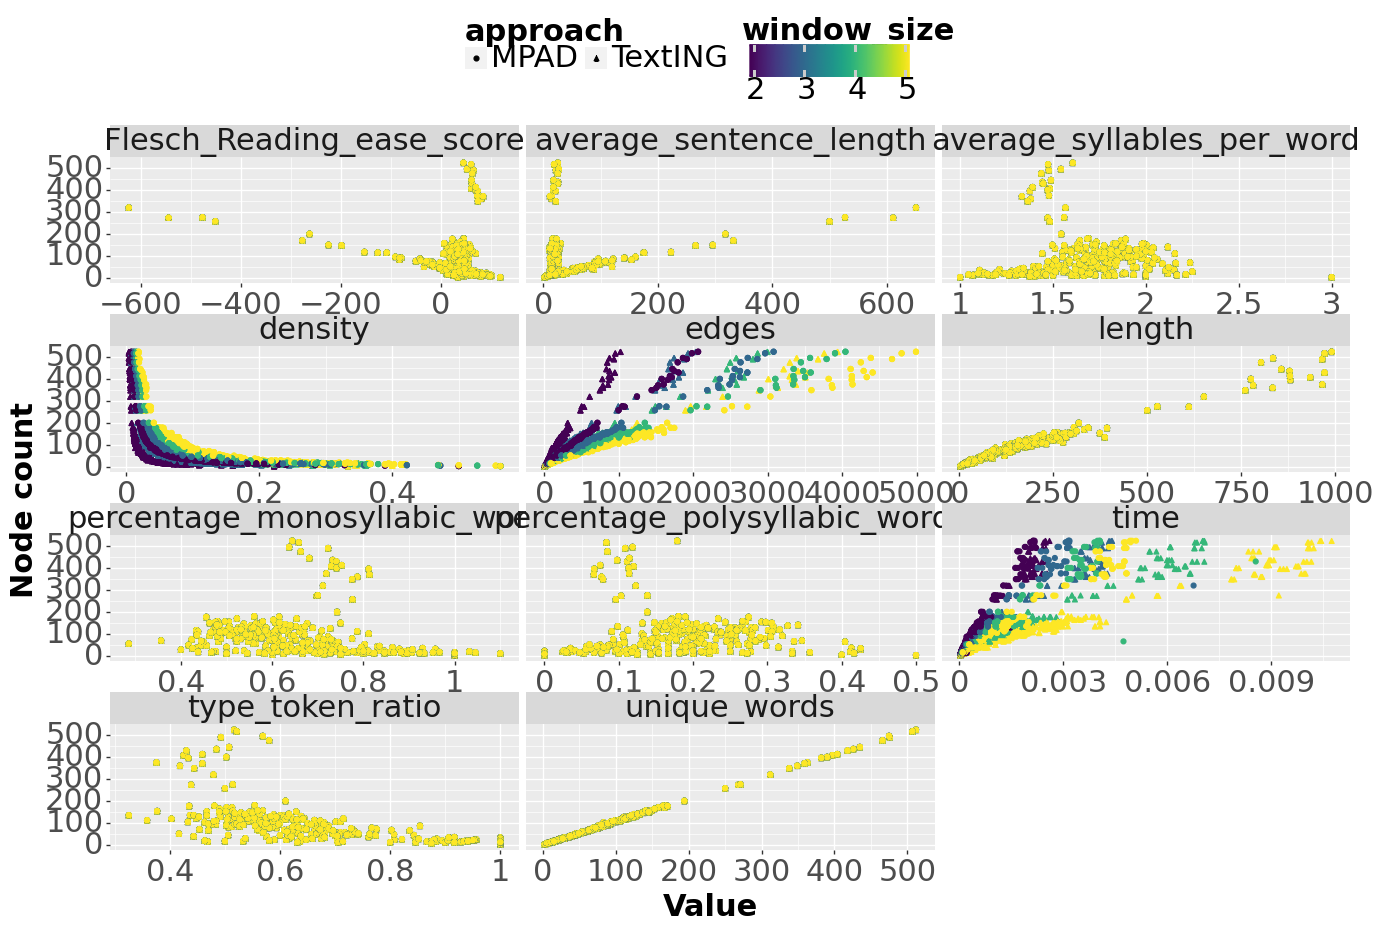

<ggplot: (807474672)>

In [5]:
p9.ggplot(sliding_window_df.melt(id_vars = ['dataset', 'split', 'index', 'window_size', 'approach', 'nodes'], var_name = 'variable', value_name = 'value'),
  p9.aes(x = 'value', y = 'nodes', colour = 'window_size', shape = 'approach')) + \
  p9.theme_gray() + \
  p9.geom_point() + \
  p9.xlab('Value') + \
  p9.ylab('Node count') + \
  p9.facet_wrap('~variable', scales = 'free_x', ncol = 3) + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (16, 9),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
    subplots_adjust = {
      'hspace' : 0.5
    }
  )

### Relation of properties to edge count

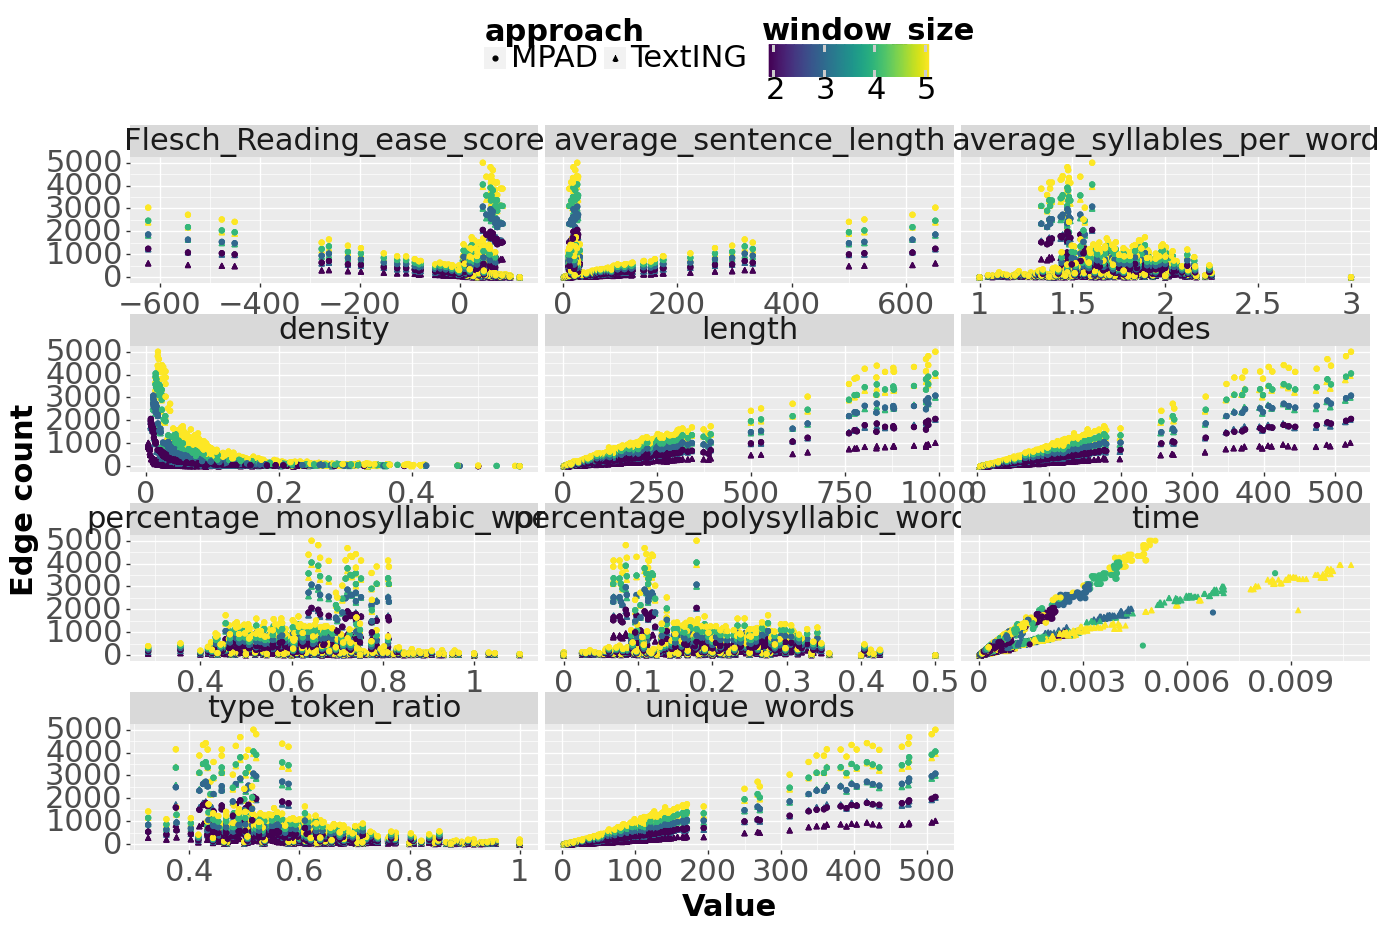

<ggplot: (809864694)>

In [6]:
p9.ggplot(sliding_window_df.melt(id_vars = ['dataset', 'split', 'index', 'window_size', 'approach', 'edges'], var_name = 'variable', value_name = 'value'),
  p9.aes(x = 'value', y = 'edges', colour = 'window_size', shape = 'approach')) + \
  p9.theme_gray() + \
  p9.geom_point() + \
  p9.xlab('Value') + \
  p9.ylab('Edge count') + \
  p9.facet_wrap('~variable', scales = 'free_x', ncol = 3) + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (16, 9),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
    subplots_adjust = {
      'hspace' : 0.5
    }
  )

### Relation of properties to graph density

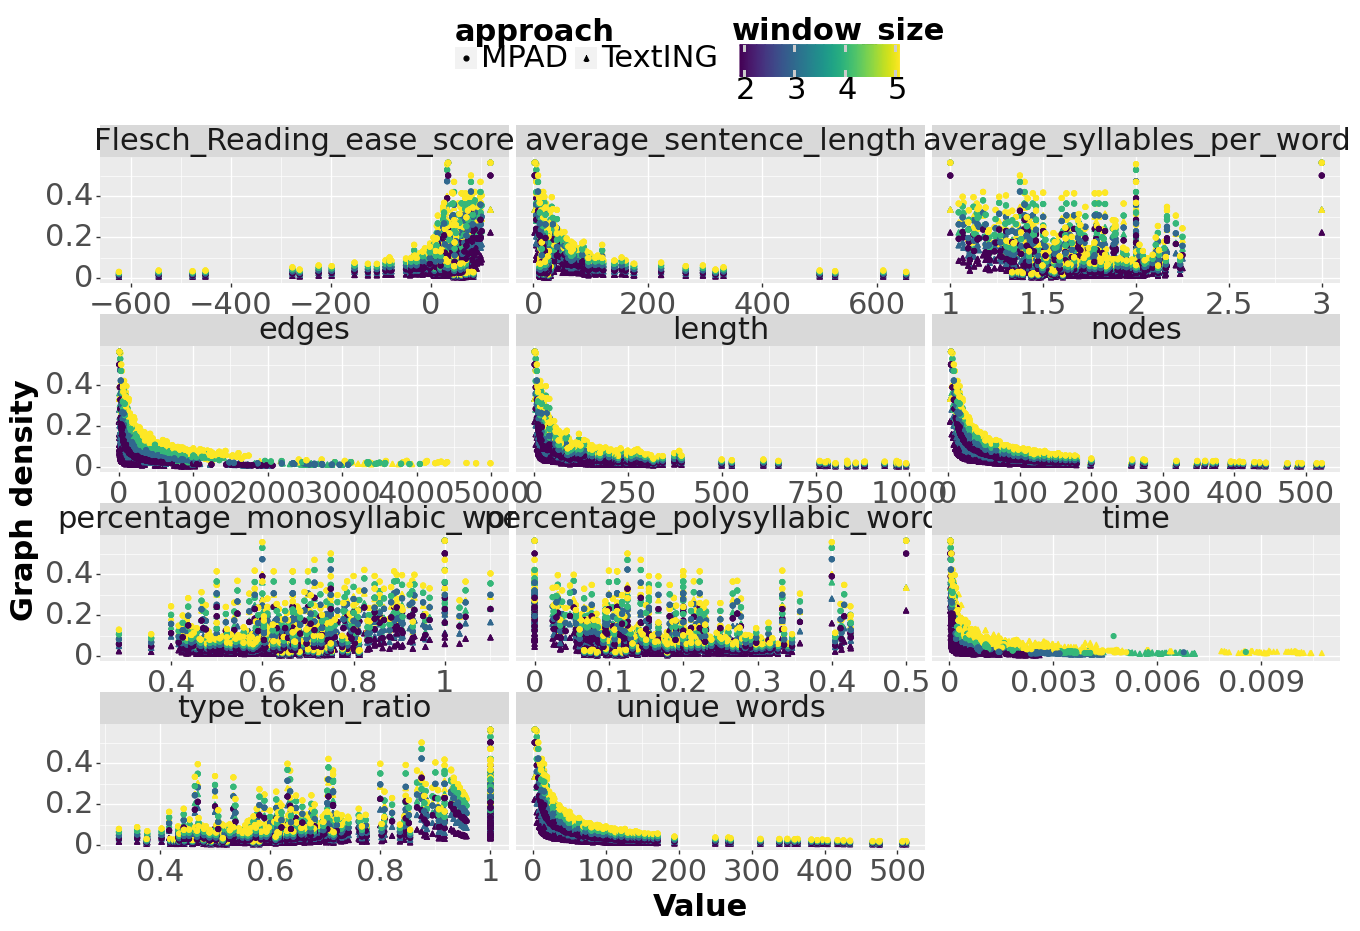

<ggplot: (809586274)>

In [7]:
p9.ggplot(sliding_window_df.melt(id_vars = ['dataset', 'split', 'index', 'window_size', 'approach', 'density'], var_name = 'variable', value_name = 'value'),
  p9.aes(x = 'value', y = 'density', colour = 'window_size', shape = 'approach')) + \
  p9.theme_gray() + \
  p9.geom_point() + \
  p9.xlab('Value') + \
  p9.ylab('Graph density') + \
  p9.facet_wrap('~variable', scales = 'free_x', ncol = 3) + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (16, 9),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
    subplots_adjust = {
      'hspace' : 0.5
    }
  )

### Relation of properties to time to construct

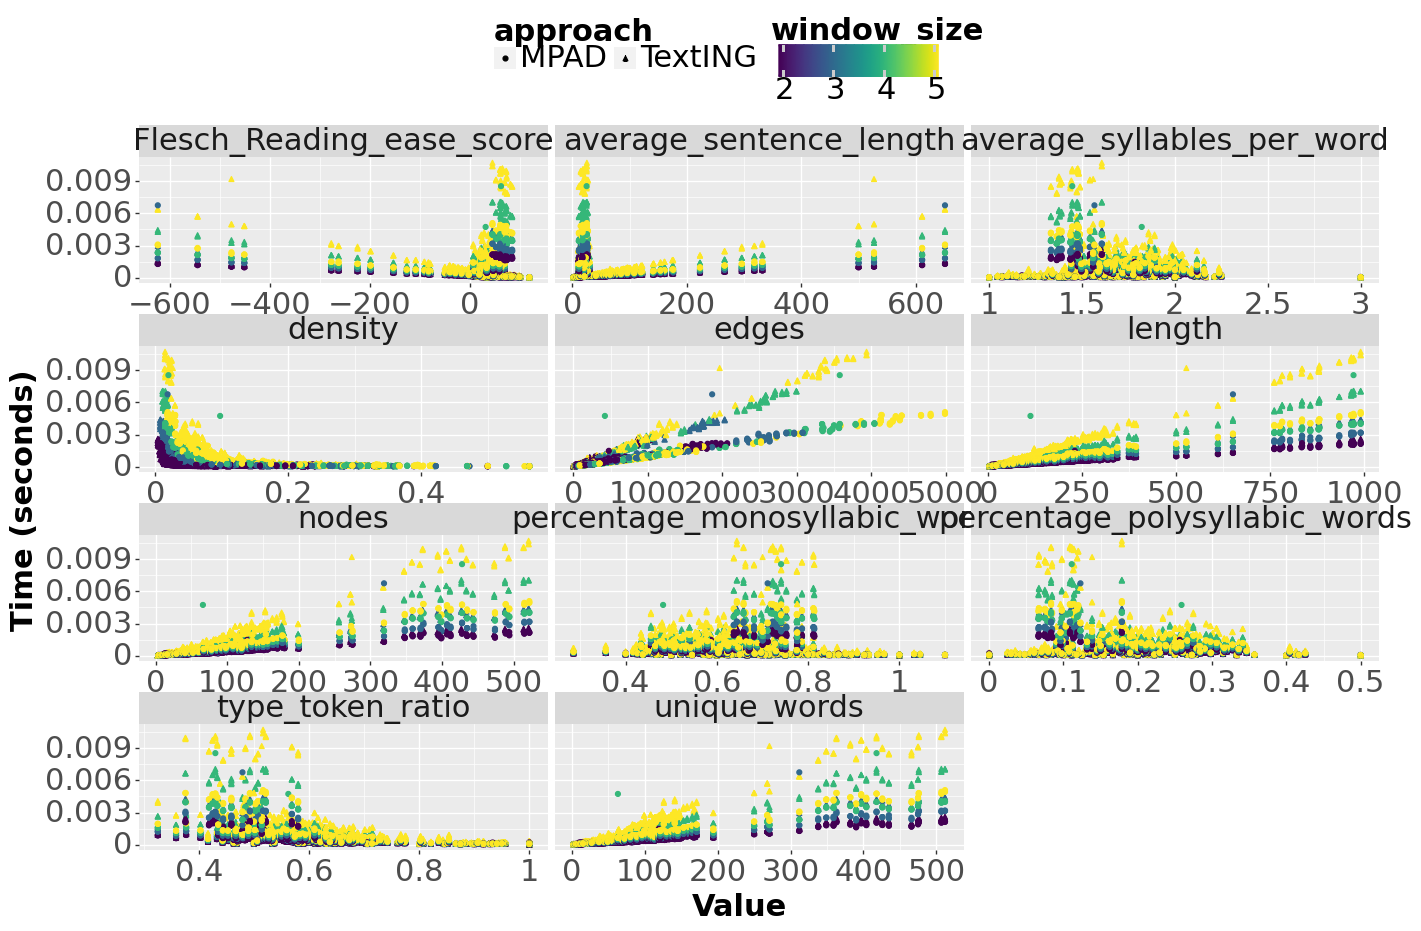

<ggplot: (809768849)>

In [8]:
p9.ggplot(sliding_window_df.melt(id_vars = ['dataset', 'split', 'index', 'window_size', 'approach', 'time'], var_name = 'variable', value_name = 'value'),
  p9.aes(x = 'value', y = 'time', colour = 'window_size', shape = 'approach')) + \
  p9.theme_gray() + \
  p9.geom_point() + \
  p9.xlab('Value') + \
  p9.ylab('Time (seconds)') + \
  p9.facet_wrap('~variable', scales = 'free_x', ncol = 3) + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (16, 9),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
    subplots_adjust = {
      'hspace' : 0.5
    }
  )

### Time to construct

In [9]:
categorical_sliding_window_df = sliding_window_df.copy()
categorical_sliding_window_df['window_size'] = categorical_sliding_window_df['window_size'].astype('category')

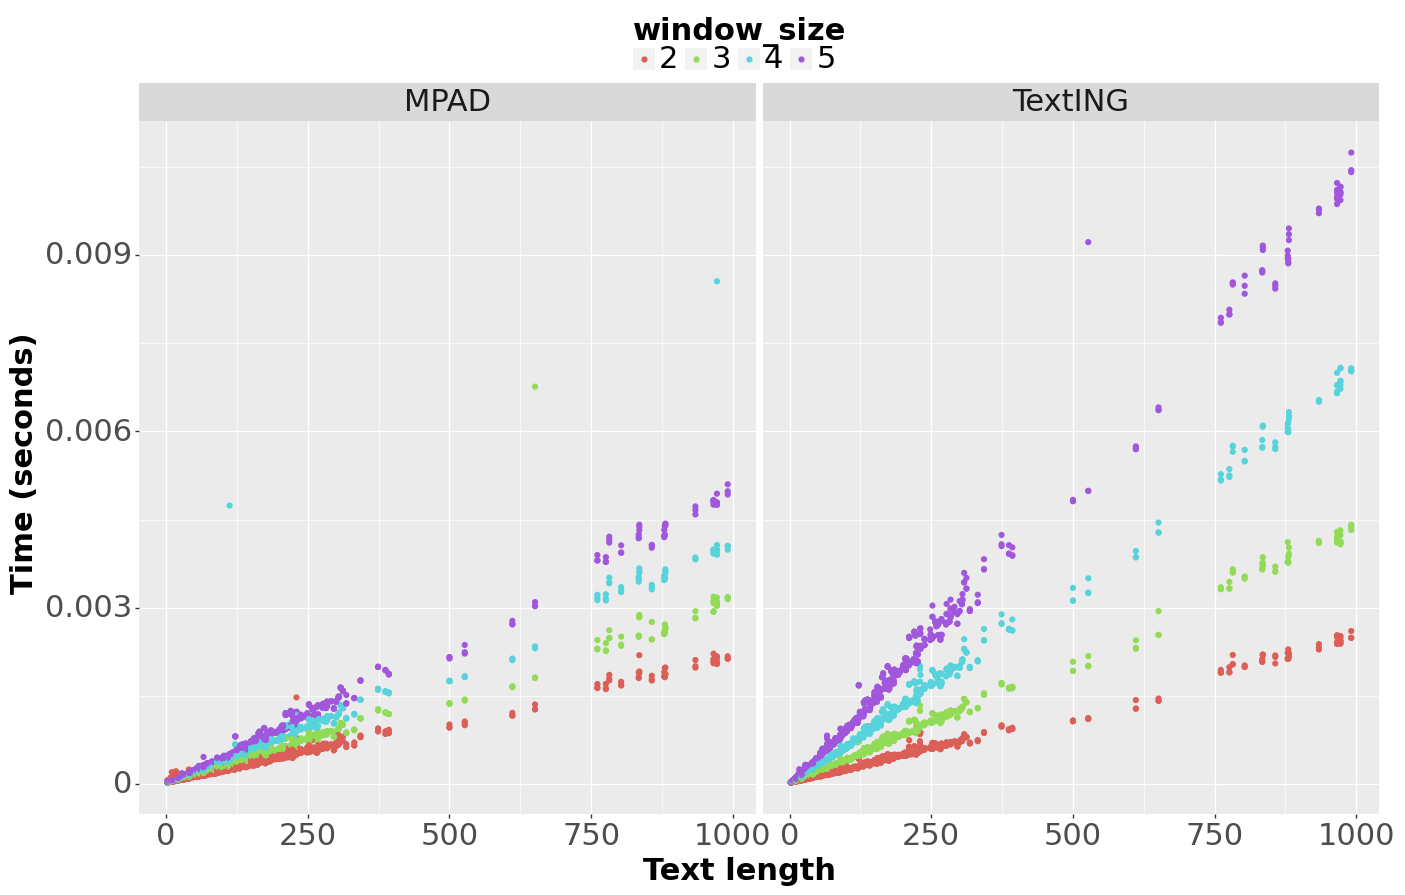

<ggplot: (811620575)>

In [10]:
p9.ggplot(categorical_sliding_window_df,
  p9.aes(x = 'length', y = 'time', colour = 'window_size')) + \
  p9.theme_gray() + \
  p9.geom_point() + \
  p9.xlab('Text length') + \
  p9.ylab('Time (seconds)') + \
  p9.facet_wrap('~approach', ncol = 2) + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (16, 9),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
  )

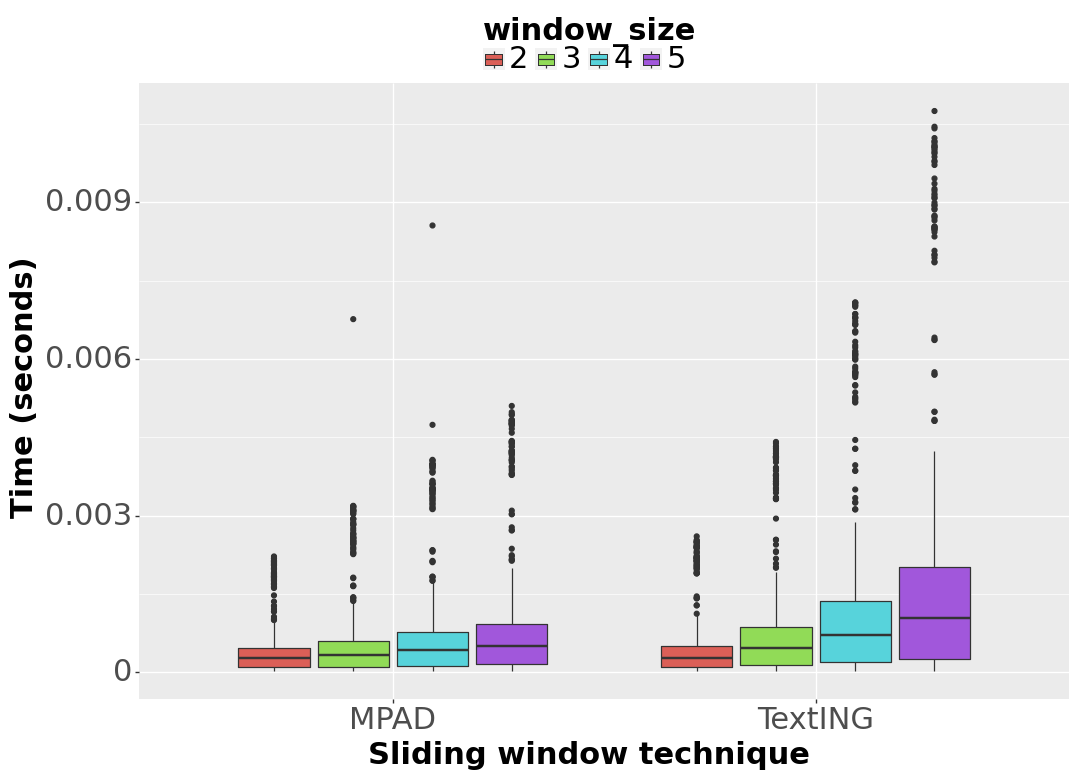

<ggplot: (815219935)>

In [11]:
p9.ggplot(categorical_sliding_window_df,
  p9.aes(x = 'approach', y = 'time', fill = 'window_size')) + \
  p9.theme_gray() + \
  p9.geom_boxplot() + \
  p9.xlab('Sliding window technique') + \
  p9.ylab('Time (seconds)') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
  )

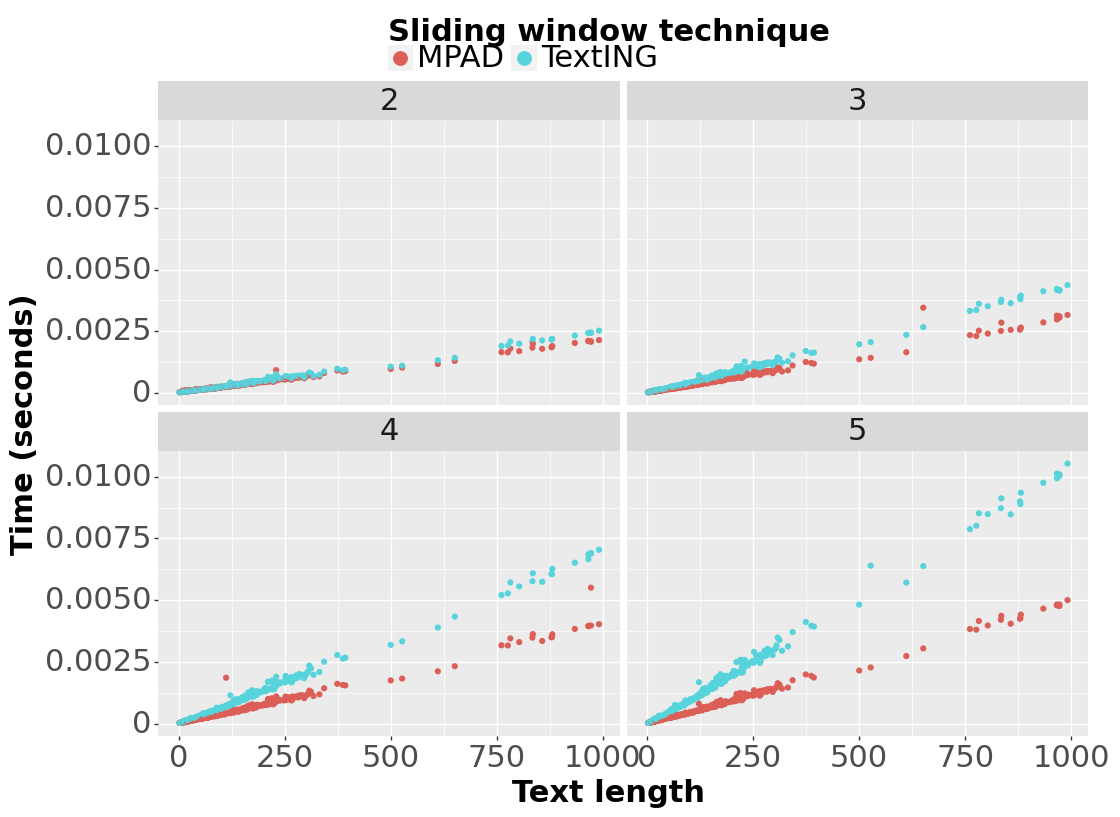

<ggplot: (809700629)>

In [12]:
p9.ggplot(sliding_window_df.groupby(by = ['dataset', 'split', 'index', 'approach', 'window_size', 'length']).agg(average_time = ('time', 'mean'), std_time = ('time', 'std')).reset_index(),
  p9.aes(x = 'length', y = 'average_time', colour = 'approach')) + \
  p9.theme_gray() + \
  p9.geom_point() + \
  p9.xlab('Text length') + \
  p9.ylab('Time (seconds)') + \
  p9.labs(colour = 'Sliding window technique') + \
  p9.facet_wrap('~ window_size', ncol = 2) + \
  p9.guides(colour = p9.guide_legend(override_aes = {'size' : 5})) + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
  )

### Node count

In [13]:
plot = p9.ggplot(categorical_sliding_window_df,
  p9.aes(x = 'approach', y = 'nodes', fill = 'window_size')) + \
  p9.theme_gray() + \
  p9.geom_boxplot() + \
  p9.xlab('Sliding window technique') + \
  p9.ylab('Node count') + \
  p9.labs(fill = 'Window size') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
  )

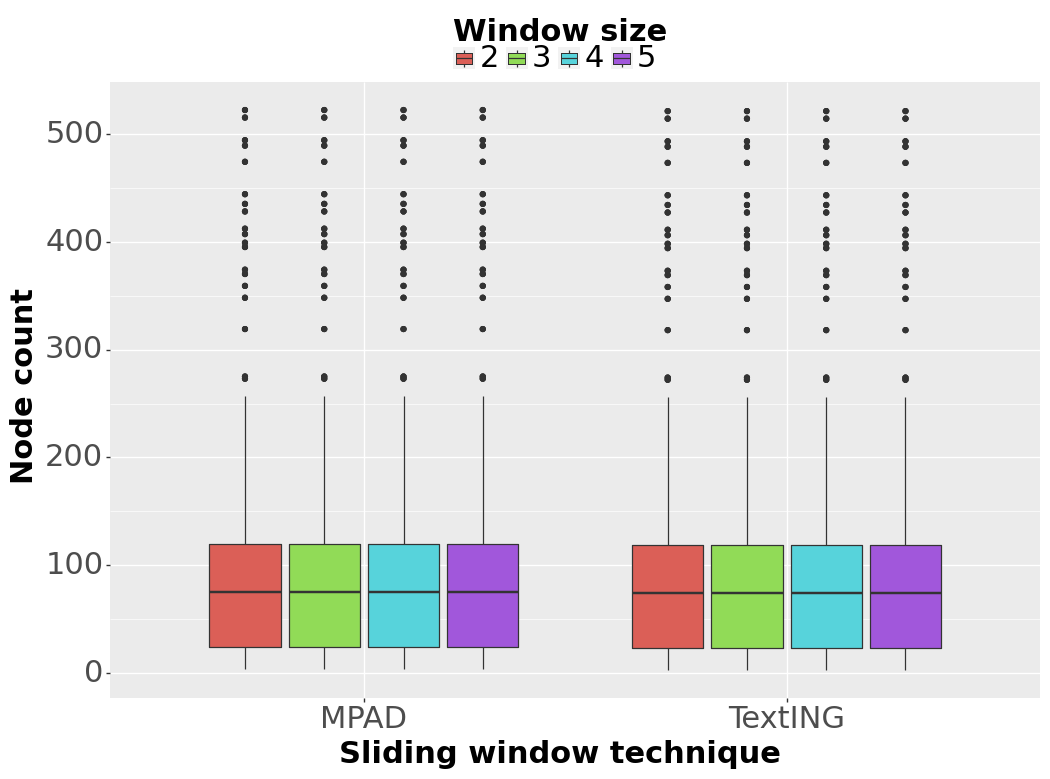

<ggplot: (807503434)>

In [14]:
plot

In [15]:
plot.save(filename = './figures/sliding_windows_node_count.png', dpi = 300)

/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 12 x 8 in image.
/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ./figures/sliding_windows_node_count.png


In [16]:
categorical_sliding_window_df[['approach', 'window_size', 'nodes']].groupby(by = ['approach', 'window_size']).describe()

nodes                                                  
                      count   mean       std  min    25%   50%     75%    max
approach window_size                                                         
MPAD     2            900.0  93.77  95.92595  4.0  24.75  75.0  120.25  522.0
         3            900.0  93.77  95.92595  4.0  24.75  75.0  120.25  522.0
         4            900.0  93.77  95.92595  4.0  24.75  75.0  120.25  522.0
         5            900.0  93.77  95.92595  4.0  24.75  75.0  120.25  522.0
TextING  2            900.0  92.77  95.92595  3.0  23.75  74.0  119.25  521.0
         3            900.0  92.77  95.92595  3.0  23.75  74.0  119.25  521.0
         4            900.0  92.77  95.92595  3.0  23.75  74.0  119.25  521.0
         5            900.0  92.77  95.92595  3.0  23.75  74.0  119.25  521.0

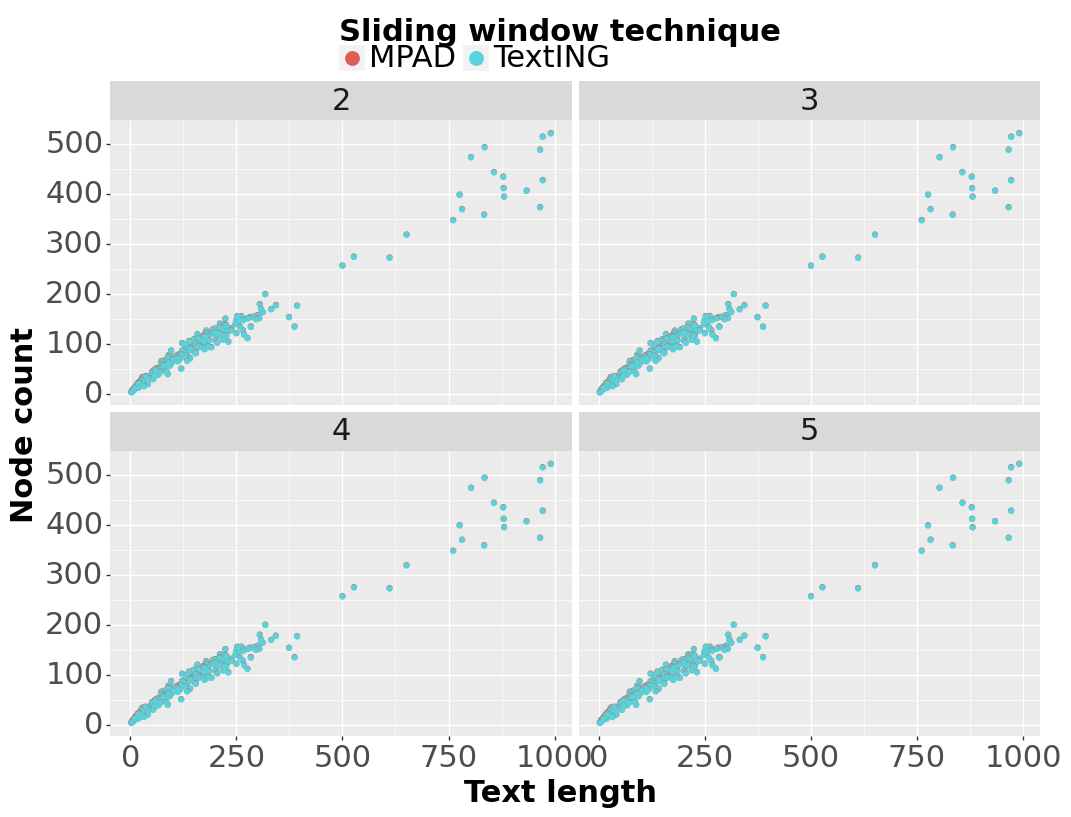

<ggplot: (808401035)>

In [17]:
p9.ggplot(sliding_window_df.groupby(by = ['dataset', 'split', 'index', 'approach', 'window_size', 'length']).agg(average_nodes = ('nodes', 'mean'), std_nodes = ('nodes', 'std')).reset_index(),
  p9.aes(x = 'length', y = 'average_nodes', colour = 'approach')) + \
  p9.theme_gray() + \
  p9.geom_point() + \
  p9.xlab('Text length') + \
  p9.ylab('Node count') + \
  p9.labs(colour = 'Sliding window technique') + \
  p9.facet_wrap('~ window_size', ncol = 2) + \
  p9.guides(colour = p9.guide_legend(override_aes = {'size' : 5})) + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
  )

### Edge count

In [18]:
plot = p9.ggplot(categorical_sliding_window_df,
  p9.aes(x = 'approach', y = 'edges', fill = 'window_size')) + \
  p9.theme_gray() + \
  p9.geom_boxplot() + \
  p9.xlab('Sliding window technique') + \
  p9.ylab('Edge count') + \
  p9.labs(fill = 'Window size') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
  )

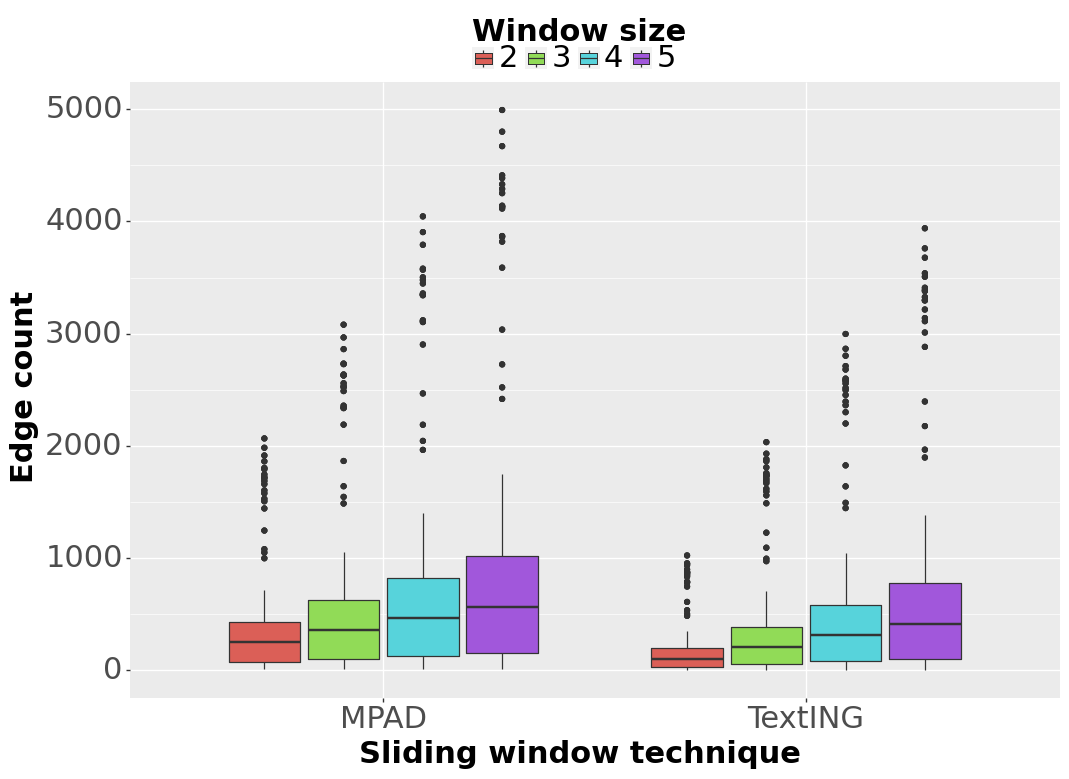

<ggplot: (808159431)>

In [19]:
plot

In [20]:
plot.save(filename = './figures/sliding_windows_edge_count.png', dpi = 300)

/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 12 x 8 in image.
/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ./figures/sliding_windows_edge_count.png


In [21]:
categorical_sliding_window_df[['approach', 'window_size', 'edges']].groupby(by = ['approach', 'window_size']).describe()

edges                                              \
                      count        mean         std  min     25%    50%   
approach window_size                                                      
MPAD     2            900.0  342.506667  386.665082  8.0   75.75  252.5   
         3            900.0  501.986667  584.061387  9.0  104.00  360.5   
         4            900.0  656.533333  774.156305  9.0  126.50  463.5   
         5            900.0  805.236667  957.234389  9.0  150.00  564.5   
TextING  2            900.0  156.836667  195.274420  2.0   29.00  103.5   
         3            900.0  315.333333  392.074114  3.0   56.00  211.0   
         4            900.0  468.676667  581.371154  3.0   78.25  314.0   
         5            900.0  616.333333  763.616013  3.0  100.25  414.0   

                                       
                          75%     max  
approach window_size                   
MPAD     2             432.25  2066.0  
         3             630.25  3080.0  
         4             825.25  4045.0  
         5            1020.75  4993.0  
TextING  2             195.00  1023.0  
         3             388.50  2033.0  
         4             585.50  2997.0  
         5             773.25  3939.0

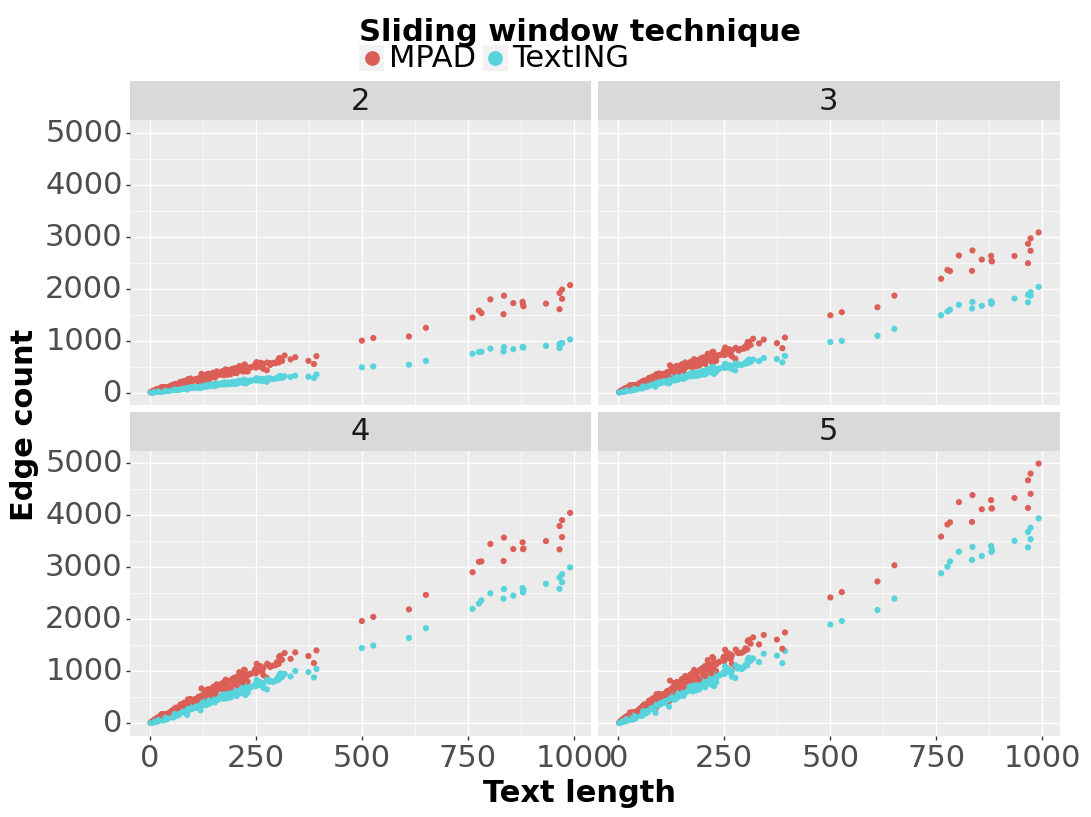

<ggplot: (808759621)>

In [22]:
p9.ggplot(sliding_window_df.groupby(by = ['dataset', 'split', 'index', 'approach', 'window_size', 'length']).agg(average_edges = ('edges', 'mean'), std_edges = ('edges', 'std')).reset_index(),
  p9.aes(x = 'length', y = 'average_edges', colour = 'approach')) + \
  p9.theme_gray() + \
  p9.geom_point() + \
  p9.xlab('Text length') + \
  p9.ylab('Edge count') + \
  p9.labs(colour = 'Sliding window technique') + \
  p9.facet_wrap('~ window_size', ncol = 2) + \
  p9.guides(colour = p9.guide_legend(override_aes = {'size' : 5})) + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
  )

### Graph density

In [23]:
plot = p9.ggplot(categorical_sliding_window_df,
  p9.aes(x = 'approach', y = 'density', fill = 'window_size')) + \
  p9.theme_gray() + \
  p9.geom_boxplot() + \
  p9.xlab('Sliding window technique') + \
  p9.ylab('Graph density') + \
  p9.labs(fill = 'Window size') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
  )

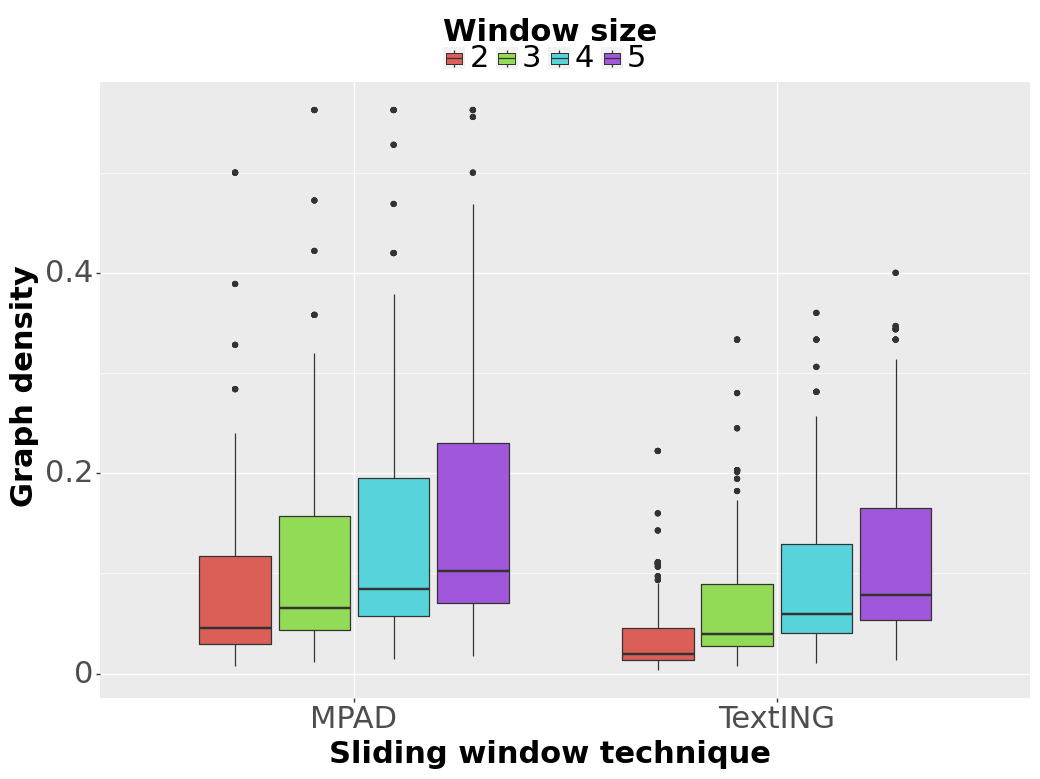

<ggplot: (813681331)>

In [24]:
plot

In [25]:
plot.save(filename = './figures/sliding_windows_density.png', dpi = 300)

/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 12 x 8 in image.
/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ./figures/sliding_windows_density.png


In [26]:
categorical_sliding_window_df[['approach', 'window_size', 'density']].groupby(by = ['approach', 'window_size']).describe()

density                                          \
                       count      mean       std       min       25%   
approach window_size                                                   
MPAD     2             900.0  0.079900  0.075948  0.007477  0.029802   
         3             900.0  0.107876  0.094123  0.011183  0.043644   
         4             900.0  0.132871  0.107184  0.014629  0.057046   
         5             900.0  0.155866  0.118210  0.017973  0.070118   
TextING  2             900.0  0.033002  0.030897  0.003600  0.013551   
         3             900.0  0.063257  0.053515  0.007171  0.027286   
         4             900.0  0.089984  0.069146  0.010611  0.040756   
         5             900.0  0.114670  0.082910  0.013948  0.053642   

                                                    
                           50%       75%       max  
approach window_size                                
MPAD     2            0.045365  0.117114  0.500000  
         3            0.065110  0.157161  0.562500  
         4            0.084383  0.195020  0.562500  
         5            0.102562  0.230023  0.562500  
TextING  2            0.019869  0.045390  0.222222  
         3            0.039940  0.088957  0.333333  
         4            0.059540  0.129339  0.360000  
         5            0.078223  0.165350  0.400000

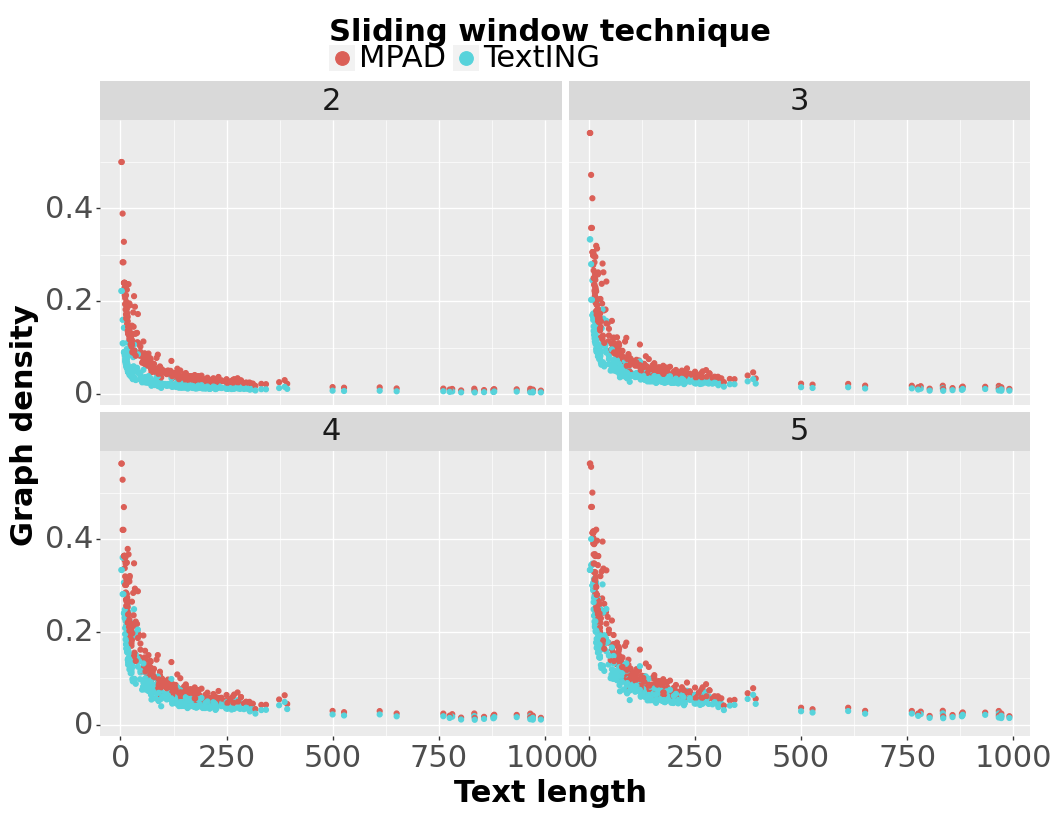

<ggplot: (812799058)>

In [27]:
p9.ggplot(sliding_window_df.groupby(by = ['dataset', 'split', 'index', 'approach', 'window_size', 'length']).agg(average_density = ('density', 'mean'), std_density = ('density', 'std')).reset_index(),
  p9.aes(x = 'length', y = 'average_density', colour = 'approach')) + \
  p9.theme_gray() + \
  p9.geom_point() + \
  p9.xlab('Text length') + \
  p9.ylab('Graph density') + \
  p9.labs(colour = 'Sliding window technique') + \
  p9.facet_wrap('~ window_size', ncol = 2) + \
  p9.guides(colour = p9.guide_legend(override_aes = {'size' : 5})) + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
  )

In [28]:
# plot.save(filename = './figures/sliding_windows_scatter_plot.png', dpi = 300)

# LLM-based method

In [29]:
llm_df = pd.concat([
  pd.read_csv('../../limitations/facebook-bart-large.csv').assign(LLM = 'BART-L'),
  pd.read_csv('../../limitations/facebook-bart-base.csv').assign(LLM = 'BART'),
  pd.read_csv('../../limitations/FacebookAI-roberta-large.csv').assign(LLM = 'RoBERTa-L'),
  pd.read_csv('../../limitations/google-bert-bert-base-uncased.csv').assign(LLM = 'BERT'),
])

In [30]:
llm_df = pd.merge(llm_df, text_length_df, on = ['dataset', 'split', 'index'])
llm_df['dataset'] = llm_df['dataset'].replace({'IMDb-top_1000' : 'IMDb-1k'})

In [31]:
llm_df.head()

dataset  index split     LLM approach  left_stride  right_stride  \
0  Ohsumed   3419  test  BART-L  Grouped           64            64   
1  Ohsumed   3419  test  BART-L  Grouped           64            64   
2  Ohsumed   3419  test  BART-L  Grouped           64            64   
3  Ohsumed   3419  test  BART-L  Grouped           64            64   
4  Ohsumed   3419  test  BART-L  Grouped           64            64   

   threshold      time  nodes  edges   density  length  unique_words  \
0       0.70  1.684627    157   7395  0.300012     230           119   
1       0.70  0.118859    157   7395  0.300012     230           119   
2       0.70  0.125992    157   7395  0.300012     230           119   
3       0.85  0.121244    157   3698  0.150026     230           119   
4       0.85  0.121235    157   3698  0.150026     230           119   

   type_token_ratio  Flesch_Reading_ease_score  average_syllables_per_word  \
0          0.517391                      44.41                    1.782609   
1          0.517391                      44.41                    1.782609   
2          0.517391                      44.41                    1.782609   
3          0.517391                      44.41                    1.782609   
4          0.517391                      44.41                    1.782609   

   average_sentence_length  percentage_monosyllabic_words  \
0                     10.0                       0.586957   
1                     10.0                       0.586957   
2                     10.0                       0.586957   
3                     10.0                       0.586957   
4                     10.0                       0.586957   

   percentage_polysyllabic_words  
0                       0.256522  
1                       0.256522  
2                       0.256522  
3                       0.256522  
4                       0.256522

### Relation of properties to node count

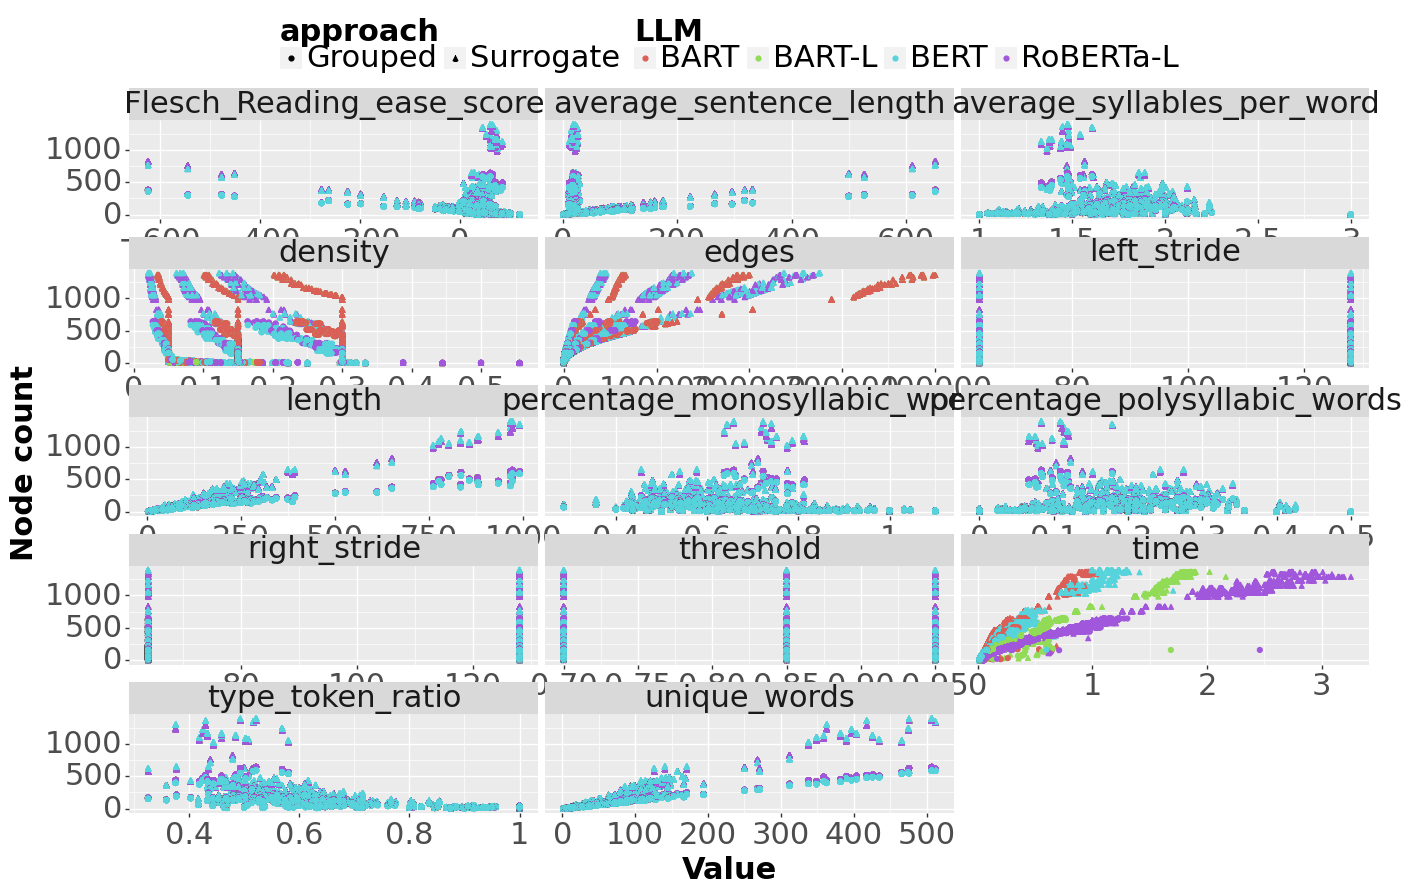

<ggplot: (813479327)>

In [32]:
p9.ggplot(llm_df.melt(id_vars = ['dataset', 'split', 'index', 'LLM', 'approach', 'nodes'], var_name = 'variable', value_name = 'value'),
  p9.aes(x = 'value', y = 'nodes', colour = 'LLM', shape = 'approach')) + \
  p9.theme_gray() + \
  p9.geom_point() + \
  p9.xlab('Value') + \
  p9.ylab('Node count') + \
  p9.facet_wrap('~variable', scales = 'free_x', ncol = 3) + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (16, 9),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
    subplots_adjust = {
      'hspace' : 0.5
    }
  )

### Relation of properties to edge count

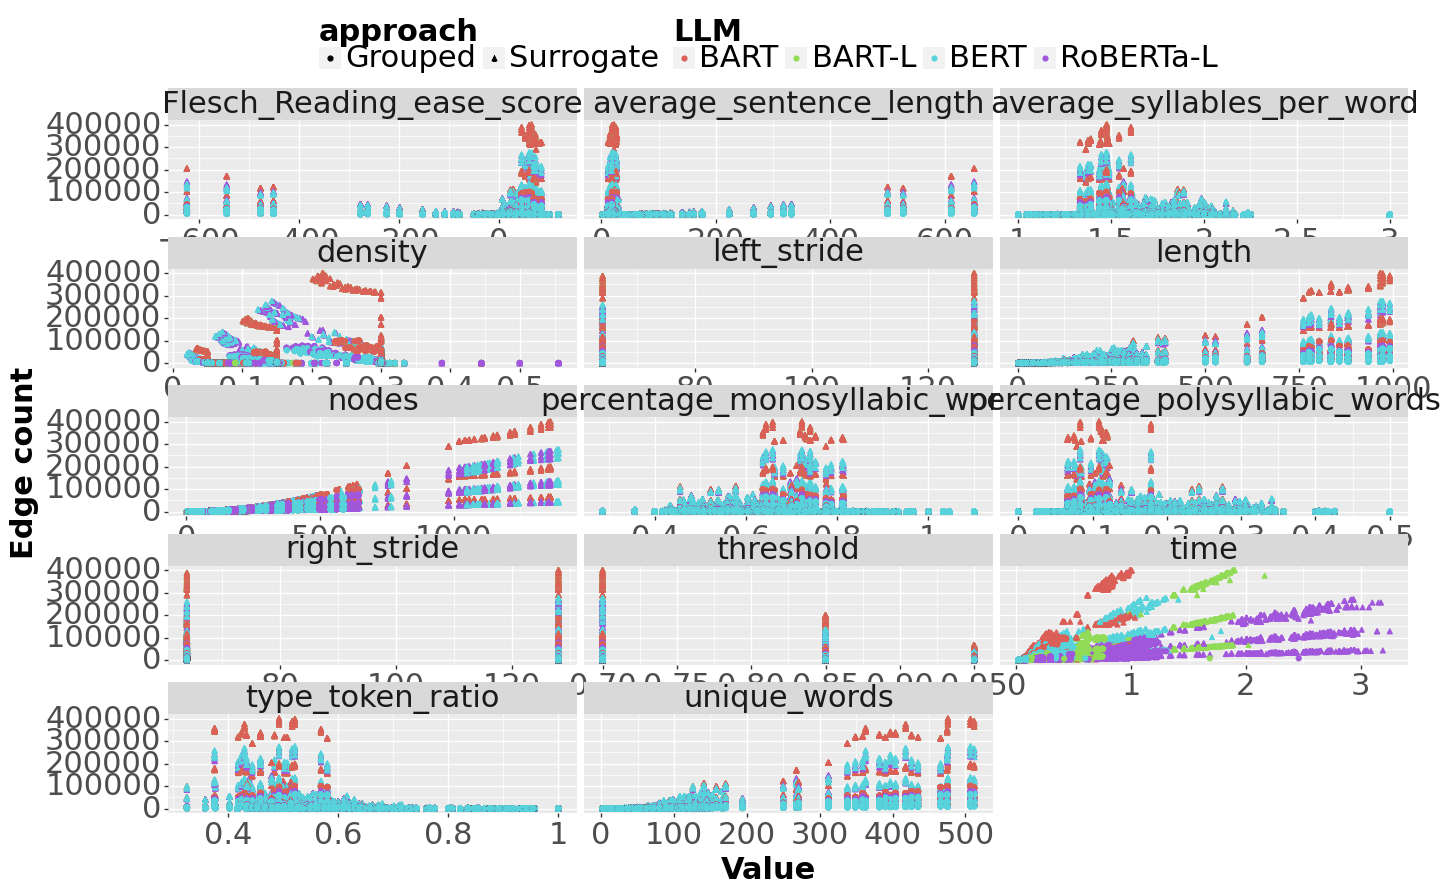

<ggplot: (811711747)>

In [33]:
p9.ggplot(llm_df.melt(id_vars = ['dataset', 'split', 'index', 'LLM', 'approach', 'edges'], var_name = 'variable', value_name = 'value'),
  p9.aes(x = 'value', y = 'edges', colour = 'LLM', shape = 'approach')) + \
  p9.theme_gray() + \
  p9.geom_point() + \
  p9.xlab('Value') + \
  p9.ylab('Edge count') + \
  p9.facet_wrap('~variable', scales = 'free_x', ncol = 3) + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (16, 9),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
    subplots_adjust = {
      'hspace' : 0.5
    }
  )

### Relation of properties to graph density

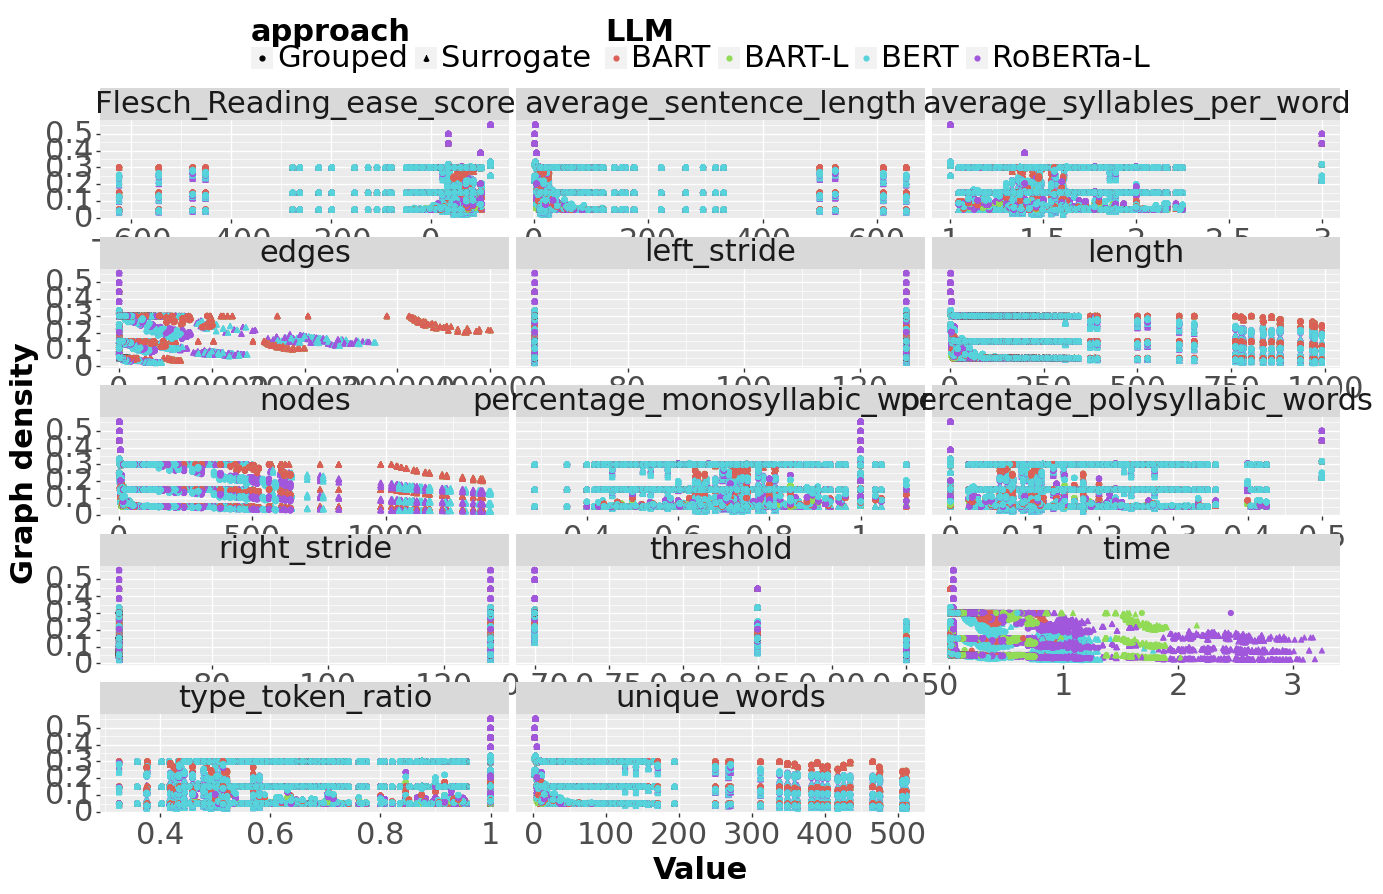

<ggplot: (809501348)>

In [34]:
p9.ggplot(llm_df.melt(id_vars = ['dataset', 'split', 'index', 'LLM', 'approach', 'density'], var_name = 'variable', value_name = 'value'),
  p9.aes(x = 'value', y = 'density', colour = 'LLM', shape = 'approach')) + \
  p9.theme_gray() + \
  p9.geom_point() + \
  p9.xlab('Value') + \
  p9.ylab('Graph density') + \
  p9.facet_wrap('~variable', scales = 'free_x', ncol = 3) + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (16, 9),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
    subplots_adjust = {
      'hspace' : 0.5
    }
  )

### Relation of properties to time to construct

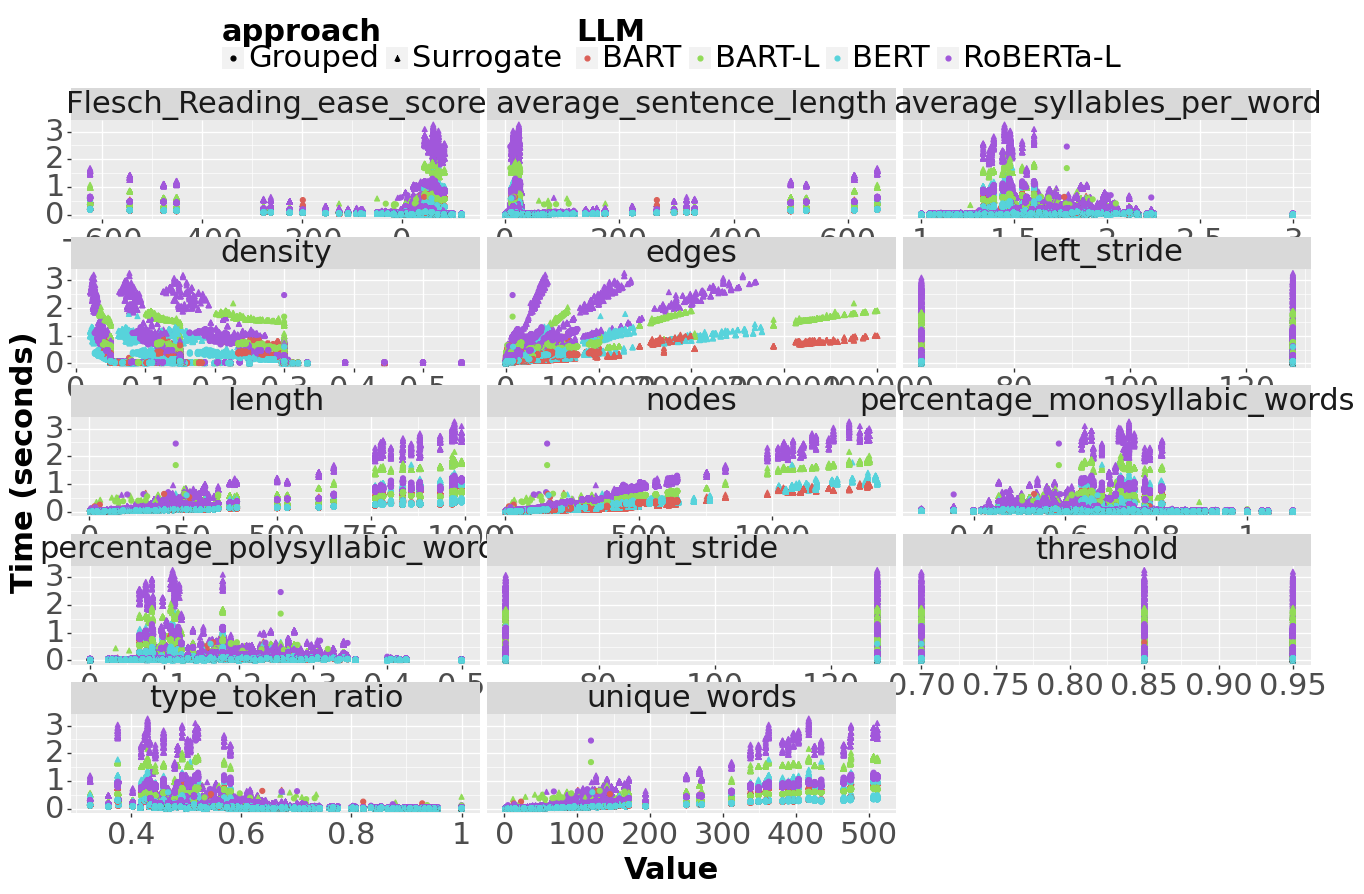

<ggplot: (863043804)>

In [35]:
p9.ggplot(llm_df.melt(id_vars = ['dataset', 'split', 'index', 'LLM', 'approach', 'time'], var_name = 'variable', value_name = 'value'),
  p9.aes(x = 'value', y = 'time', colour = 'LLM', shape = 'approach')) + \
  p9.theme_gray() + \
  p9.geom_point() + \
  p9.xlab('Value') + \
  p9.ylab('Time (seconds)') + \
  p9.facet_wrap('~variable', scales = 'free_x', ncol = 3) + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (16, 9),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
    subplots_adjust = {
      'hspace' : 0.5
    }
  )

### Time to construct

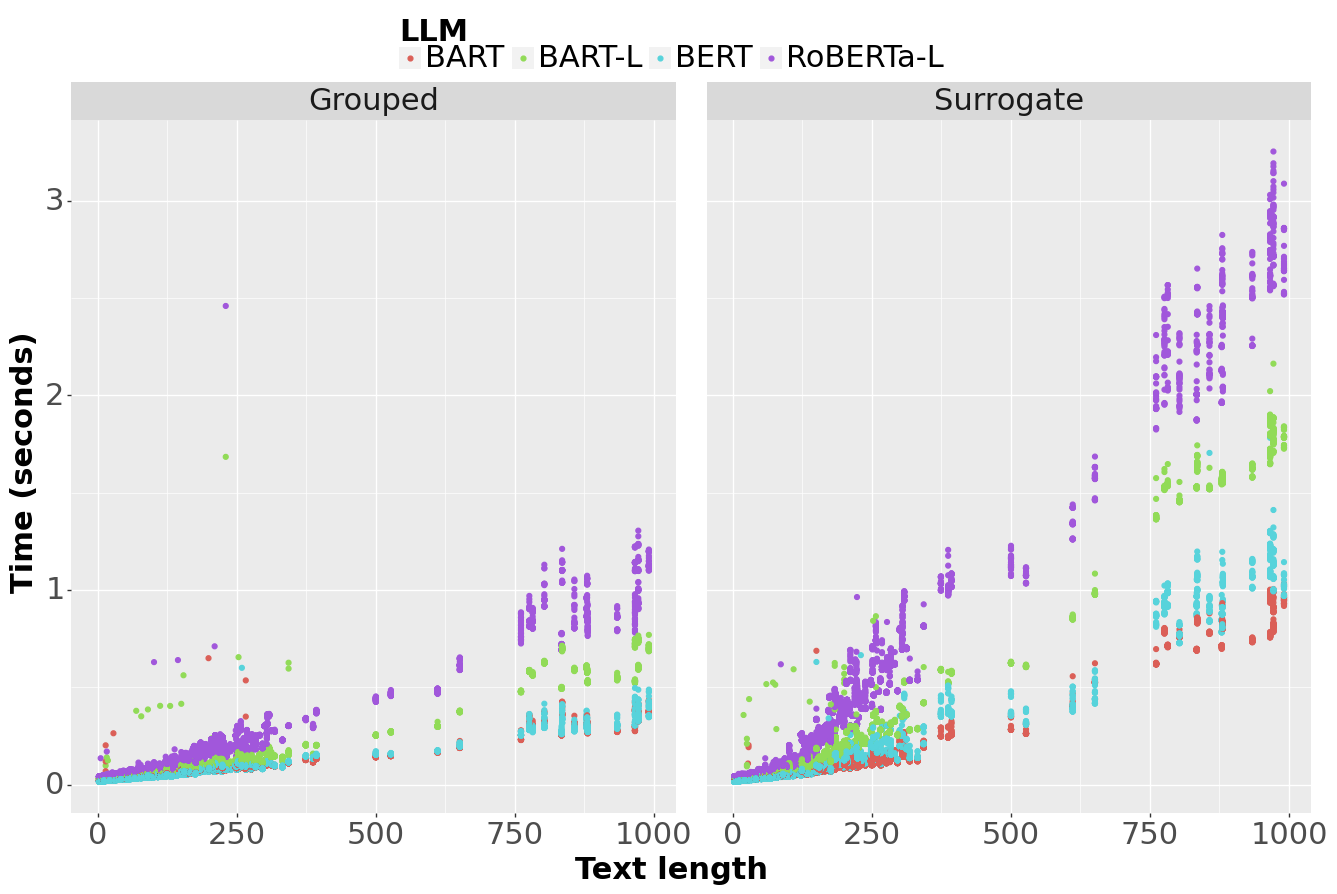

<ggplot: (813669202)>

In [36]:
p9.ggplot(llm_df,
  p9.aes(x = 'length', y = 'time', colour = 'LLM')) + \
  p9.theme_gray() + \
  p9.geom_point() + \
  p9.xlab('Text length') + \
  p9.ylab('Time (seconds)') + \
  p9.facet_wrap('~approach', ncol = 2) + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (16, 9),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
    subplots_adjust = {
      'hspace': 0.05,
      'wspace': 0.05
    }
  )

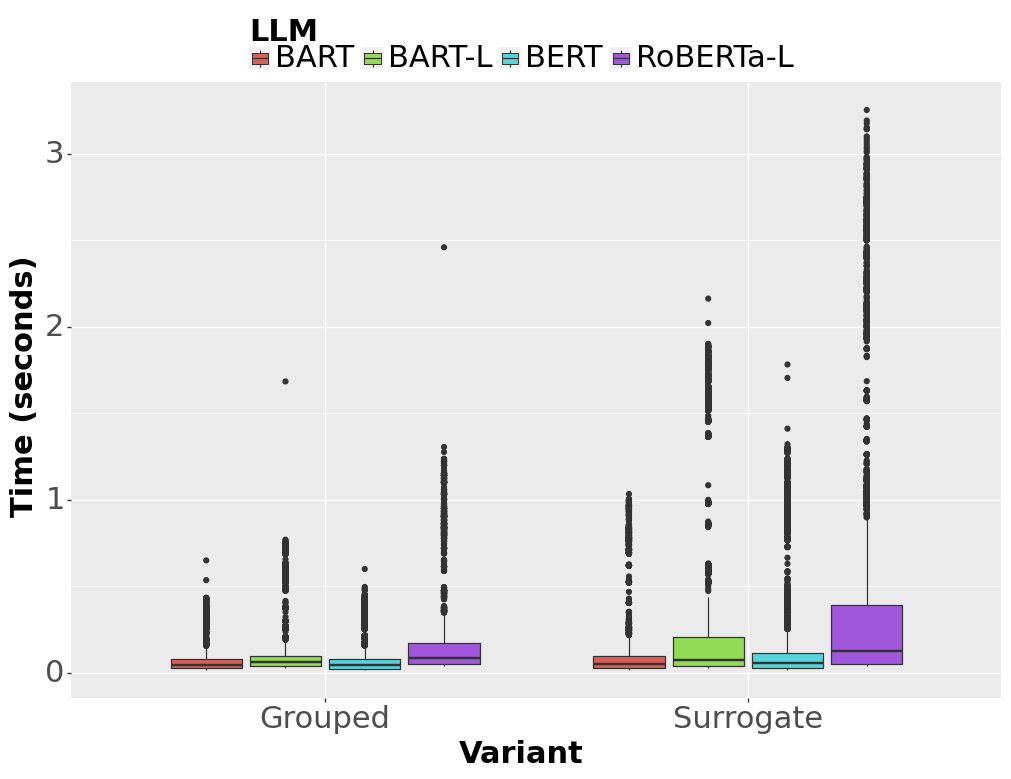

<ggplot: (809627042)>

In [37]:
p9.ggplot(llm_df,
  p9.aes(x = 'approach', y = 'time', fill = 'LLM')) + \
  p9.theme_gray() + \
  p9.geom_boxplot() + \
  p9.xlab('Variant') + \
  p9.ylab('Time (seconds)') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
  )

In [38]:
plot = p9.ggplot(llm_df.groupby(by = ['dataset', 'split', 'index', 'approach', 'LLM', 'length']).agg(average_time = ('time', 'mean'), std_time = ('time', 'std')).reset_index(),
  p9.aes(x = 'length', y = 'average_time', colour = 'LLM')) + \
  p9.theme_gray() + \
  p9.geom_point() + \
  p9.xlab('Text length') + \
  p9.ylab('Time (seconds)') + \
  p9.labs(colour = 'LLM') + \
  p9.facet_wrap('~ approach', ncol = 2) + \
  p9.guides(colour = p9.guide_legend(override_aes = {'size' : 5})) + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 6),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
    subplots_adjust = {
      'hspace': 0.05,
      'wspace': 0.05
    }
  )

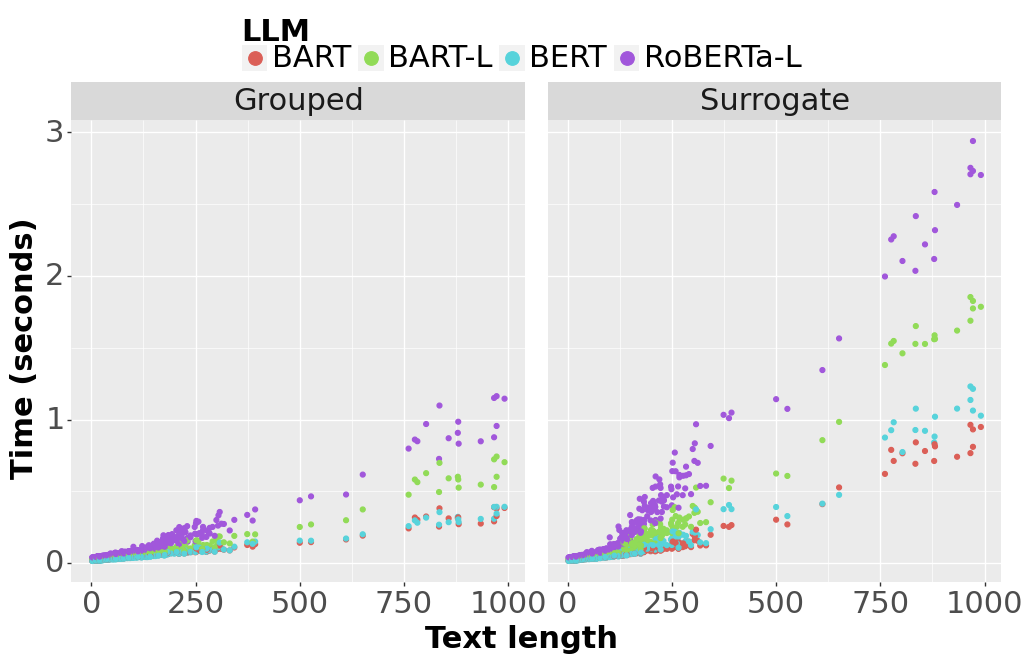

<ggplot: (809575464)>

In [39]:
plot

In [40]:
plot.save(filename = './figures/llm_time_to_construct.png', dpi = 300)

/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 12 x 6 in image.
/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ./figures/llm_time_to_construct.png


### Node count

In [41]:
llm_df['threshold'] = pd.Categorical(llm_df['threshold'], categories = llm_df['threshold'].sort_values(ascending = True).unique().tolist())

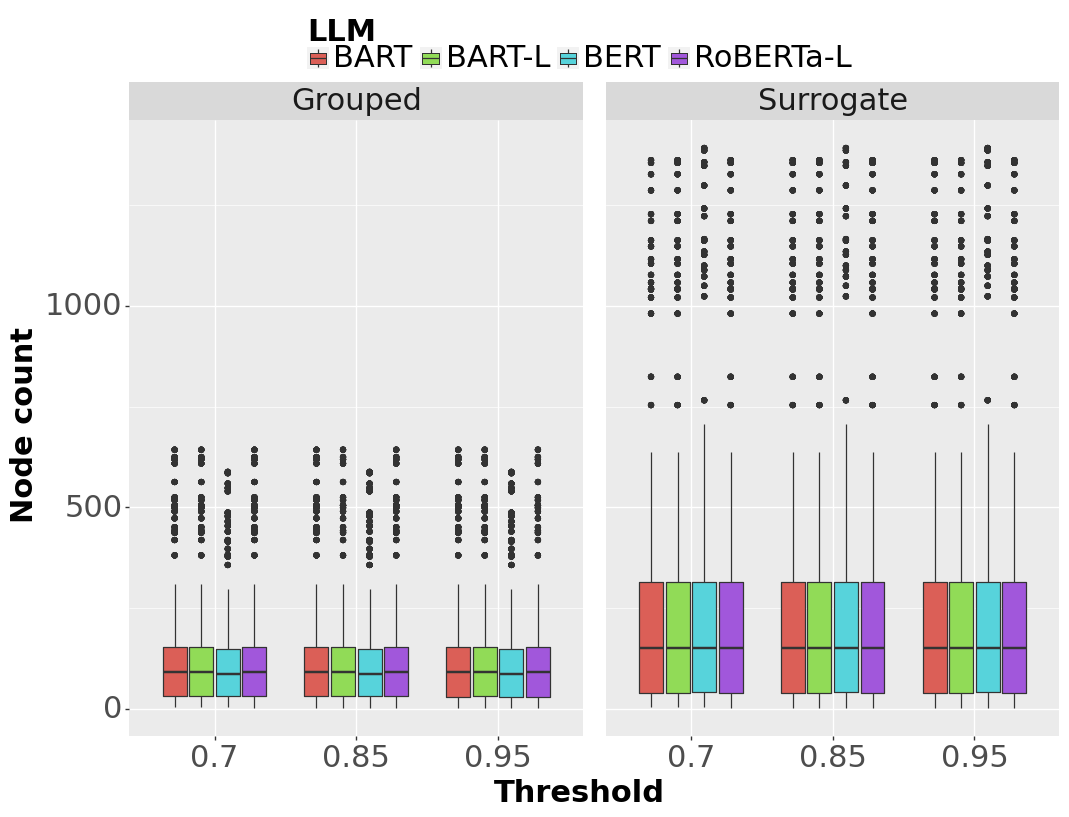

<ggplot: (863052149)>

In [42]:
p9.ggplot(llm_df,
  p9.aes(x = 'threshold', y = 'nodes', fill = 'LLM')) + \
  p9.theme_gray() + \
  p9.geom_boxplot() + \
  p9.xlab('Threshold') + \
  p9.ylab('Node count') + \
  p9.labs(fill = 'LLM') + \
  p9.facet_wrap('~ approach', ncol = 2) + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
    subplots_adjust = {
      'hspace': 0.05,
      'wspace': 0.05
    }
  )

In [43]:
plot = p9.ggplot(llm_df,
  p9.aes(x = 'LLM', y = 'nodes', fill = 'factor(threshold)')) + \
  p9.theme_gray() + \
  p9.geom_boxplot() + \
  p9.xlab('LLM') + \
  p9.ylab('Node count') + \
  p9.labs(fill = 'Threshold') + \
  p9.facet_wrap('~ approach', ncol = 2) + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_text = p9.element_text(size = 18),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
    subplots_adjust = {
      'hspace': 0.05,
      'wspace': 0.05
    }
  )

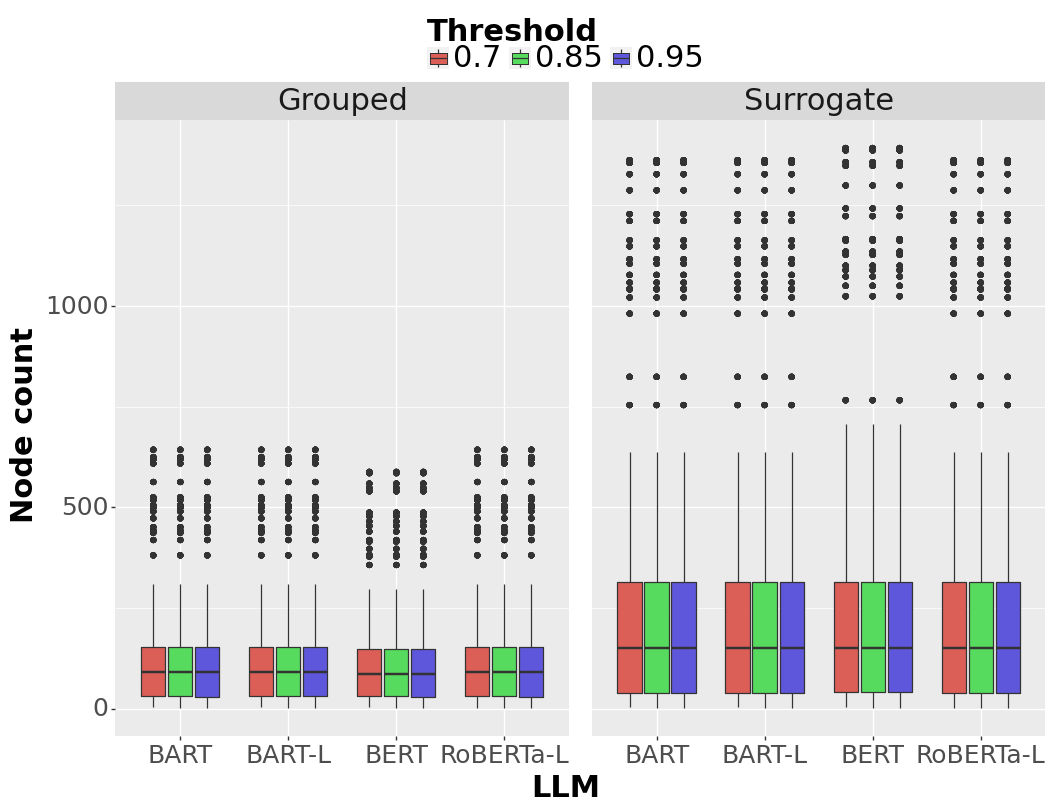

<ggplot: (807510437)>

In [44]:
plot

In [45]:
plot.save(filename = './figures/llm_node_count.png', dpi = 300)

/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 12 x 8 in image.
/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ./figures/llm_node_count.png


In [46]:
llm_df[['approach', 'LLM', 'threshold', 'nodes']].groupby(by = ['approach', 'LLM', 'threshold']).describe()

nodes                                      \
                                count        mean         std  min    25%   
approach  LLM       threshold                                               
Grouped   BART      0.7        3600.0  116.670000  117.203712  4.0  31.75   
                    0.85       3600.0  116.653333  117.219239  3.0  31.75   
                    0.95       3600.0  115.383333  118.122051  2.0  29.75   
          BART-L    0.7        3600.0  116.670000  117.203712  4.0  31.75   
                    0.85       3600.0  116.646667  117.225220  3.0  31.75   
                    0.95       3600.0  115.610000  117.964755  2.0  30.75   
          BERT      0.7        3600.0  110.920000  108.103684  4.0  32.00   
                    0.85       3600.0  110.890000  108.131397  3.0  32.00   
                    0.95       3600.0  109.383333  109.190452  2.0  28.75   
          RoBERTa-L 0.7        3600.0  116.660000  117.213228  3.0  31.75   
                    0.85       3600.0  116.636667  117.234249  3.0  31.75   
                    0.95       3600.0  115.603333  118.046220  2.0  30.00   
Surrogate BART      0.7        3600.0  229.683333  268.044836  4.0  39.25   
                    0.85       3600.0  229.673333  268.053264  3.0  39.25   
                    0.95       3600.0  229.416667  268.257101  2.0  39.25   
          BART-L    0.7        3600.0  229.683333  268.044836  4.0  39.25   
                    0.85       3600.0  229.666667  268.058716  3.0  39.25   
                    0.95       3600.0  229.456667  268.224159  2.0  39.25   
          BERT      0.7        3600.0  232.156667  275.934114  4.0  41.50   
                    0.85       3600.0  232.146667  275.942318  3.0  41.50   
                    0.95       3600.0  231.770000  276.236590  2.0  41.50   
          RoBERTa-L 0.7        3600.0  229.673333  268.053214  3.0  39.25   
                    0.85       3600.0  229.663333  268.061455  3.0  39.25   
                    0.95       3600.0  229.220000  268.411719  2.0  39.25   

                                                      
                                 50%     75%     max  
approach  LLM       threshold                         
Grouped   BART      0.7         91.0  153.25   643.0  
                    0.85        91.0  153.25   643.0  
                    0.95        91.0  153.25   643.0  
          BART-L    0.7         91.0  153.25   643.0  
                    0.85        91.0  153.25   643.0  
                    0.95        91.0  153.25   643.0  
          BERT      0.7         87.5  148.00   588.0  
                    0.85        87.5  148.00   588.0  
                    0.95        87.5  148.00   588.0  
          RoBERTa-L 0.7         91.0  153.25   643.0  
                    0.85        91.0  153.25   643.0  
                    0.95        91.0  153.25   643.0  
Surrogate BART      0.7        151.5  313.75  1362.0  
                    0.85       151.5  313.75  1362.0  
                    0.95       151.5  313.75  1362.0  
          BART-L    0.7        151.5  313.75  1362.0  
                    0.85       151.5  313.75  1362.0  
                    0.95       151.5  313.75  1362.0  
          BERT      0.7        151.0  315.25  1392.0  
                    0.85       151.0  315.25  1392.0  
                    0.95       151.0  315.25  1392.0  
          RoBERTa-L 0.7        151.5  313.75  1362.0  
                    0.85       151.5  313.75  1362.0  
                    0.95       151.5  313.75  1362.0

In [47]:
plot = p9.ggplot(llm_df[llm_df['LLM'] == 'BART-L'],
  p9.aes(x = 'approach', y = 'nodes', fill = 'factor(threshold)')) + \
  p9.theme_gray() + \
  p9.geom_boxplot() + \
  p9.xlab('Variant') + \
  p9.ylab('Node count') + \
  p9.labs(fill = 'Threshold') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_text = p9.element_text(size = 18),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
  )

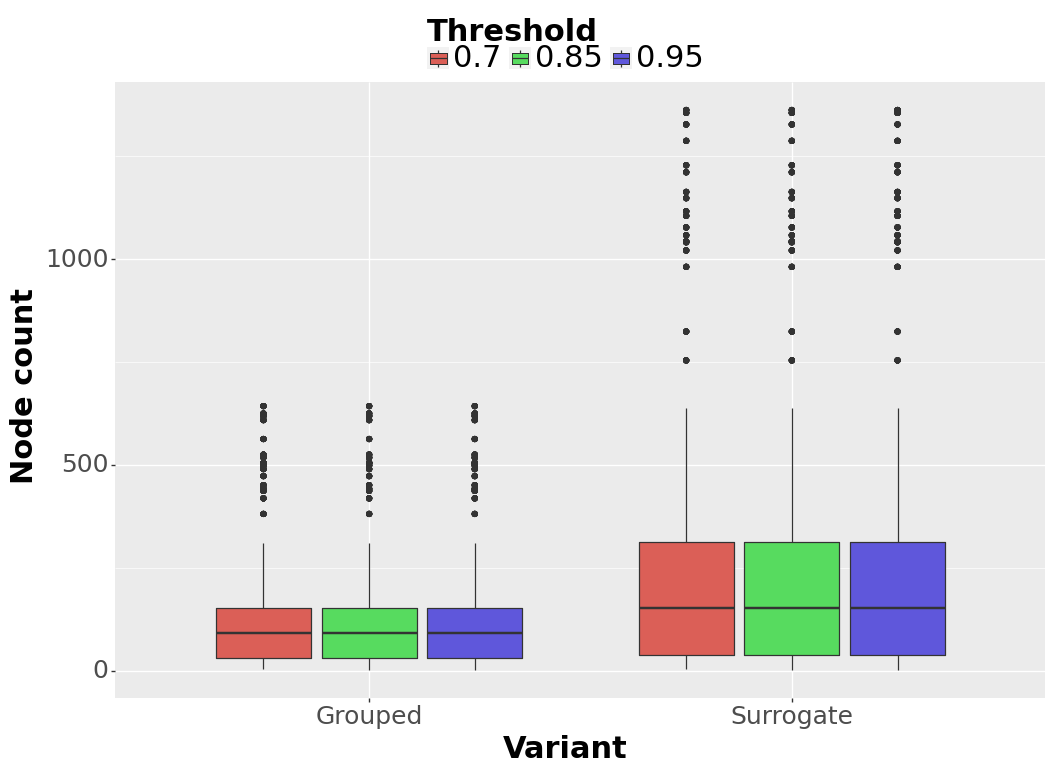

<ggplot: (815004018)>

In [48]:
plot

In [49]:
plot.save(filename = './figures/BART_L_node_count.png', dpi = 300)

/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 12 x 8 in image.
/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ./figures/BART_L_node_count.png


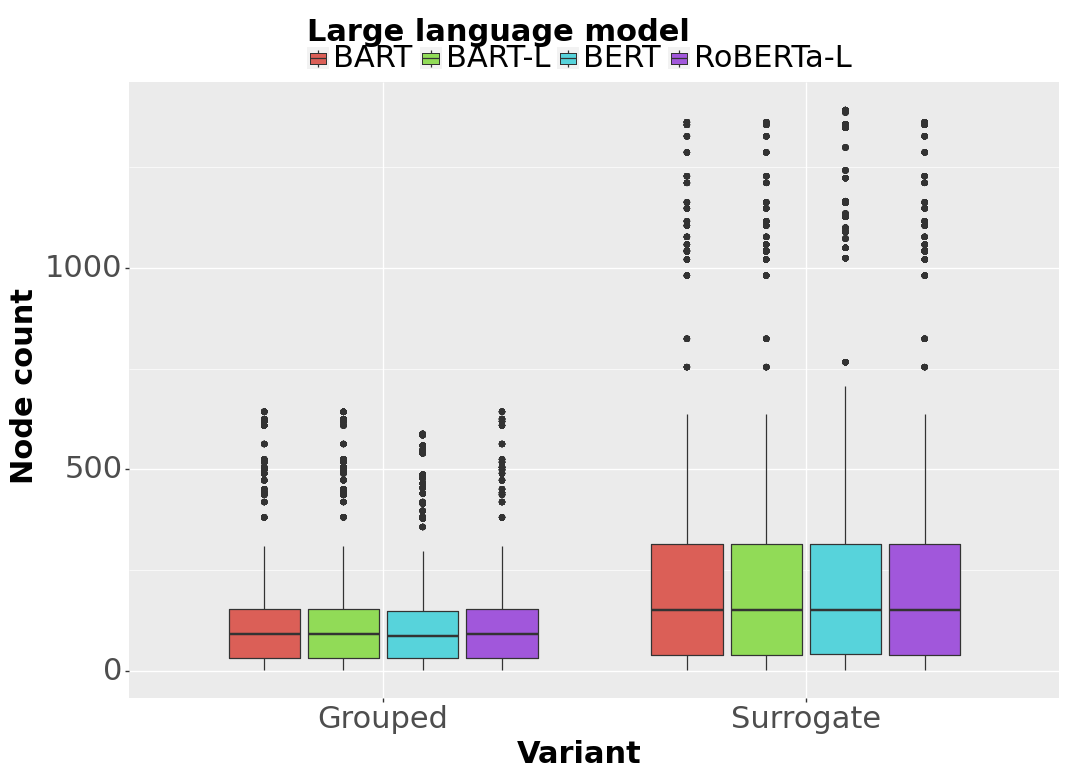

<ggplot: (815015813)>

In [50]:
p9.ggplot(llm_df,
  p9.aes(x = 'approach', y = 'nodes', fill = 'LLM')) + \
  p9.theme_gray() + \
  p9.geom_boxplot() + \
  p9.xlab('Variant') + \
  p9.ylab('Node count') + \
  p9.labs(fill = 'Large language model') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
  )

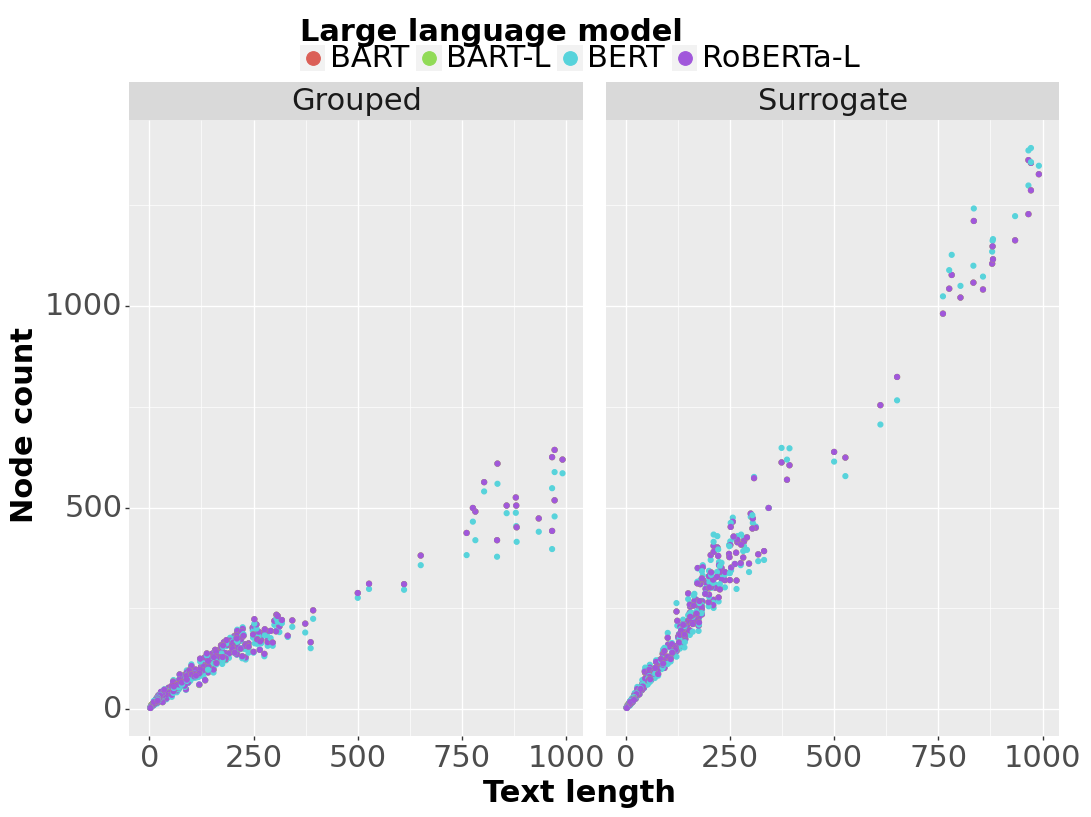

<ggplot: (814364633)>

In [51]:
p9.ggplot(llm_df.groupby(by = ['dataset', 'split', 'index', 'approach', 'LLM', 'length']).agg(average_nodes = ('nodes', 'mean'), std_nodes = ('nodes', 'std')).reset_index(),
  p9.aes(x = 'length', y = 'average_nodes', colour = 'LLM')) + \
  p9.theme_gray() + \
  p9.geom_point() + \
  p9.xlab('Text length') + \
  p9.ylab('Node count') + \
  p9.labs(colour = 'Large language model') + \
  p9.facet_wrap('~ approach', ncol = 2) + \
  p9.guides(colour = p9.guide_legend(override_aes = {'size' : 5})) + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
    subplots_adjust = {
      'hspace': 0.05,
      'wspace': 0.05
    }
  )

In [52]:
llm_df['threshold'] = llm_df['threshold'].astype(float)
plot = p9.ggplot(llm_df.groupby(by = ['dataset', 'split', 'index', 'approach', 'LLM', 'threshold', 'length']).agg(average_nodes = ('nodes', 'mean'), std_nodes = ('nodes', 'std')).reset_index(),
  p9.aes(x = 'length', y = 'average_nodes', colour = 'LLM', shape = 'approach')) + \
  p9.theme_gray() + \
  p9.geom_point() + \
  p9.xlab('Text length') + \
  p9.ylab('Node count') + \
  p9.labs(colour = 'LLM', shape = 'Variant') + \
  p9.facet_wrap('~ threshold', ncol = 3) + \
  p9.guides(colour = p9.guide_legend(override_aes = {'size' : 5}), shape = p9.guide_legend(override_aes = {'size' : 5})) + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (16, 8),
    text = p9.element_text(size = 22),
    axis_text = p9.element_text(size = 18),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
    subplots_adjust = {
      'hspace': 0.05,
      'wspace': 0.05
    }
  )

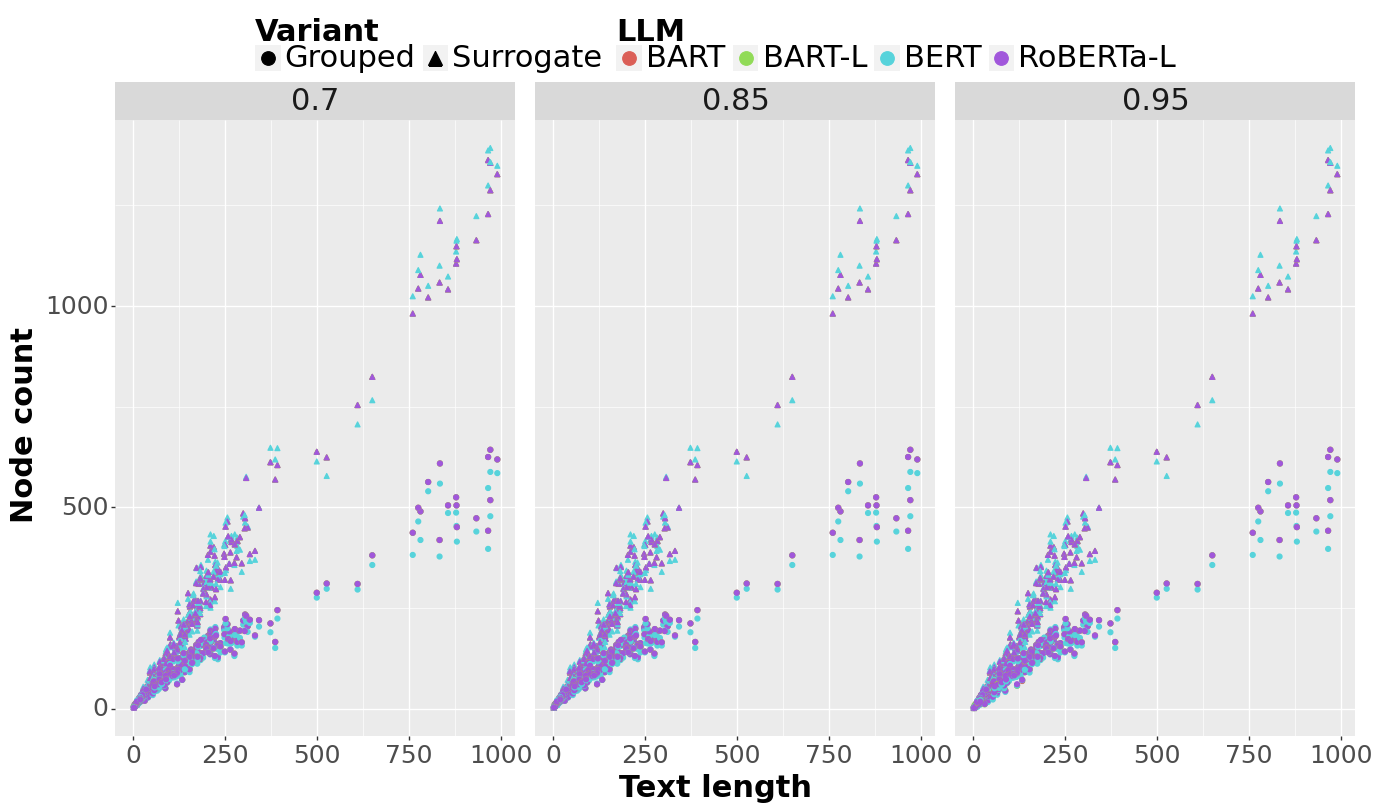

<ggplot: (809599952)>

In [53]:
plot

In [54]:
plot.save(filename = './figures/llm_node_count_scatter.png', dpi = 300)

/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 16 x 8 in image.
/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ./figures/llm_node_count_scatter.png


In [55]:
llm_df['threshold'] = llm_df['threshold'].astype(float)
tmp_llm_df = llm_df.groupby(by = ['dataset', 'split', 'index', 'approach', 'LLM', 'threshold', 'length']).agg(average_nodes = ('nodes', 'mean'), std_nodes = ('nodes', 'std')).reset_index()
plot = p9.ggplot(tmp_llm_df[tmp_llm_df['LLM'] == 'BART-L'],
  p9.aes(x = 'length', y = 'average_nodes', colour = 'approach')) + \
  p9.theme_gray() + \
  p9.geom_point() + \
  p9.xlab('Text length') + \
  p9.ylab('Node count') + \
  p9.labs(colour = 'Variant') + \
  p9.facet_wrap('~ threshold', ncol = 3) + \
  p9.guides(colour = p9.guide_legend(override_aes = {'size' : 5}), shape = p9.guide_legend(override_aes = {'size' : 5})) + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (16, 8),
    text = p9.element_text(size = 22),
    axis_text = p9.element_text(size = 18),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
    subplots_adjust = {
      'hspace': 0.05,
      'wspace': 0.05
    }
  )

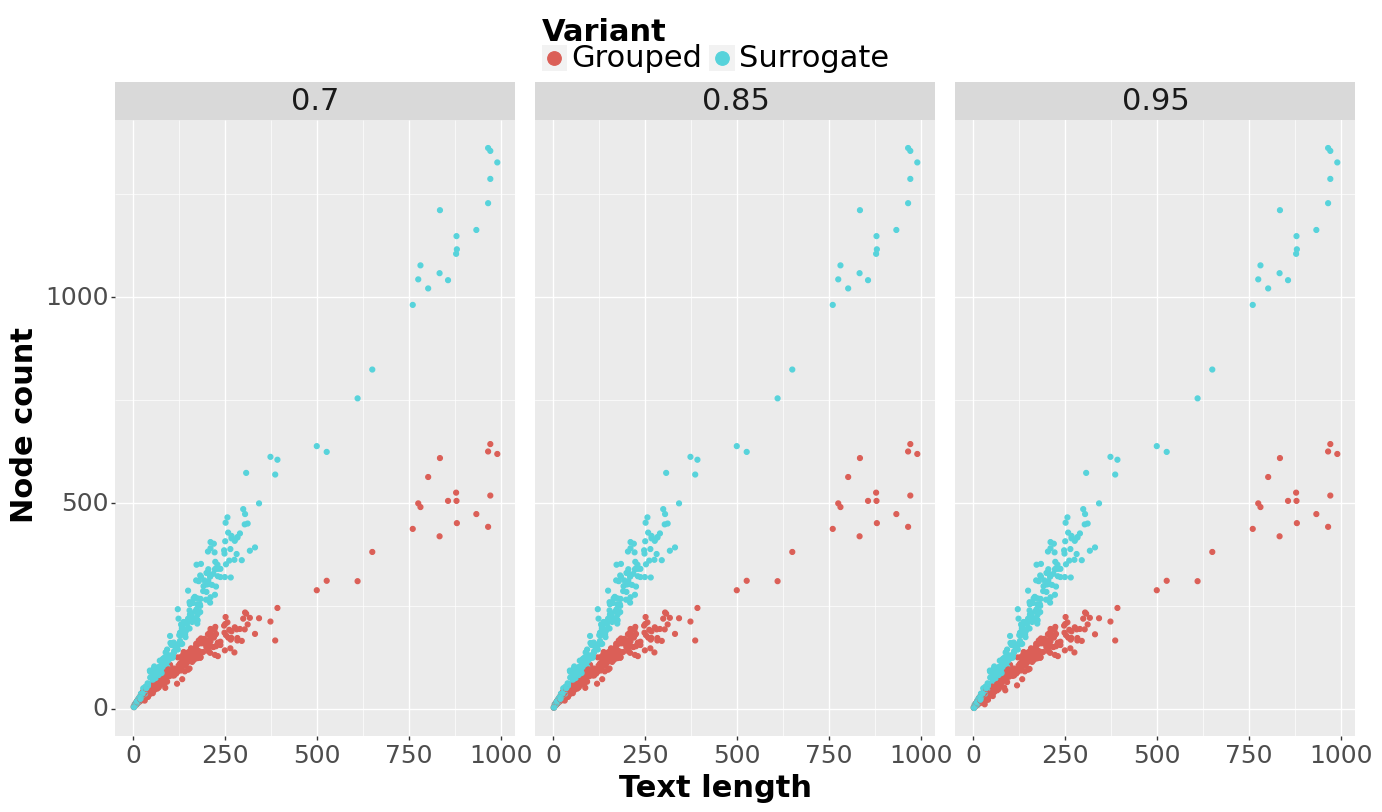

<ggplot: (813638990)>

In [56]:
plot

In [57]:
plot.save(filename = './figures/BART_L_node_count_scatter.png', dpi = 300)

/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 16 x 8 in image.
/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ./figures/BART_L_node_count_scatter.png


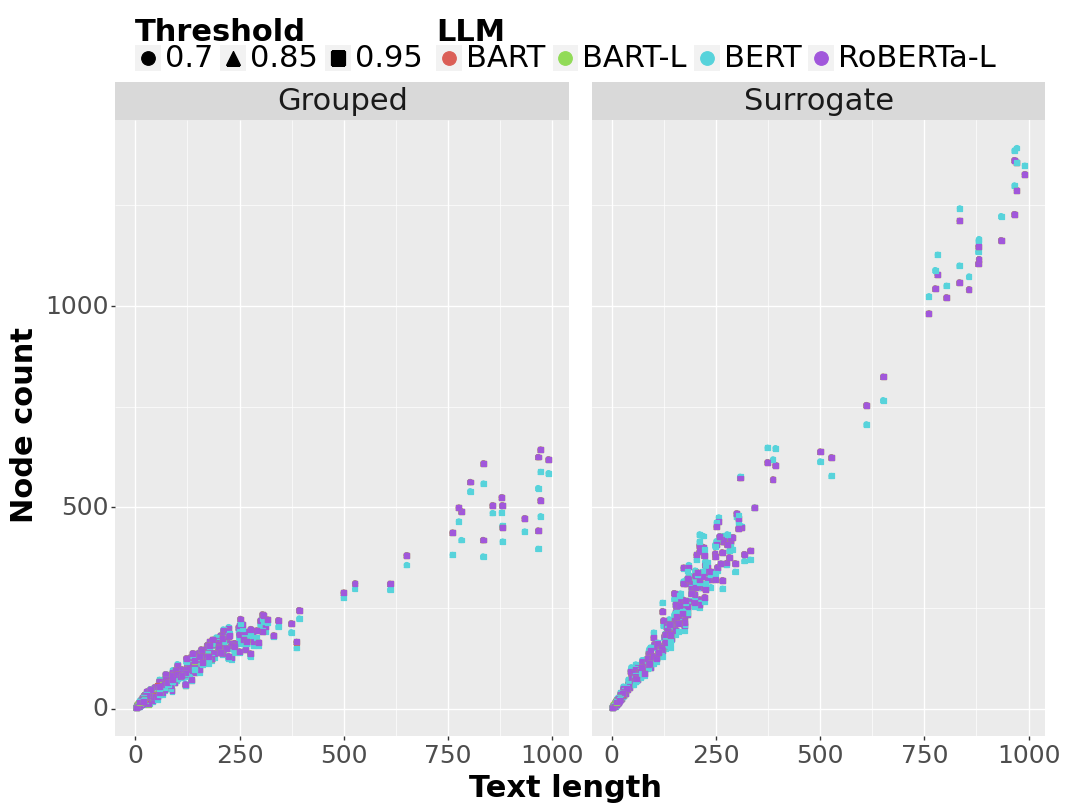

<ggplot: (812708159)>

In [58]:
llm_df['threshold'] = llm_df['threshold'].astype(float)
p9.ggplot(llm_df.groupby(by = ['dataset', 'split', 'index', 'approach', 'LLM', 'threshold', 'length']).agg(average_nodes = ('nodes', 'mean'), std_nodes = ('nodes', 'std')).reset_index(),
  p9.aes(x = 'length', y = 'average_nodes', colour = 'LLM', shape = 'factor(threshold)')) + \
  p9.theme_gray() + \
  p9.geom_point() + \
  p9.xlab('Text length') + \
  p9.ylab('Node count') + \
  p9.labs(colour = 'LLM', shape = 'Threshold') + \
  p9.facet_wrap('~ approach', ncol = 2) + \
  p9.guides(colour = p9.guide_legend(override_aes = {'size' : 5}), shape = p9.guide_legend(override_aes = {'size' : 5})) + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_text = p9.element_text(size = 18),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
    subplots_adjust = {
      'hspace': 0.05,
      'wspace': 0.05
    }
  )

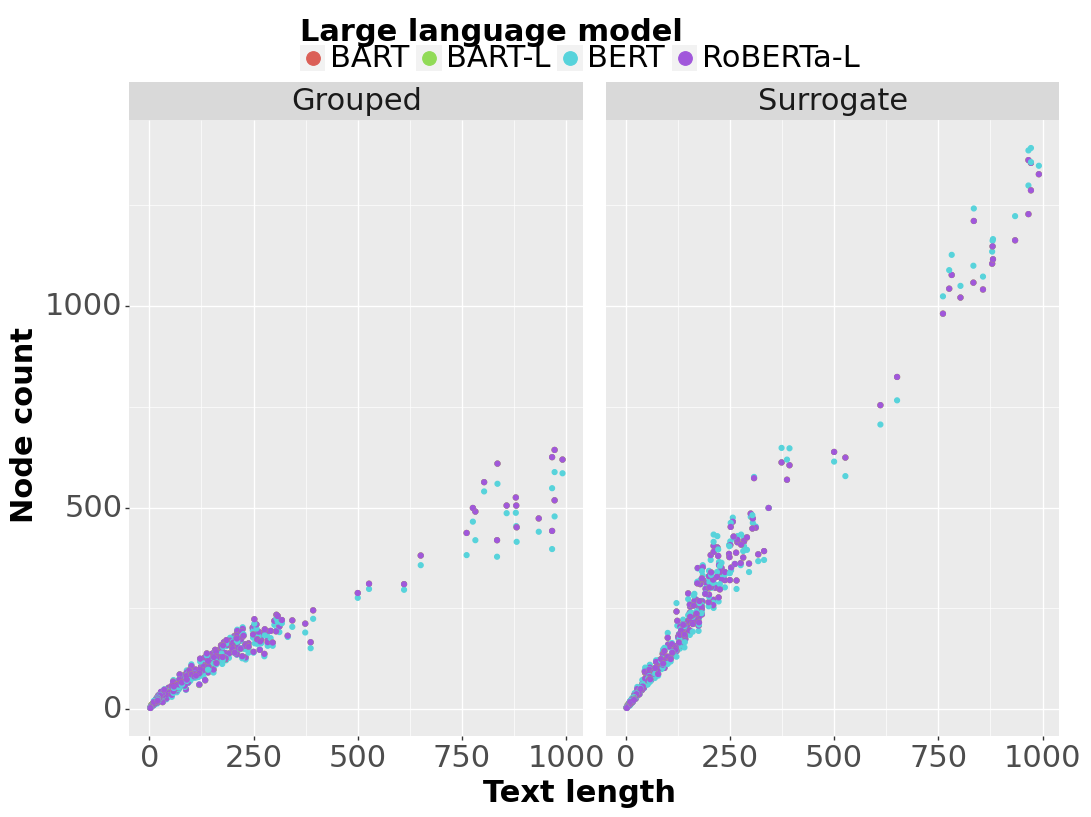

<ggplot: (812737624)>

In [59]:
p9.ggplot(llm_df.groupby(by = ['dataset', 'split', 'index', 'approach', 'LLM', 'length']).agg(average_nodes = ('nodes', 'mean'), std_nodes = ('nodes', 'std')).reset_index(),
  p9.aes(x = 'length', y = 'average_nodes', colour = 'LLM')) + \
  p9.theme_gray() + \
  p9.geom_point() + \
  p9.xlab('Text length') + \
  p9.ylab('Node count') + \
  p9.labs(colour = 'Large language model') + \
  p9.facet_wrap('~ approach', ncol = 2) + \
  p9.guides(colour = p9.guide_legend(override_aes = {'size' : 5})) + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
    subplots_adjust = {
      'hspace': 0.05,
      'wspace': 0.05
    }
  )

### Edge count

In [60]:
llm_df['threshold'] = pd.Categorical(llm_df['threshold'], categories = llm_df['threshold'].sort_values(ascending = True).unique().tolist())
plot = p9.ggplot(llm_df,
  p9.aes(x = 'LLM', y = 'edges', fill = 'factor(threshold)')) + \
  p9.theme_gray() + \
  p9.geom_boxplot() + \
  p9.xlab('LLM') + \
  p9.ylab('Edge count') + \
  p9.labs(fill = 'Threshold') + \
  p9.facet_wrap('~approach', ncol = 2) + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_text = p9.element_text(size = 18),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
    subplots_adjust = {
      'hspace': 0.05,
      'wspace': 0.05
    }
  )

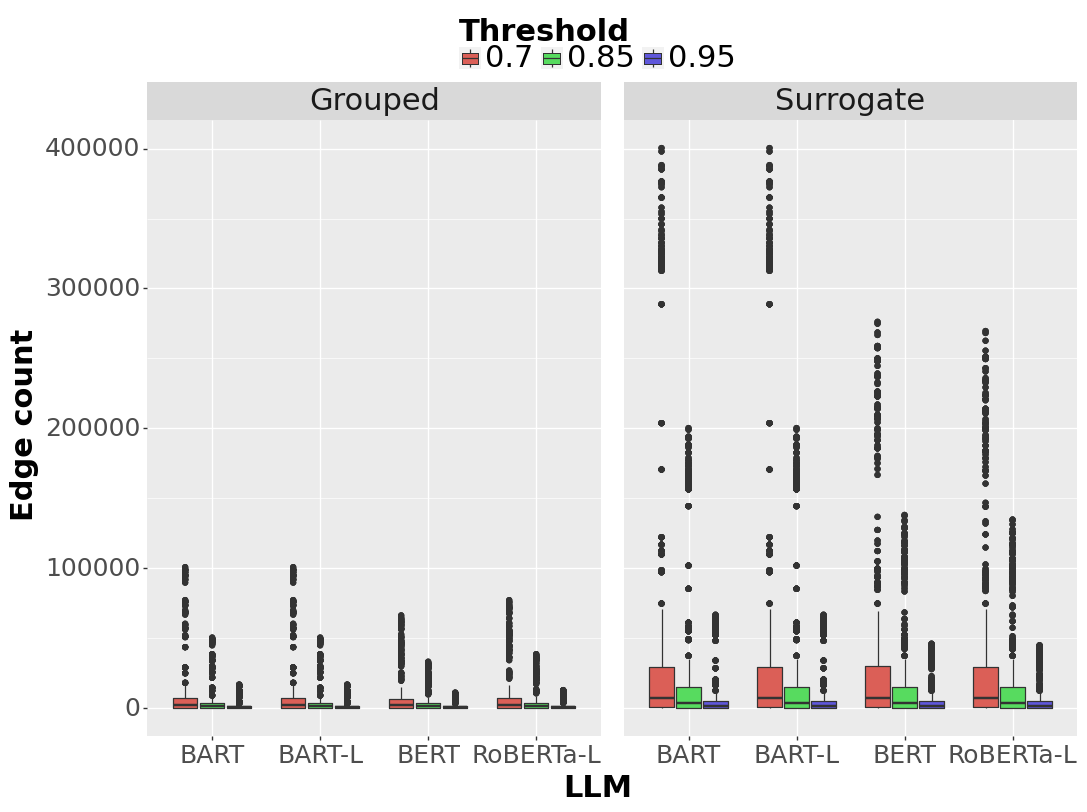

<ggplot: (809722772)>

In [61]:
plot

In [62]:
plot.save(filename = './figures/llm_edge_count.png', dpi = 300)

/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 12 x 8 in image.
/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ./figures/llm_edge_count.png


In [63]:
llm_df['threshold'] = pd.Categorical(llm_df['threshold'], categories = llm_df['threshold'].sort_values(ascending = True).unique().tolist())
plot = p9.ggplot(llm_df[llm_df['LLM'] == 'BART-L'],
  p9.aes(x = 'approach', y = 'edges', fill = 'factor(threshold)')) + \
  p9.theme_gray() + \
  p9.geom_boxplot() + \
  p9.xlab('Variant') + \
  p9.ylab('Edge count') + \
  p9.labs(fill = 'Threshold') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_text = p9.element_text(size = 18),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
  )

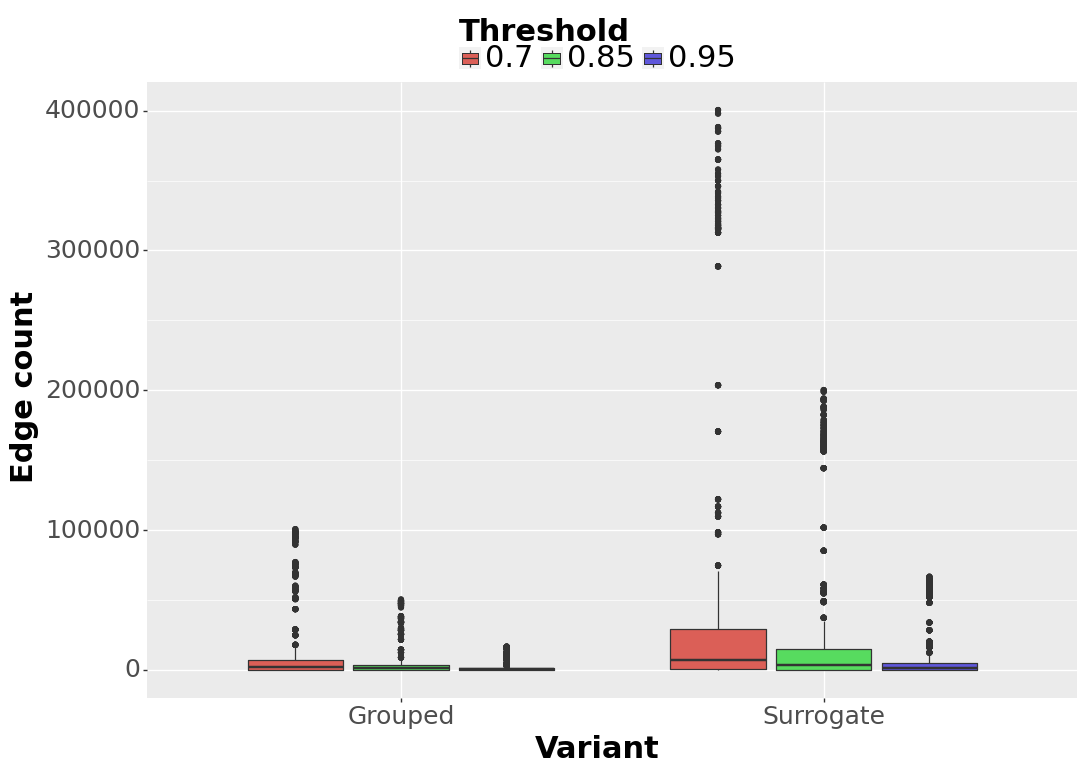

<ggplot: (814441497)>

In [64]:
plot

In [65]:
plot.save(filename = './figures/BART_L_edge_count.png', dpi = 300)

/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 12 x 8 in image.
/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ./figures/BART_L_edge_count.png


In [66]:
llm_df[['approach', 'LLM', 'threshold', 'edges']].groupby(by = ['approach', 'LLM', 'threshold']).describe()

edges                                   \
                                count          mean           std  min   
approach  LLM       threshold                                            
Grouped   BART      0.7        3600.0   7747.456667  16972.742721  5.0   
                    0.85       3600.0   3874.122500   8486.336406  3.0   
                    0.95       3600.0   1291.790833   2828.782275  1.0   
          BART-L    0.7        3600.0   7747.455833  16972.738326  5.0   
                    0.85       3600.0   3874.122500   8486.336406  3.0   
                    0.95       3600.0   1291.791667   2828.785270  1.0   
          BERT      0.7        3600.0   5929.676667  10892.839066  5.0   
                    0.85       3600.0   2965.209167   5446.410220  3.0   
                    0.95       3600.0    988.790000   1815.448641  1.0   
          RoBERTa-L 0.7        3600.0   6678.628333  12769.422012  5.0   
                    0.85       3600.0   3339.705000   6384.667351  3.0   
                    0.95       3600.0   1113.645000   2128.216990  1.0   
Surrogate BART      0.7        3600.0  33705.851667  76738.053231  5.0   
                    0.85       3600.0  16853.300000  38368.986556  3.0   
                    0.95       3600.0   5618.160000  12789.641205  1.0   
          BART-L    0.7        3600.0  33705.858333  76738.053088  5.0   
                    0.85       3600.0  16853.302500  38368.996390  3.0   
                    0.95       3600.0   5618.160000  12789.641205  1.0   
          BERT      0.7        3600.0  26730.088333  50746.038066  5.0   
                    0.85       3600.0  13365.409167  25372.977401  3.0   
                    0.95       3600.0   4455.517500   8457.649555  1.0   
          RoBERTa-L 0.7        3600.0  26134.488333  49023.278388  5.0   
                    0.85       3600.0  13067.615833  24511.597957  3.0   
                    0.95       3600.0   4356.262500   8170.516095  1.0   

                                                                   
                                  25%     50%       75%       max  
approach  LLM       threshold                                      
Grouped   BART      0.7        302.50  2485.0   7046.00  100748.0  
                    0.85       151.75  1243.0   3523.50   50374.0  
                    0.95        51.25   415.0   1174.75   16792.0  
          BART-L    0.7        302.50  2485.0   7046.00  100748.0  
                    0.85       151.75  1243.0   3523.50   50374.0  
                    0.95        51.25   415.0   1174.75   16792.0  
          BERT      0.7        307.00  2297.0   6508.75   66232.0  
                    0.85       154.00  1149.0   3254.50   33116.0  
                    0.95        52.00   383.5   1085.50   11039.0  
          RoBERTa-L 0.7        302.50  2485.0   7046.00   77148.0  
                    0.85       151.75  1243.0   3523.50   38574.0  
                    0.95        51.25   415.0   1174.75   12858.0  
Surrogate BART      0.7        462.75  6886.0  29534.50  400453.0  
                    0.85       231.50  3443.5  14767.75  200227.0  
                    0.95        77.25  1148.5   4923.25   66743.0  
          BART-L    0.7        462.75  6886.0  29534.50  400453.0  
                    0.85       231.50  3443.5  14767.75  200227.0  
                    0.95        77.25  1148.5   4923.25   66743.0  
          BERT      0.7        516.75  6840.5  29815.25  276181.0  
                    0.85       258.75  3420.5  14907.75  138091.0  
                    0.95        86.75  1140.5   4969.75   46031.0  
          RoBERTa-L 0.7        462.75  6886.0  29534.50  269611.0  
                    0.85       231.50  3443.5  14767.75  134806.0  
                    0.95        77.25  1148.5   4923.25   44936.0

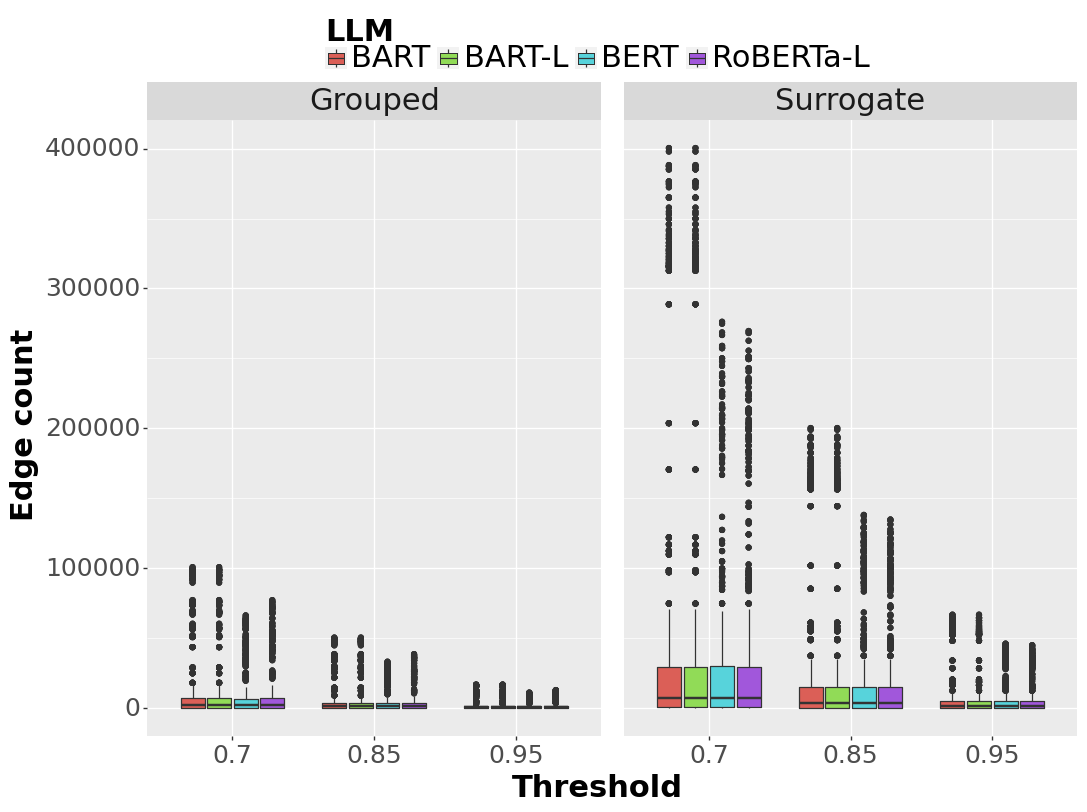

<ggplot: (808662677)>

In [67]:
llm_df['threshold'] = pd.Categorical(llm_df['threshold'], categories = llm_df['threshold'].sort_values(ascending = True).unique().tolist())
p9.ggplot(llm_df,
  p9.aes(x = 'threshold', y = 'edges', fill = 'LLM')) + \
  p9.theme_gray() + \
  p9.geom_boxplot() + \
  p9.xlab('Threshold') + \
  p9.ylab('Edge count') + \
  p9.labs(fill = 'LLM') + \
  p9.facet_wrap('~approach', ncol = 2) + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_text = p9.element_text(size = 18),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
    subplots_adjust = {
      'hspace': 0.05,
      'wspace': 0.05
    }
  )

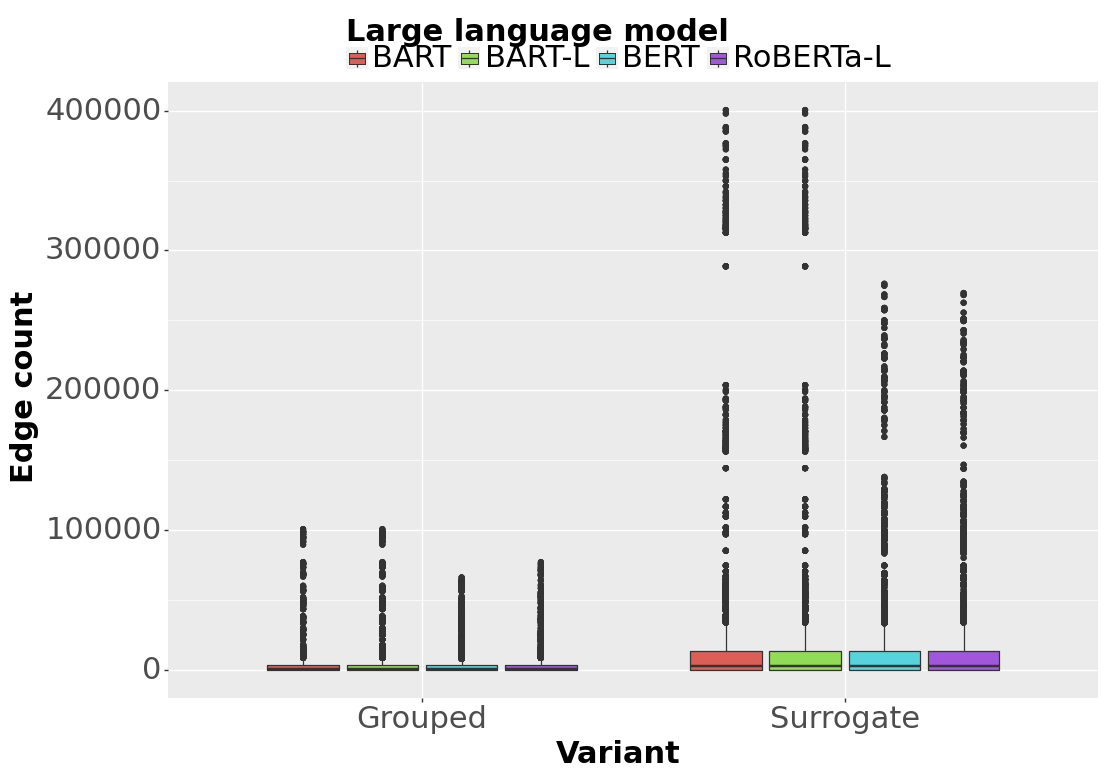

<ggplot: (808662200)>

In [68]:
p9.ggplot(llm_df,
  p9.aes(x = 'approach', y = 'edges', fill = 'LLM')) + \
  p9.theme_gray() + \
  p9.geom_boxplot() + \
  p9.xlab('Variant') + \
  p9.ylab('Edge count') + \
  p9.labs(fill = 'Large language model') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
  )

In [69]:
llm_df['threshold'] = llm_df['threshold'].astype(float)
plot = p9.ggplot(llm_df.groupby(by = ['dataset', 'split', 'index', 'approach', 'LLM', 'threshold', 'length']).agg(average_edges = ('edges', 'mean'), std_edges = ('edges', 'std')).reset_index(),
  p9.aes(x = 'length', y = 'average_edges', colour = 'LLM', shape = 'approach')) + \
  p9.theme_gray() + \
  p9.geom_point() + \
  p9.xlab('Text length') + \
  p9.ylab('Edge count') + \
  p9.labs(colour = 'LLM', shape = 'Variant') + \
  p9.facet_wrap('~ threshold', ncol = 3) + \
  p9.guides(colour = p9.guide_legend(override_aes = {'size' : 5}), shape = p9.guide_legend(override_aes = {'size' : 5})) + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (16, 8),
    text = p9.element_text(size = 22),
    axis_text = p9.element_text(size = 18),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
    subplots_adjust = {
      'hspace': 0.05,
      'wspace': 0.05
    }
  )

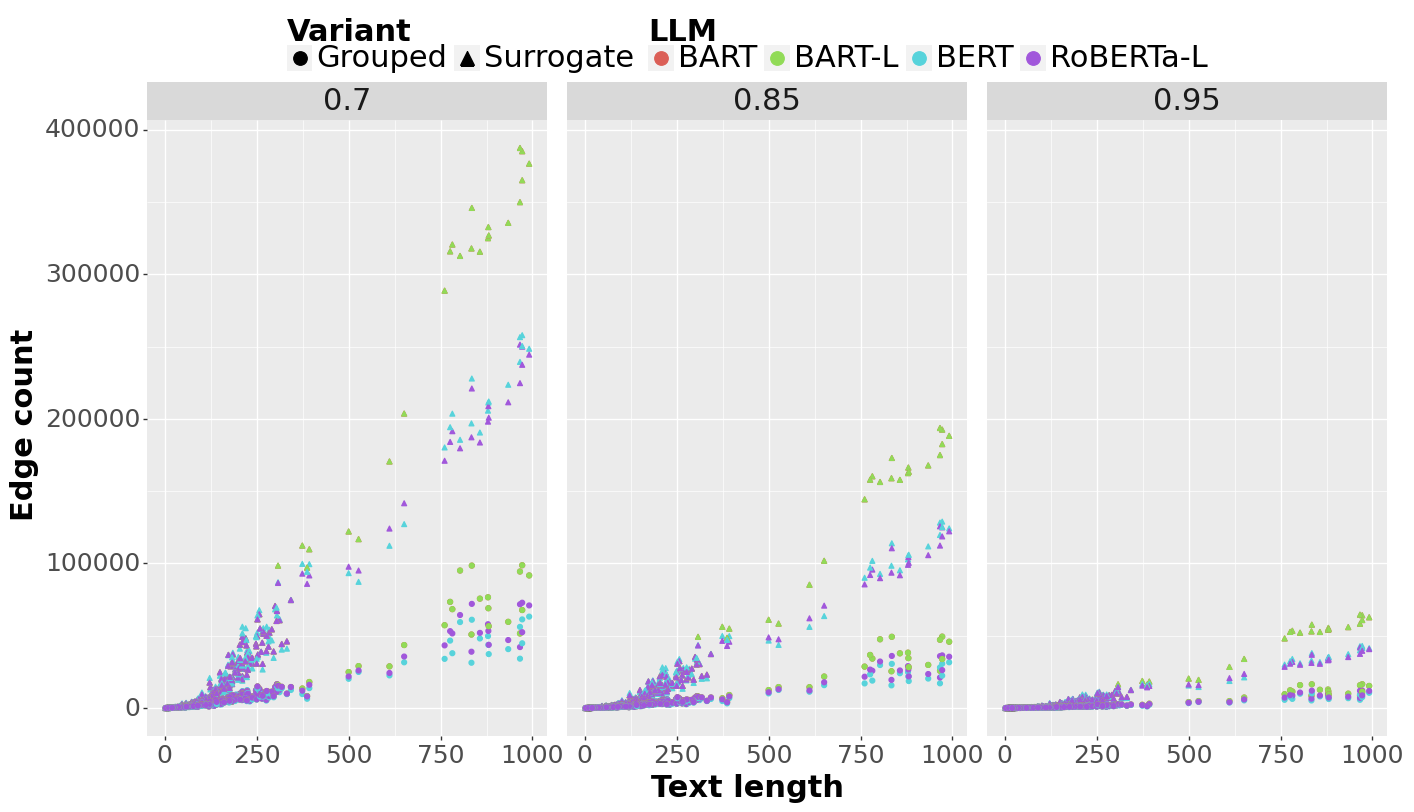

<ggplot: (809569148)>

In [70]:
plot

In [71]:
plot.save(filename = './figures/llm_edge_scatter.png', dpi = 300)

/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 16 x 8 in image.
/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ./figures/llm_edge_scatter.png


In [72]:
llm_df['threshold'] = llm_df['threshold'].astype(float)
tmp_llm_df = llm_df.groupby(by = ['dataset', 'split', 'index', 'approach', 'LLM', 'threshold', 'length']).agg(average_edges = ('edges', 'mean'), std_edges = ('edges', 'std')).reset_index()
plot = p9.ggplot(tmp_llm_df[tmp_llm_df['LLM'] == 'BART-L'],
  p9.aes(x = 'length', y = 'average_edges', colour = 'approach')) + \
  p9.theme_gray() + \
  p9.geom_point() + \
  p9.xlab('Text length') + \
  p9.ylab('Edge count') + \
  p9.labs(colour = 'Variant') + \
  p9.facet_wrap('~ threshold', ncol = 3) + \
  p9.guides(colour = p9.guide_legend(override_aes = {'size' : 5}), shape = p9.guide_legend(override_aes = {'size' : 5})) + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (16, 8),
    text = p9.element_text(size = 22),
    axis_text = p9.element_text(size = 18),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
    subplots_adjust = {
      'hspace': 0.05,
      'wspace': 0.05
    }
  )

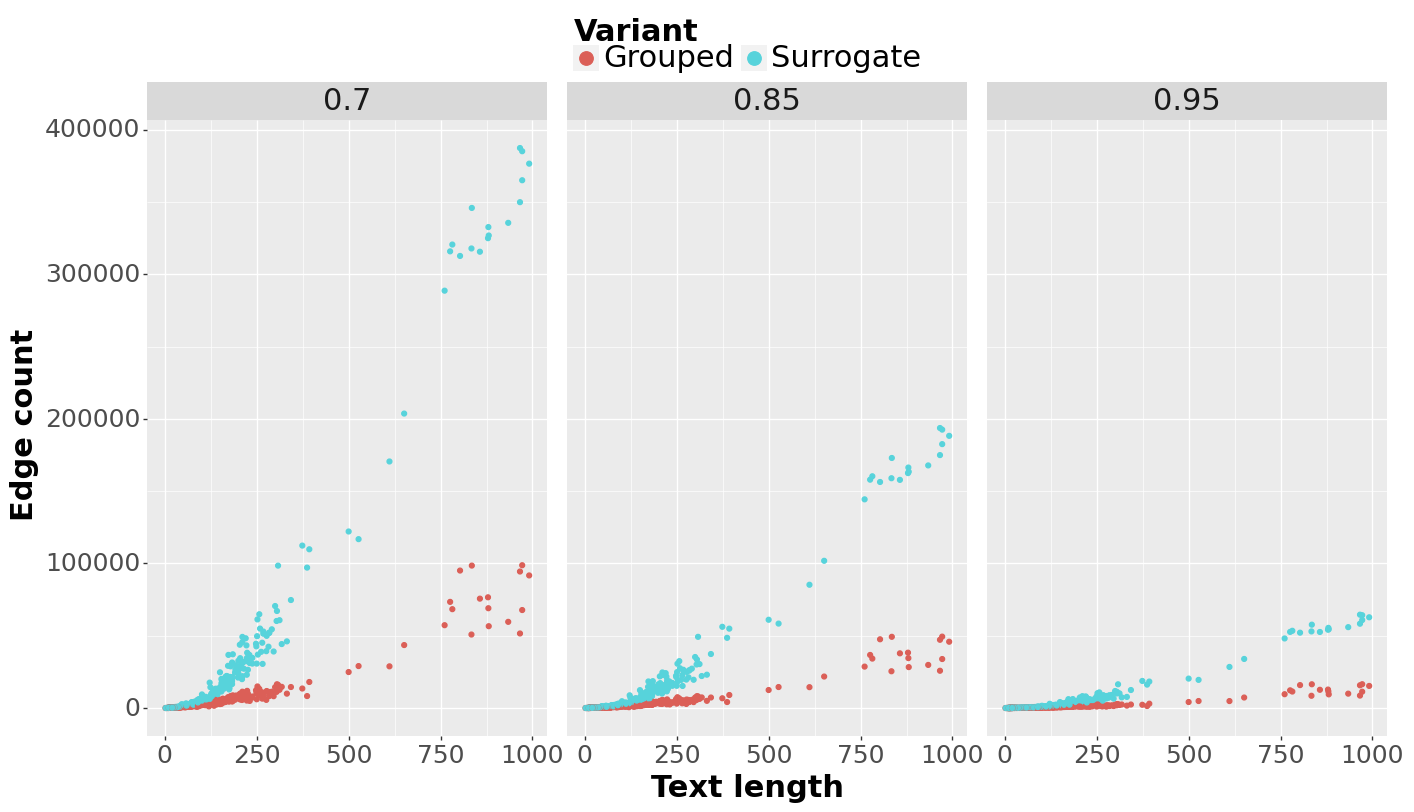

<ggplot: (812502710)>

In [73]:
plot

In [74]:
plot.save(filename = './figures/BART_L_edge_scatter.png', dpi = 300)

/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 16 x 8 in image.
/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ./figures/BART_L_edge_scatter.png


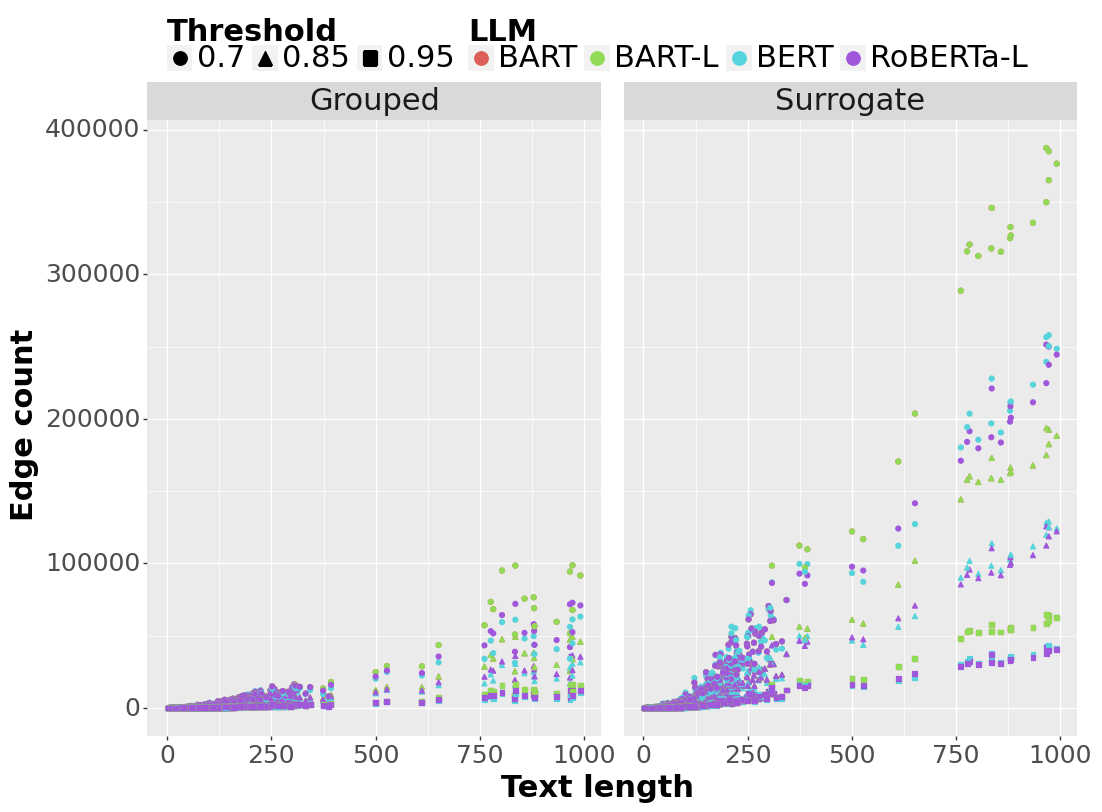

<ggplot: (809768408)>

In [75]:
llm_df['threshold'] = llm_df['threshold'].astype(float)
p9.ggplot(llm_df.groupby(by = ['dataset', 'split', 'index', 'approach', 'LLM', 'threshold', 'length']).agg(average_edges = ('edges', 'mean'), std_edges = ('edges', 'std')).reset_index(),
  p9.aes(x = 'length', y = 'average_edges', colour = 'LLM', shape = 'factor(threshold)')) + \
  p9.theme_gray() + \
  p9.geom_point() + \
  p9.xlab('Text length') + \
  p9.ylab('Edge count') + \
  p9.labs(colour = 'LLM', shape = 'Threshold') + \
  p9.facet_wrap('~ approach', ncol = 2) + \
  p9.guides(colour = p9.guide_legend(override_aes = {'size' : 5}), shape = p9.guide_legend(override_aes = {'size' : 5})) + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_text = p9.element_text(size = 18),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
    subplots_adjust = {
      'hspace': 0.05,
      'wspace': 0.05
    }
  )

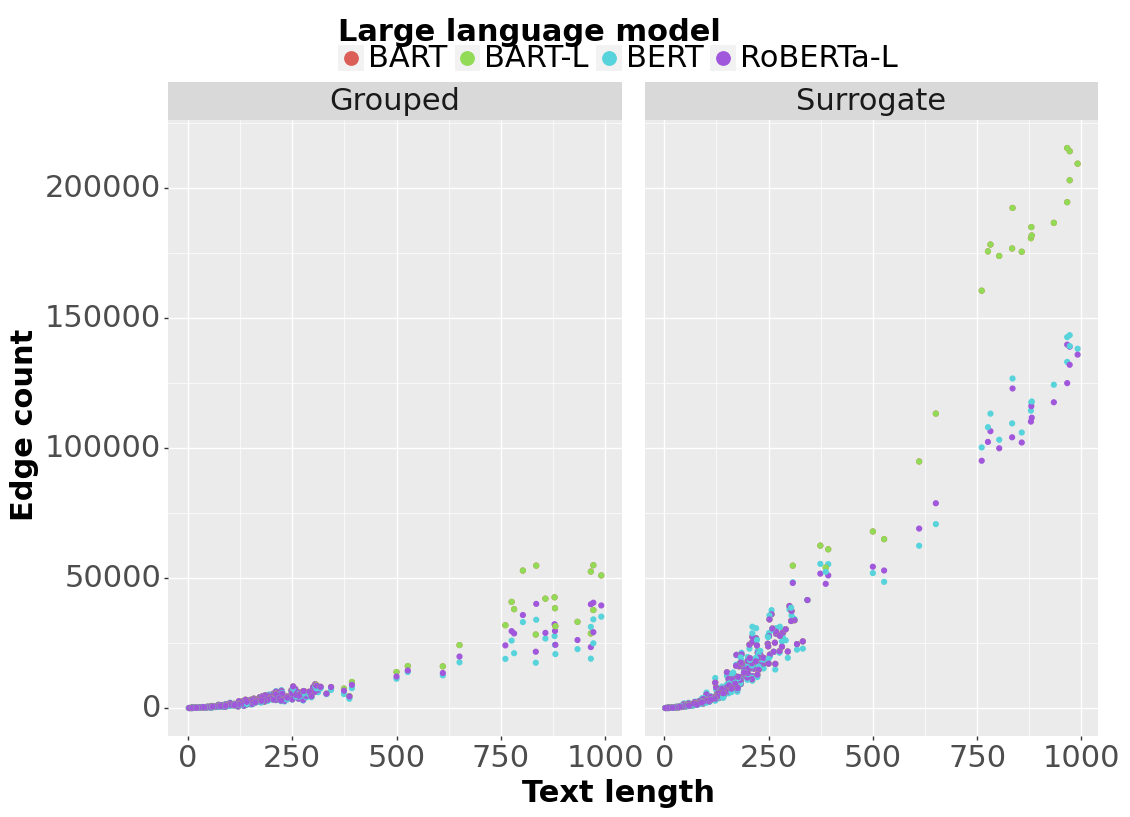

<ggplot: (807520914)>

In [76]:
p9.ggplot(llm_df.groupby(by = ['dataset', 'split', 'index', 'approach', 'LLM', 'length']).agg(average_edges = ('edges', 'mean'), std_edges = ('edges', 'std')).reset_index(),
  p9.aes(x = 'length', y = 'average_edges', colour = 'LLM')) + \
  p9.theme_gray() + \
  p9.geom_point() + \
  p9.xlab('Text length') + \
  p9.ylab('Edge count') + \
  p9.labs(colour = 'Large language model') + \
  p9.facet_wrap('~ approach', ncol = 2) + \
  p9.guides(colour = p9.guide_legend(override_aes = {'size' : 5})) + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
    subplots_adjust = {
      'hspace': 0.05,
      'wspace': 0.05
    }
  )

### Graph density

In [77]:
llm_df['threshold'] = pd.Categorical(llm_df['threshold'], categories = llm_df['threshold'].sort_values(ascending = True).unique().tolist())
plot = p9.ggplot(llm_df,
  p9.aes(x = 'LLM', y = 'density', fill = 'factor(threshold)')) + \
  p9.theme_gray() + \
  p9.geom_boxplot() + \
  p9.xlab('Threshold') + \
  p9.ylab('Graph density') + \
  p9.labs(fill = 'Threshold') + \
  p9.facet_wrap('~approach', ncol = 2) + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_text = p9.element_text(size = 18),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
    subplots_adjust = {
      'hspace': 0.05,
      'wspace': 0.05
    }
  )

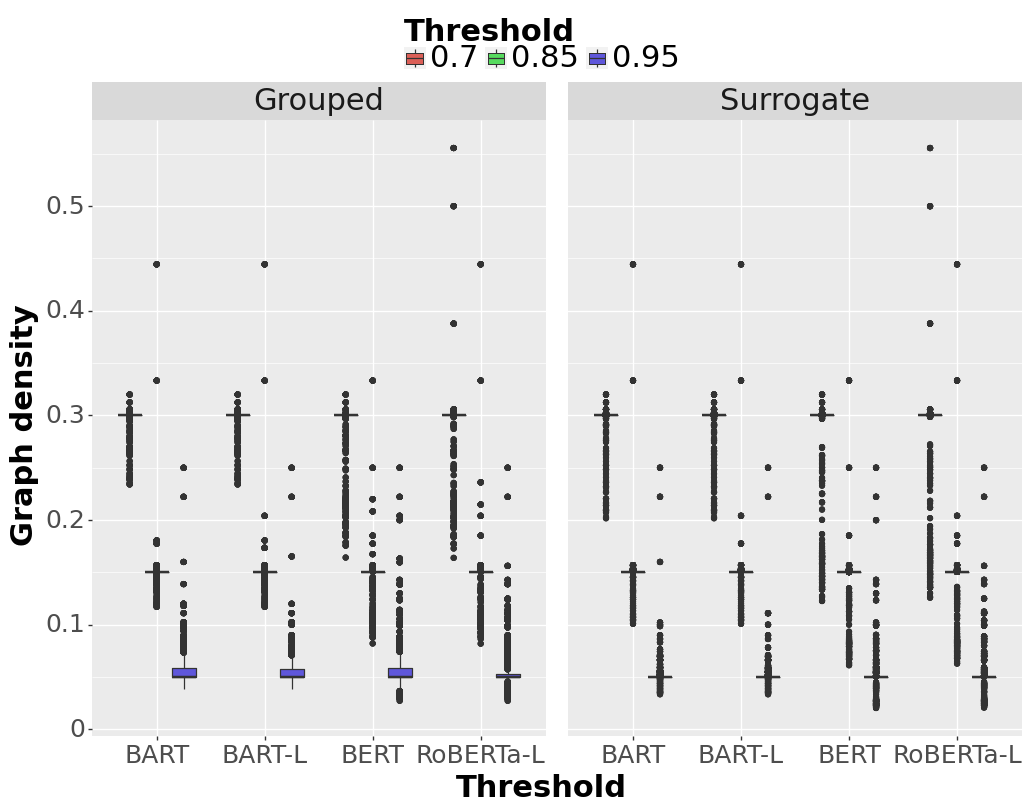

<ggplot: (811593786)>

In [78]:
plot

In [79]:
plot.save(filename = './figures/llm_density.png', dpi = 300)

/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 12 x 8 in image.
/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ./figures/llm_density.png


In [80]:
llm_df['threshold'] = pd.Categorical(llm_df['threshold'], categories = llm_df['threshold'].sort_values(ascending = True).unique().tolist())
plot = p9.ggplot(llm_df[llm_df['LLM'] == 'BART-L'],
  p9.aes(x = 'approach', y = 'density', fill = 'factor(threshold)')) + \
  p9.theme_gray() + \
  p9.geom_boxplot() + \
  p9.xlab('Variant') + \
  p9.ylab('Graph density') + \
  p9.labs(fill = 'Threshold') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_text = p9.element_text(size = 18),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
  )

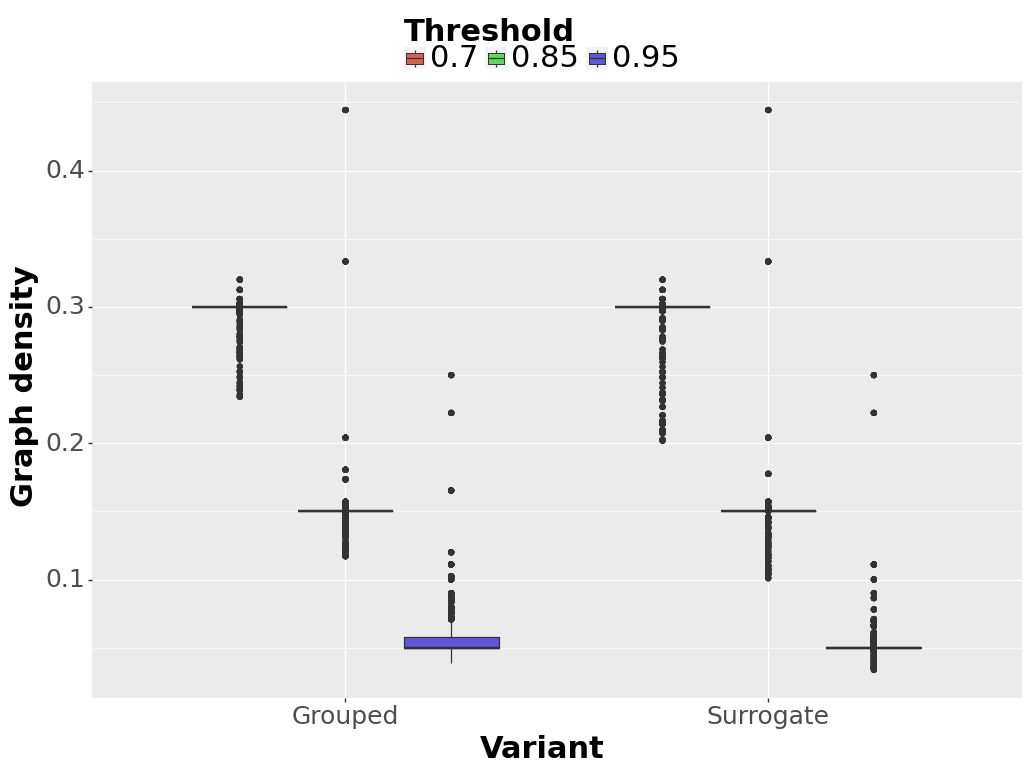

<ggplot: (809877213)>

In [81]:
plot

In [82]:
plot.save(filename = './figures/BART_L_density.png', dpi = 300)

/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 12 x 8 in image.
/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ./figures/BART_L_density.png


In [83]:
llm_df[['approach', 'LLM', 'threshold', 'density']].groupby(by = ['approach', 'LLM', 'threshold']).describe()

density                                          \
                                count      mean       std       min       25%   
approach  LLM       threshold                                                   
Grouped   BART      0.7        3600.0  0.298854  0.008012  0.234063  0.300000   
                    0.85       3600.0  0.151461  0.020529  0.117032  0.150017   
                    0.95       3600.0  0.059058  0.021893  0.039012  0.050024   
          BART-L    0.7        3600.0  0.298854  0.008012  0.234063  0.300000   
                    0.85       3600.0  0.151688  0.020773  0.117032  0.150017   
                    0.95       3600.0  0.057355  0.020034  0.039012  0.050023   
          BERT      0.7        3600.0  0.294475  0.022004  0.164231  0.300000   
                    0.85       3600.0  0.149100  0.017575  0.082116  0.150016   
                    0.95       3600.0  0.060478  0.027379  0.027373  0.050022   
          RoBERTa-L 0.7        3600.0  0.296102  0.029857  0.163919  0.299995   
                    0.85       3600.0  0.149821  0.024227  0.081959  0.150017   
                    0.95       3600.0  0.058823  0.024521  0.027321  0.050022   
Surrogate BART      0.7        3600.0  0.297910  0.012513  0.201796  0.300000   
                    0.85       3600.0  0.150786  0.021007  0.100898  0.150003   
                    0.95       3600.0  0.053581  0.018017  0.033633  0.050004   
          BART-L    0.7        3600.0  0.297910  0.012513  0.201796  0.300000   
                    0.85       3600.0  0.151027  0.021283  0.100898  0.150003   
                    0.95       3600.0  0.053038  0.016966  0.033633  0.050004   
          BERT      0.7        3600.0  0.290844  0.034438  0.122681  0.299999   
                    0.85       3600.0  0.146700  0.021365  0.061340  0.150004   
                    0.95       3600.0  0.053995  0.022348  0.020447  0.050004   
          RoBERTa-L 0.7        3600.0  0.292824  0.039086  0.125874  0.299999   
                    0.85       3600.0  0.147745  0.026719  0.062937  0.150004   
                    0.95       3600.0  0.054497  0.022173  0.020979  0.050004   

                                                             
                                    50%       75%       max  
approach  LLM       threshold                                
Grouped   BART      0.7        0.300022  0.300129  0.320000  
                    0.85       0.150054  0.150363  0.444444  
                    0.95       0.050117  0.058824  0.250000  
          BART-L    0.7        0.300022  0.300129  0.320000  
                    0.85       0.150054  0.150363  0.444444  
                    0.95       0.050080  0.058113  0.250000  
          BERT      0.7        0.300019  0.300167  0.320000  
                    0.85       0.150050  0.150391  0.333333  
                    0.95       0.050096  0.058864  0.250000  
          RoBERTa-L 0.7        0.300022  0.300165  0.555556  
                    0.85       0.150056  0.150391  0.444444  
                    0.95       0.050064  0.052615  0.250000  
Surrogate BART      0.7        0.300006  0.300048  0.320000  
                    0.85       0.150018  0.150195  0.444444  
                    0.95       0.050021  0.050208  0.250000  
          BART-L    0.7        0.300006  0.300048  0.320000  
                    0.85       0.150018  0.150195  0.444444  
                    0.95       0.050020  0.050208  0.250000  
          BERT      0.7        0.300004  0.300049  0.320000  
                    0.85       0.150016  0.150153  0.333333  
                    0.95       0.050017  0.050255  0.250000  
          RoBERTa-L 0.7        0.300006  0.300049  0.555556  
                    0.85       0.150018  0.150204  0.444444  
                    0.95       0.050021  0.050296  0.250000

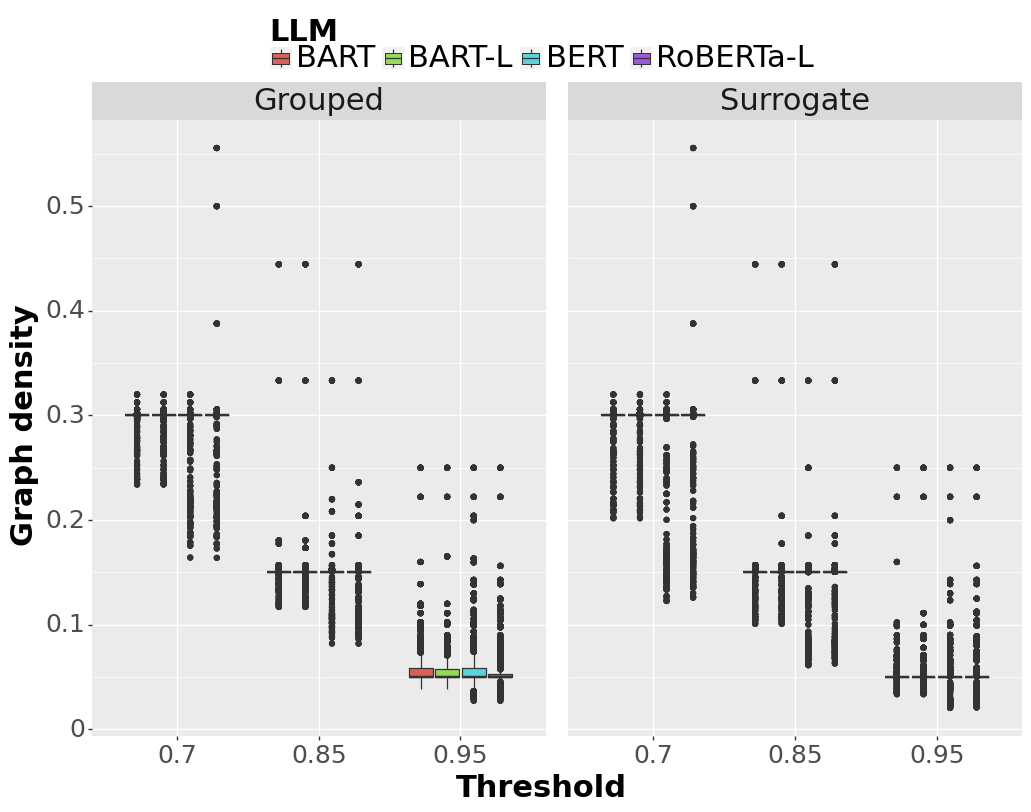

<ggplot: (813482672)>

In [84]:
llm_df['threshold'] = pd.Categorical(llm_df['threshold'], categories = llm_df['threshold'].sort_values(ascending = True).unique().tolist())
p9.ggplot(llm_df,
  p9.aes(x = 'threshold', y = 'density', fill = 'LLM')) + \
  p9.theme_gray() + \
  p9.geom_boxplot() + \
  p9.xlab('Threshold') + \
  p9.ylab('Graph density') + \
  p9.labs(fill = 'LLM') + \
  p9.facet_wrap('~approach', ncol = 2) + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_text = p9.element_text(size = 18),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
    subplots_adjust = {
      'hspace': 0.05,
      'wspace': 0.05
    }
  )

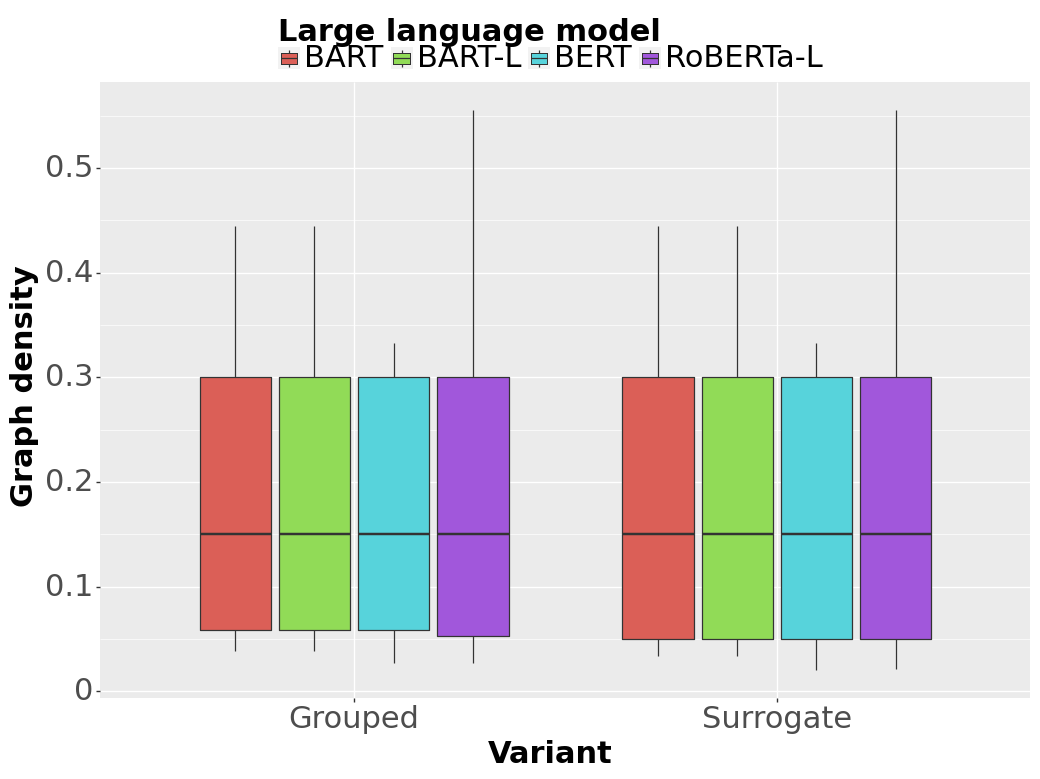

<ggplot: (808148419)>

In [85]:
p9.ggplot(llm_df,
  p9.aes(x = 'approach', y = 'density', fill = 'LLM')) + \
  p9.theme_gray() + \
  p9.geom_boxplot() + \
  p9.xlab('Variant') + \
  p9.ylab('Graph density') + \
  p9.labs(fill = 'Large language model') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
  )

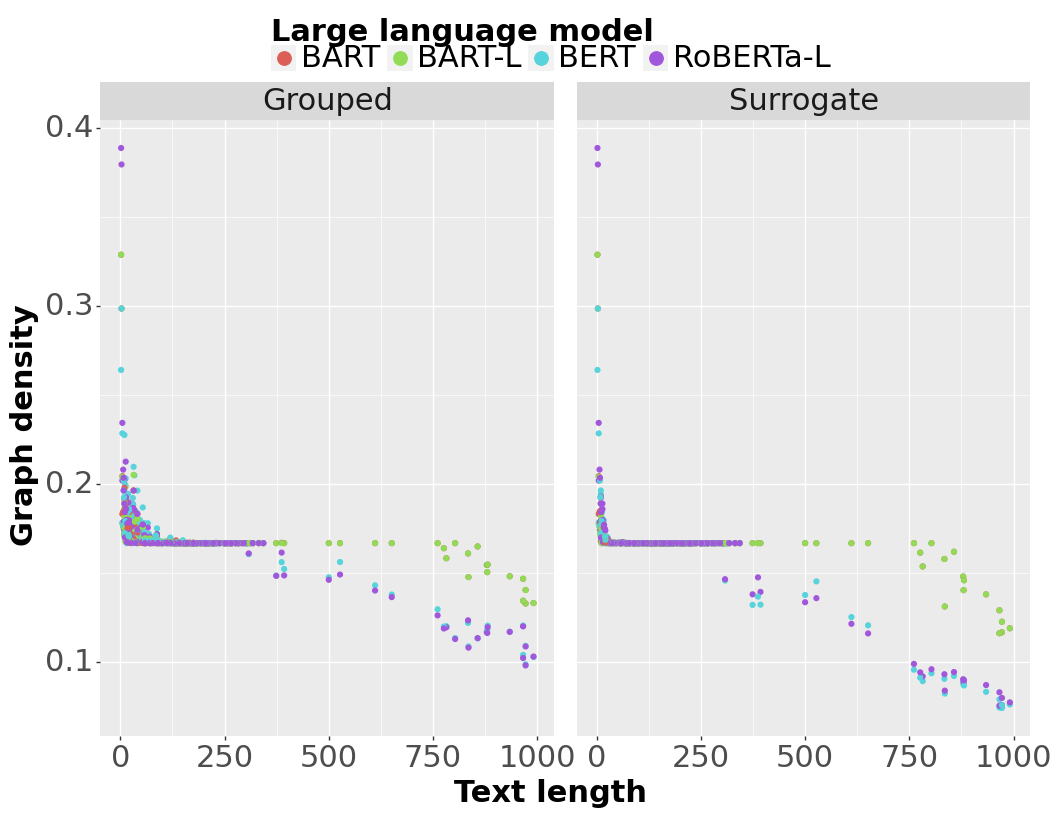

<ggplot: (808548854)>

In [86]:
p9.ggplot(llm_df.groupby(by = ['dataset', 'split', 'index', 'approach', 'LLM', 'length']).agg(average_density = ('density', 'mean'), std_density = ('density', 'std')).reset_index(),
  p9.aes(x = 'length', y = 'average_density', colour = 'LLM')) + \
  p9.theme_gray() + \
  p9.geom_point() + \
  p9.xlab('Text length') + \
  p9.ylab('Graph density') + \
  p9.labs(colour = 'Large language model') + \
  p9.facet_wrap('~ approach', ncol = 2) + \
  p9.guides(colour = p9.guide_legend(override_aes = {'size' : 5})) + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
    subplots_adjust = {
      'hspace': 0.05,
      'wspace': 0.05
    }
  )

### Training time per epoch and epochs to converge 

In [2]:
TRIALS = 250
TOP_N = 5

In [3]:
def load_best_trial_metrics_fine_tuning(dataset, llm, display_information = False):
  
  study_name = f'{dataset}-{llm.replace("/", "-")}'
  storage = f'sqlite:///../../baselines/optuna_studies/{study_name}.db'
  study = optuna.load_study(study_name = study_name, storage = storage)
  
  study_df = study.trials_dataframe()

  study_df = study_df[study_df['value'] >= 0.0].sort_values(by = 'number', ascending = True)
  columns = ['number', 'value'] + [x for x in study_df.columns if x.startswith('params_')] + [x for x in study_df.columns if x.startswith('user_attrs_')]

  for _, row in study_df[columns].head(TRIALS).sort_values(by = ['value', 'user_attrs_validation_loss', 'user_attrs_training_loss'], ascending = [False, True, True]).head(TOP_N).iterrows():
    
    if display_information:
      print(row)
    trial = row['number']

    random_states = [x for x in os.listdir(f'../../outputs/{dataset}-{llm}/{trial}') if os.path.isdir(f'../../outputs/{dataset}-{llm}/{trial}/{x}')]
    
    if len(random_states) < 10:
      continue
    else:
      checkpoints = pd.read_csv(f'../../outputs/{dataset}-{llm}/{trial}/metrics.csv')[['checkpoint_epoch', 'random_state']]
      epoch_information_df = list()
      for random_state in random_states:
        random_state_checkpoint = checkpoints[checkpoints['random_state'] == int(random_state)]['checkpoint_epoch'].values[0]
        df = pd.read_csv(f'../../outputs/{dataset}-{llm}/{trial}/{random_state}/runtimes.csv').assign(random_state = random_state)[:random_state_checkpoint]
        epoch_information_df.append(df)
      break
  return pd.concat(epoch_information_df).assign(dataset = dataset, gnn = 'N/A', llm = llm, method = 'Fine-tuning', aggregation = 'N/A')

In [4]:
def load_best_trial_metrics(dataset, gnn, llm, method, aggregation, display_information = False):
  
  study_name = f'{dataset}-{gnn}-{llm.replace("/", "-")}-{method}-{aggregation}'
  storage = f'sqlite:///../../pipelines/optuna_studies/{study_name}.db'
  study = optuna.load_study(study_name = study_name, storage = storage)
  
  study_df = study.trials_dataframe()

  study_df = study_df[study_df['value'] >= 0.0].sort_values(by = 'number', ascending = True)
  columns = ['number', 'value'] + [x for x in study_df.columns if x.startswith('params_')] + [x for x in study_df.columns if x.startswith('user_attrs_')]

  for _, row in study_df[columns].head(TRIALS).sort_values(by = ['value', 'user_attrs_validation_loss', 'user_attrs_training_loss'], ascending = [False, True, True]).head(TOP_N).iterrows():
    
    if display_information:
      print(row)
    trial = row['number']

    random_states = [x for x in os.listdir(f'../../outputs/{dataset}-{gnn}-{llm}/{method}/{aggregation}/{trial}') if os.path.isdir(f'../../outputs/{dataset}-{gnn}-{llm}/{method}/{aggregation}/{trial}/{x}')]
    
    if len(random_states) < 10:
      continue
    else:
      checkpoints = pd.read_csv(f'../../outputs/{dataset}-{gnn}-{llm}/{method}/{aggregation}/{trial}/metrics.csv')[['checkpoint_epoch', 'random_state']]
      epoch_information_df = list()
      for random_state in random_states:
        random_state_checkpoint = checkpoints[checkpoints['random_state'] == int(random_state)]['checkpoint_epoch'].values[0]
        df = pd.read_csv(f'../../outputs/{dataset}-{gnn}-{llm}/{method}/{aggregation}/{trial}/{random_state}/runtimes.csv').assign(random_state = random_state)[:random_state_checkpoint]
        epoch_information_df.append(df)
      break
  return pd.concat(epoch_information_df).assign(dataset = dataset, gnn = gnn, llm = llm, method = method, aggregation = aggregation)

In [5]:
def get_epoch_runtimes(datasets, gnns, methods, aggregations, llms):
  epoch_information = list()
  for dataset in datasets:
    for gnn in gnns:
      for method in methods:
        for aggregation in aggregations:
          for llm in llms:
            df = load_best_trial_metrics(dataset = dataset, gnn = gnn, llm = llm, method = method, aggregation = aggregation, display_information = False)
            epoch_information.append(df)
  return pd.concat(epoch_information)

In [6]:
def get_epoch_runtimes_fine_tuning(datasets, llms):
  epoch_information = list()
  for dataset in datasets:
    for llm in llms:
      df = load_best_trial_metrics_fine_tuning(dataset = dataset, llm = llm, display_information = False)
      epoch_information.append(df)
  return pd.concat(epoch_information)

In [7]:
epoch_information_df = get_epoch_runtimes(
  datasets = ['IMDb-top_1000', 'Ohsumed', 'R8', 'SST-2'],
  gnns = ['GATv2'],
  methods = ['Grouped', 'Surrogate'],
  aggregations = ['No_Aggregation'],
  llms = ['facebook-bart-large', 'FacebookAI-roberta-large']
)

In [8]:
epoch_information_df['llm'] = epoch_information_df['llm'].replace({'facebook-bart-large' : 'BART-L', 'FacebookAI-roberta-large' : 'RoBERTa-L'})
epoch_information_df['dataset'] = epoch_information_df['dataset'].replace({'IMDb-top_1000' : 'IMDb-1k'})

In [9]:
epoch_information_df.head()

epoch_runtime random_state  dataset    gnn     llm   method     aggregation
0       4.317246           42  IMDb-1k  GATv2  BART-L  Grouped  No_Aggregation
1       4.083161           42  IMDb-1k  GATv2  BART-L  Grouped  No_Aggregation
2       3.619824           42  IMDb-1k  GATv2  BART-L  Grouped  No_Aggregation
3       3.634255           42  IMDb-1k  GATv2  BART-L  Grouped  No_Aggregation
4       3.631525           42  IMDb-1k  GATv2  BART-L  Grouped  No_Aggregation

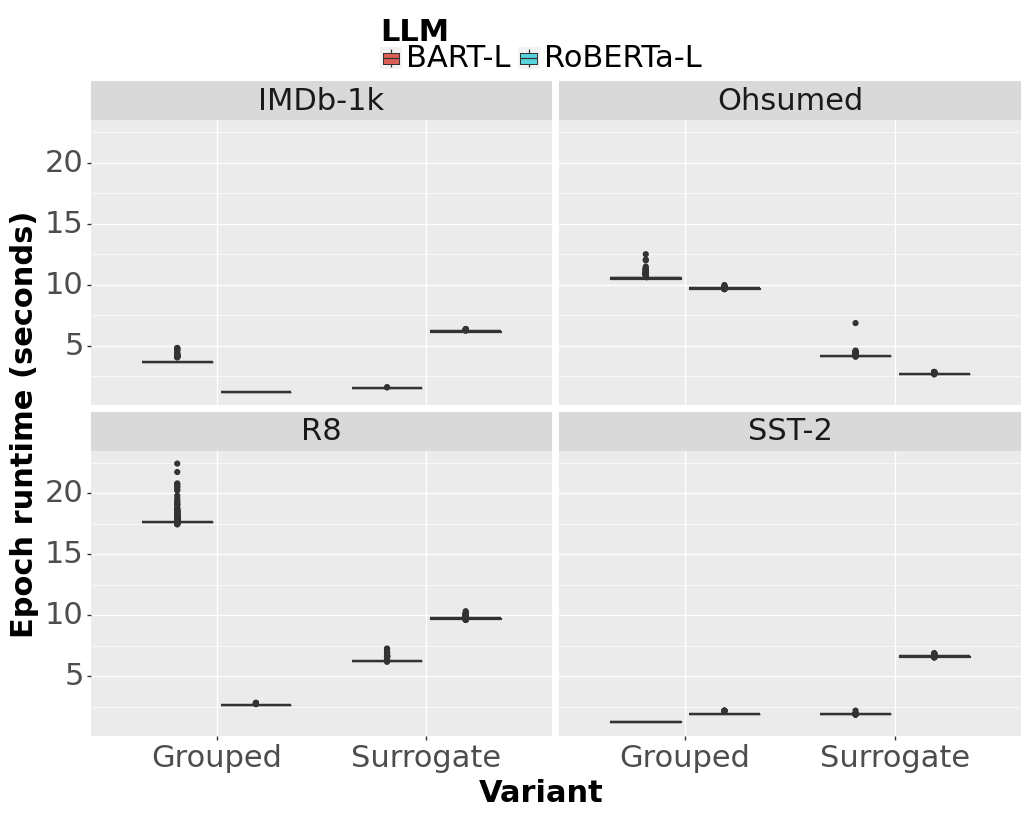

<ggplot: (814852529)>

In [10]:
p9.ggplot(epoch_information_df,
  p9.aes(x = 'method', y = 'epoch_runtime', fill = 'llm')) + \
  p9.theme_gray() + \
  p9.geom_boxplot() + \
  p9.xlab('Variant') + \
  p9.ylab('Epoch runtime (seconds)') + \
  p9.labs(fill = 'LLM') + \
  p9.facet_wrap('~ dataset', ncol = 2) + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
  )

In [11]:
epoch_information_df_grouped = epoch_information_df.groupby(by = ['dataset', 'gnn', 'method', 'llm', 'aggregation']).agg(average_epoch_runtime = ('epoch_runtime', 'mean'), std_epoch_runtime = ('epoch_runtime', 'std')).reset_index()
epoch_information_df_grouped['label'] = epoch_information_df_grouped['average_epoch_runtime'].map(lambda x : '{:.2f}'.format(x)) + ' ± ' + epoch_information_df_grouped['std_epoch_runtime'].map(lambda x : '{:.2f}'.format(x))

In [12]:
epoch_information_df_grouped

dataset    gnn     method        llm     aggregation  \
0   IMDb-1k  GATv2    Grouped     BART-L  No_Aggregation   
1   IMDb-1k  GATv2    Grouped  RoBERTa-L  No_Aggregation   
2   IMDb-1k  GATv2  Surrogate     BART-L  No_Aggregation   
3   IMDb-1k  GATv2  Surrogate  RoBERTa-L  No_Aggregation   
4   Ohsumed  GATv2    Grouped     BART-L  No_Aggregation   
5   Ohsumed  GATv2    Grouped  RoBERTa-L  No_Aggregation   
6   Ohsumed  GATv2  Surrogate     BART-L  No_Aggregation   
7   Ohsumed  GATv2  Surrogate  RoBERTa-L  No_Aggregation   
8        R8  GATv2    Grouped     BART-L  No_Aggregation   
9        R8  GATv2    Grouped  RoBERTa-L  No_Aggregation   
10       R8  GATv2  Surrogate     BART-L  No_Aggregation   
11       R8  GATv2  Surrogate  RoBERTa-L  No_Aggregation   
12    SST-2  GATv2    Grouped     BART-L  No_Aggregation   
13    SST-2  GATv2    Grouped  RoBERTa-L  No_Aggregation   
14    SST-2  GATv2  Surrogate     BART-L  No_Aggregation   
15    SST-2  GATv2  Surrogate  RoBERTa-L  No_Aggregation   

    average_epoch_runtime  std_epoch_runtime         label  
0                3.762705           0.267574   3.76 ± 0.27  
1                1.172252           0.007021   1.17 ± 0.01  
2                1.530251           0.009304   1.53 ± 0.01  
3                6.162111           0.032752   6.16 ± 0.03  
4               10.618458           0.242352  10.62 ± 0.24  
5                9.692236           0.042839   9.69 ± 0.04  
6                4.167239           0.188473   4.17 ± 0.19  
7                2.696429           0.028945   2.70 ± 0.03  
8               17.720880           0.355301  17.72 ± 0.36  
9                2.636621           0.028813   2.64 ± 0.03  
10               6.286971           0.176096   6.29 ± 0.18  
11               9.759416           0.073900   9.76 ± 0.07  
12               1.272704           0.017833   1.27 ± 0.02  
13               1.907876           0.057491   1.91 ± 0.06  
14               1.883739           0.027034   1.88 ± 0.03  
15               6.622724           0.041828   6.62 ± 0.04

In [97]:
plot = p9.ggplot(epoch_information_df_grouped,
  p9.aes(x = 'method', y = 'average_epoch_runtime', fill = 'llm')) + \
  p9.theme_gray() + \
  p9.geom_bar(stat = 'identity', position = p9.position_dodge2()) + \
  p9.geom_errorbar(p9.aes(ymin = 'average_epoch_runtime - std_epoch_runtime', ymax = 'average_epoch_runtime + std_epoch_runtime'), position = p9.position_dodge2(), width = .9) + \
  p9.geom_text(p9.aes(y = 'average_epoch_runtime + std_epoch_runtime + 1', label = 'label'), position = p9.position_dodge2(width = .9), size = 11) + \
  p9.xlab('Variant') + \
  p9.ylab('Epoch runtime (seconds)') + \
  p9.labs(fill = 'LLM') + \
  p9.facet_wrap('~ dataset', ncol = 2) + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_text = p9.element_text(size = 18),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
  )

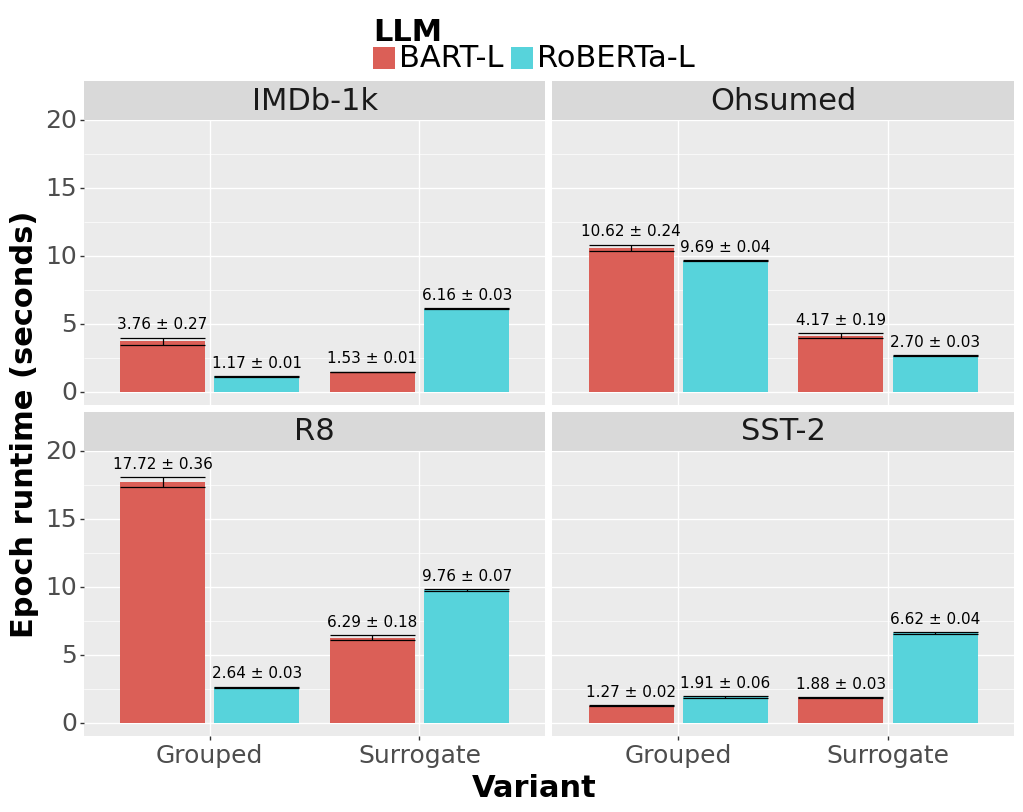

<ggplot: (809512264)>

In [98]:
plot

In [99]:
plot.save(filename = './figures/grouped_vs_surrogate_epoch_times.png', dpi = 300)

/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 12 x 8 in image.
/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ./figures/grouped_vs_surrogate_epoch_times.png


In [13]:
epoch_information_df_count = epoch_information_df.groupby(by = ['dataset', 'gnn', 'method', 'llm', 'aggregation', 'random_state']).size().reset_index().rename(columns = {0 : 'count'})

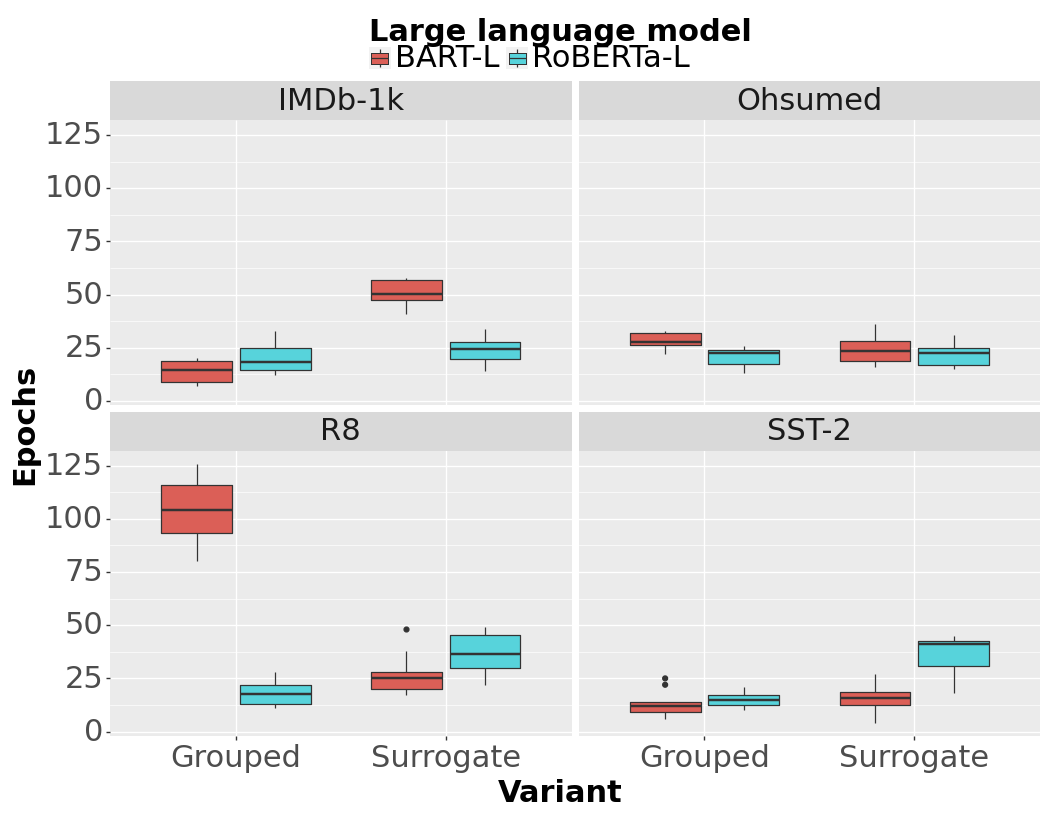

<ggplot: (812721681)>

In [101]:
p9.ggplot(epoch_information_df_count,
  p9.aes(x = 'method', y = 'count', fill = 'llm')) + \
  p9.theme_gray() + \
  p9.geom_boxplot() + \
  p9.xlab('Variant') + \
  p9.ylab('Epochs') + \
  p9.labs(fill = 'Large language model') + \
  p9.facet_wrap('~ dataset', ncol = 2) + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
  )

In [15]:
epoch_information_df_count_grouped = epoch_information_df_count.groupby(by = ['dataset', 'gnn', 'method', 'llm', 'aggregation']).agg(average_epoch_count = ('count', 'mean'), std_epoch_count = ('count', 'std')).reset_index()
epoch_information_df_count_grouped['label'] = epoch_information_df_count_grouped['average_epoch_count'].map(lambda x : '{:.2f}'.format(x)) + ' ± ' + epoch_information_df_count_grouped['std_epoch_count'].map(lambda x : '{:.2f}'.format(x))

In [16]:
epoch_information_df_count_grouped

dataset    gnn     method        llm     aggregation  average_epoch_count  \
0   IMDb-1k  GATv2    Grouped     BART-L  No_Aggregation                 13.9   
1   IMDb-1k  GATv2    Grouped  RoBERTa-L  No_Aggregation                 20.5   
2   IMDb-1k  GATv2  Surrogate     BART-L  No_Aggregation                 50.7   
3   IMDb-1k  GATv2  Surrogate  RoBERTa-L  No_Aggregation                 24.1   
4   Ohsumed  GATv2    Grouped     BART-L  No_Aggregation                 28.3   
5   Ohsumed  GATv2    Grouped  RoBERTa-L  No_Aggregation                 20.8   
6   Ohsumed  GATv2  Surrogate     BART-L  No_Aggregation                 24.2   
7   Ohsumed  GATv2  Surrogate  RoBERTa-L  No_Aggregation                 22.0   
8        R8  GATv2    Grouped     BART-L  No_Aggregation                103.6   
9        R8  GATv2    Grouped  RoBERTa-L  No_Aggregation                 17.9   
10       R8  GATv2  Surrogate     BART-L  No_Aggregation                 26.9   
11       R8  GATv2  Surrogate  RoBERTa-L  No_Aggregation                 37.2   
12    SST-2  GATv2    Grouped     BART-L  No_Aggregation                 12.8   
13    SST-2  GATv2    Grouped  RoBERTa-L  No_Aggregation                 15.0   
14    SST-2  GATv2  Surrogate     BART-L  No_Aggregation                 15.2   
15    SST-2  GATv2  Surrogate  RoBERTa-L  No_Aggregation                 35.9   

    std_epoch_count           label  
0          5.021067    13.90 ± 5.02  
1          7.214954    20.50 ± 7.21  
2          6.254776    50.70 ± 6.25  
3          5.820462    24.10 ± 5.82  
4          3.591657    28.30 ± 3.59  
5          4.289522    20.80 ± 4.29  
6          6.596295    24.20 ± 6.60  
7          5.792716    22.00 ± 5.79  
8         16.249444  103.60 ± 16.25  
9          6.008328    17.90 ± 6.01  
10         9.643075    26.90 ± 9.64  
11         9.577752    37.20 ± 9.58  
12         6.303438    12.80 ± 6.30  
13         3.366502    15.00 ± 3.37  
14         7.375636    15.20 ± 7.38  
15        10.278889   35.90 ± 10.28

In [103]:
plot = p9.ggplot(epoch_information_df_count_grouped,
  p9.aes(x = 'method', y = 'average_epoch_count', fill = 'llm')) + \
  p9.theme_gray() + \
  p9.geom_bar(stat = 'identity', position = p9.position_dodge2()) + \
  p9.geom_errorbar(p9.aes(ymin = 'average_epoch_count - std_epoch_count', ymax = 'average_epoch_count + std_epoch_count'), position = p9.position_dodge2(), width = .9) + \
  p9.geom_text(p9.aes(y = 'average_epoch_count + std_epoch_count + 5', label = 'label'), position = p9.position_dodge2(width = .9), size = 11) + \
  p9.xlab('Variant') + \
  p9.ylab('Epochs') + \
  p9.labs(fill = 'LLM') + \
  p9.facet_wrap('~ dataset', ncol = 2) + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_text = p9.element_text(size = 18),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
  )

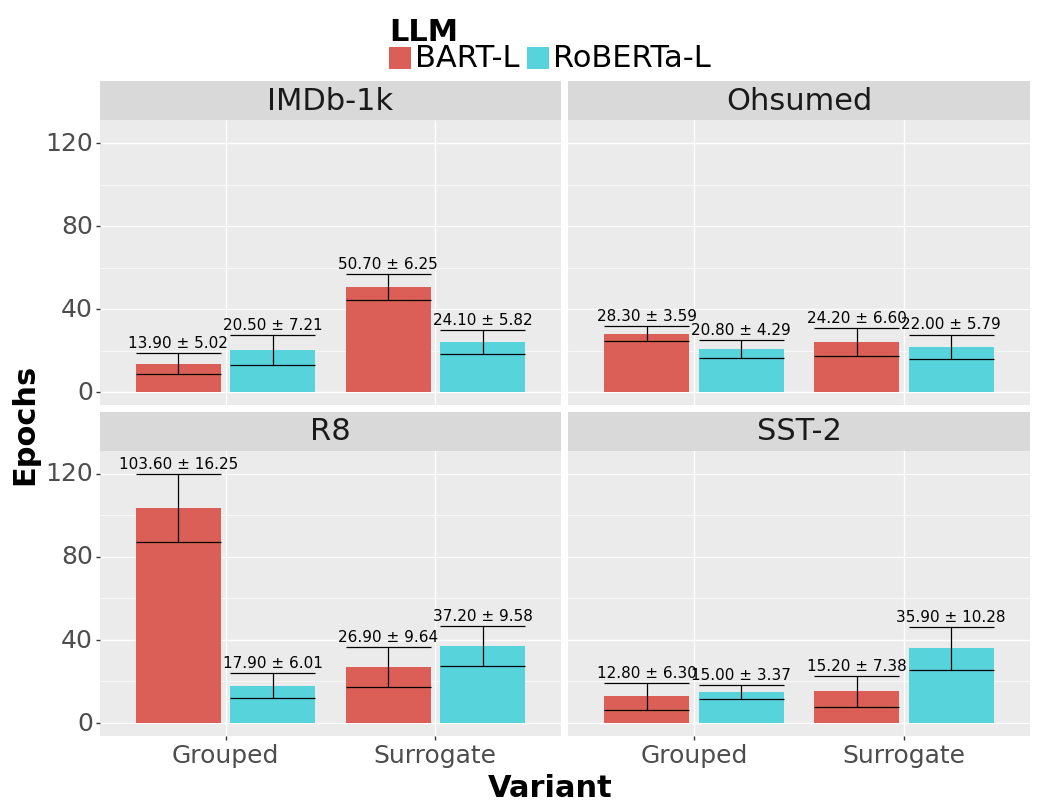

<ggplot: (812530421)>

In [104]:
plot

In [105]:
plot.save(filename = './figures/grouped_vs_surrogate_epoch_count.png', dpi = 300)

/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 12 x 8 in image.
/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ./figures/grouped_vs_surrogate_epoch_count.png


In [26]:
total_training_time_information_df_grouped = epoch_information_df.groupby(by = ['dataset', 'gnn', 'method', 'llm', 'aggregation', 'random_state']).sum().reset_index() \
  .groupby(by = ['dataset', 'gnn', 'method', 'llm', 'aggregation']) \
  .agg(average_training_time = ('epoch_runtime', 'mean'), std_training_time = ('epoch_runtime', 'std')).reset_index()
total_training_time_information_df_grouped['label'] = total_training_time_information_df_grouped['average_training_time'].map(lambda x : '{:.2f}'.format(x)) + ' ± ' + total_training_time_information_df_grouped['std_training_time'].map(lambda x : '{:.2f}'.format(x))

In [27]:
total_training_time_information_df_grouped

dataset    gnn     method        llm     aggregation  \
0   IMDb-1k  GATv2    Grouped     BART-L  No_Aggregation   
1   IMDb-1k  GATv2    Grouped  RoBERTa-L  No_Aggregation   
2   IMDb-1k  GATv2  Surrogate     BART-L  No_Aggregation   
3   IMDb-1k  GATv2  Surrogate  RoBERTa-L  No_Aggregation   
4   Ohsumed  GATv2    Grouped     BART-L  No_Aggregation   
5   Ohsumed  GATv2    Grouped  RoBERTa-L  No_Aggregation   
6   Ohsumed  GATv2  Surrogate     BART-L  No_Aggregation   
7   Ohsumed  GATv2  Surrogate  RoBERTa-L  No_Aggregation   
8        R8  GATv2    Grouped     BART-L  No_Aggregation   
9        R8  GATv2    Grouped  RoBERTa-L  No_Aggregation   
10       R8  GATv2  Surrogate     BART-L  No_Aggregation   
11       R8  GATv2  Surrogate  RoBERTa-L  No_Aggregation   
12    SST-2  GATv2    Grouped     BART-L  No_Aggregation   
13    SST-2  GATv2    Grouped  RoBERTa-L  No_Aggregation   
14    SST-2  GATv2  Surrogate     BART-L  No_Aggregation   
15    SST-2  GATv2  Surrogate  RoBERTa-L  No_Aggregation   

    average_training_time  std_training_time             label  
0               52.301599          18.155643     52.30 ± 18.16  
1               24.031163           8.484137      24.03 ± 8.48  
2               77.583727           9.595587      77.58 ± 9.60  
3              148.506878          35.841605    148.51 ± 35.84  
4              300.502370          38.196774    300.50 ± 38.20  
5              201.598501          41.633923    201.60 ± 41.63  
6              100.847182          27.340959    100.85 ± 27.34  
7               59.321442          15.504528     59.32 ± 15.50  
8             1835.883195         290.630205  1835.88 ± 290.63  
9               47.195510          15.916735     47.20 ± 15.92  
10             169.119526          60.376493    169.12 ± 60.38  
11             363.050261          92.884097    363.05 ± 92.88  
12              16.290605           7.935651      16.29 ± 7.94  
13              28.618144           6.461867      28.62 ± 6.46  
14              28.632829          13.832113     28.63 ± 13.83  
15             237.755804          68.047629    237.76 ± 68.05

### Compared to fine-tuning

In [28]:
bert_epoch_information_df = pd.concat([
  get_epoch_runtimes(
    datasets = ['IMDb-top_1000', 'Ohsumed', 'R8', 'SST-2'],
    gnns = ['GATv2'],
    methods = ['Grouped', 'Surrogate'],
    aggregations = ['No_Aggregation'],
    llms = ['google-bert-bert-base-uncased']
  ),
  get_epoch_runtimes_fine_tuning(
    datasets = ['IMDb-top_1000', 'Ohsumed', 'R8', 'SST-2'],
    llms = ['google-bert-bert-base-uncased']
  )
])


In [29]:
bert_epoch_information_df['llm'] = bert_epoch_information_df['llm'].replace({'google-bert-bert-base-uncased' : 'BERT'})
bert_epoch_information_df['dataset'] = bert_epoch_information_df['dataset'].replace({'IMDb-top_1000' : 'IMDb-1k'})

In [30]:
bert_epoch_information_df_grouped = bert_epoch_information_df.groupby(by = ['dataset', 'gnn', 'method', 'llm', 'aggregation']).agg(average_epoch_runtime = ('epoch_runtime', 'mean'), std_epoch_runtime = ('epoch_runtime', 'std')).reset_index()
bert_epoch_information_df_grouped['label'] = bert_epoch_information_df_grouped['average_epoch_runtime'].map(lambda x : '{:.2f}'.format(x)) + ' ± ' + bert_epoch_information_df_grouped['std_epoch_runtime'].map(lambda x : '{:.2f}'.format(x))

In [31]:
bert_epoch_information_df_grouped

dataset    gnn       method   llm     aggregation  average_epoch_runtime  \
0   IMDb-1k  GATv2      Grouped  BERT  No_Aggregation               6.160131   
1   IMDb-1k  GATv2    Surrogate  BERT  No_Aggregation               5.782198   
2   IMDb-1k    N/A  Fine-tuning  BERT             N/A              13.105989   
3   Ohsumed  GATv2      Grouped  BERT  No_Aggregation              29.199022   
4   Ohsumed  GATv2    Surrogate  BERT  No_Aggregation              11.718741   
5   Ohsumed    N/A  Fine-tuning  BERT             N/A              64.635050   
6        R8  GATv2      Grouped  BERT  No_Aggregation               8.859599   
7        R8  GATv2    Surrogate  BERT  No_Aggregation               6.982861   
8        R8    N/A  Fine-tuning  BERT             N/A             112.738367   
9     SST-2  GATv2      Grouped  BERT  No_Aggregation               3.967955   
10    SST-2  GATv2    Surrogate  BERT  No_Aggregation              13.524325   
11    SST-2    N/A  Fine-tuning  BERT             N/A             172.146603   

    std_epoch_runtime          label  
0            0.390050    6.16 ± 0.39  
1            0.052646    5.78 ± 0.05  
2            0.034637   13.11 ± 0.03  
3            0.385823   29.20 ± 0.39  
4            0.120229   11.72 ± 0.12  
5            0.041264   64.64 ± 0.04  
6            0.106560    8.86 ± 0.11  
7            0.092372    6.98 ± 0.09  
8            0.903310  112.74 ± 0.90  
9            0.022023    3.97 ± 0.02  
10           0.051896   13.52 ± 0.05  
11           0.226842  172.15 ± 0.23

In [109]:
plot = p9.ggplot(bert_epoch_information_df_grouped,
  p9.aes(x = 'method', y = 'average_epoch_runtime')) + \
  p9.theme_gray() + \
  p9.geom_bar(stat = 'identity', position = p9.position_dodge2(), fill = '#fe8f91') + \
  p9.geom_errorbar(p9.aes(ymin = 'average_epoch_runtime - std_epoch_runtime', ymax = 'average_epoch_runtime + std_epoch_runtime'), position = p9.position_dodge2(), width = .9) + \
  p9.geom_text(p9.aes(y = 'average_epoch_runtime + std_epoch_runtime + 5', label = 'label'), position = p9.position_dodge2(width = .9), size = 11) + \
  p9.xlab('Pipeline') + \
  p9.ylab('Epoch runtime (seconds)') + \
  p9.facet_wrap('~ dataset', ncol = 2) + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_text = p9.element_text(size = 18),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
  )

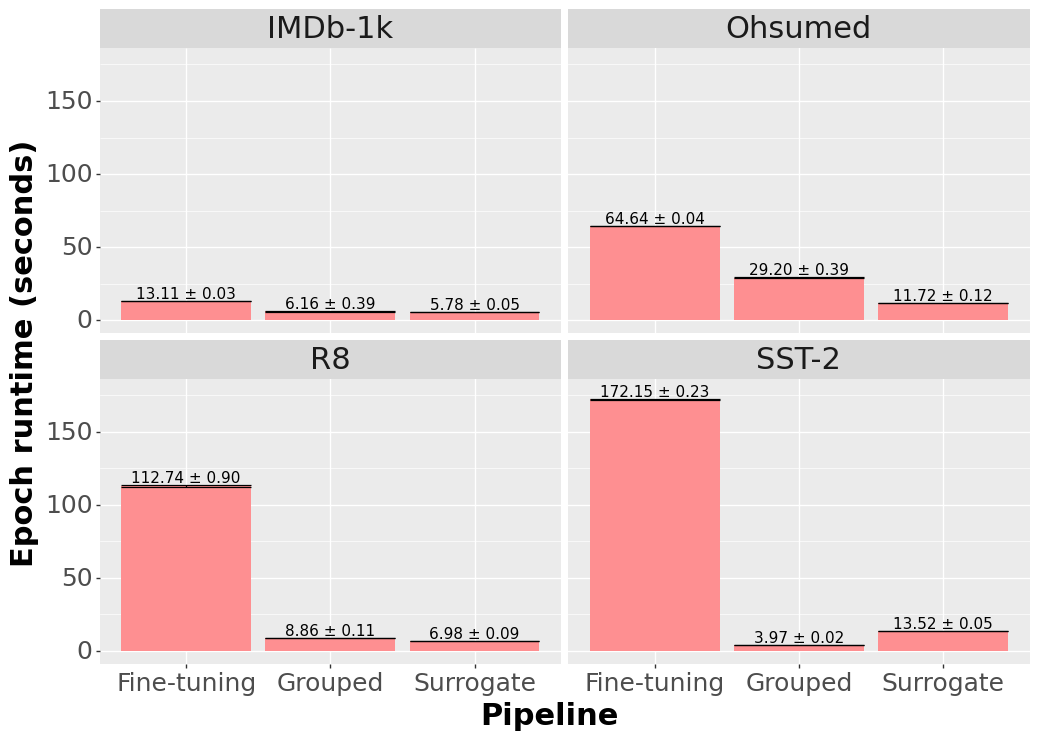

<ggplot: (812530604)>

In [110]:
plot

In [111]:
plot.save(filename = './figures/fine_tuning_vs_method_epoch_times.png', dpi = 300)

/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 12 x 8 in image.
/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ./figures/fine_tuning_vs_method_epoch_times.png


In [32]:
bert_epoch_information_df_count = bert_epoch_information_df.groupby(by = ['dataset', 'gnn', 'method', 'llm', 'aggregation', 'random_state']).size().reset_index().rename(columns = {0 : 'count'})

In [33]:
bert_epoch_information_df_count_grouped = bert_epoch_information_df_count.groupby(by = ['dataset', 'gnn', 'method', 'llm', 'aggregation']).agg(average_epoch_count = ('count', 'mean'), std_epoch_count = ('count', 'std')).reset_index()
bert_epoch_information_df_count_grouped['label'] = bert_epoch_information_df_count_grouped['average_epoch_count'].map(lambda x : '{:.2f}'.format(x)) + ' ± ' + bert_epoch_information_df_count_grouped['std_epoch_count'].map(lambda x : '{:.2f}'.format(x))

In [34]:
bert_epoch_information_df_count_grouped

dataset    gnn       method   llm     aggregation  average_epoch_count  \
0   IMDb-1k  GATv2      Grouped  BERT  No_Aggregation                 15.7   
1   IMDb-1k  GATv2    Surrogate  BERT  No_Aggregation                 30.2   
2   IMDb-1k    N/A  Fine-tuning  BERT             N/A                  6.1   
3   Ohsumed  GATv2      Grouped  BERT  No_Aggregation                 25.6   
4   Ohsumed  GATv2    Surrogate  BERT  No_Aggregation                 24.0   
5   Ohsumed    N/A  Fine-tuning  BERT             N/A                  7.4   
6        R8  GATv2      Grouped  BERT  No_Aggregation                 22.9   
7        R8  GATv2    Surrogate  BERT  No_Aggregation                 43.8   
8        R8    N/A  Fine-tuning  BERT             N/A                  5.0   
9     SST-2  GATv2      Grouped  BERT  No_Aggregation                 10.7   
10    SST-2  GATv2    Surrogate  BERT  No_Aggregation                  8.1   
11    SST-2    N/A  Fine-tuning  BERT             N/A                  3.9   

    std_epoch_count          label  
0          7.056124   15.70 ± 7.06  
1         12.416834  30.20 ± 12.42  
2          2.514403    6.10 ± 2.51  
3          2.951459   25.60 ± 2.95  
4          3.496029   24.00 ± 3.50  
5          0.966092    7.40 ± 0.97  
6          8.047774   22.90 ± 8.05  
7          8.011103   43.80 ± 8.01  
8          2.494438    5.00 ± 2.49  
9          7.761014   10.70 ± 7.76  
10         4.748099    8.10 ± 4.75  
11         2.024846    3.90 ± 2.02

In [114]:
plot = p9.ggplot(bert_epoch_information_df_count_grouped,
  p9.aes(x = 'method', y = 'average_epoch_count')) + \
  p9.theme_gray() + \
  p9.geom_bar(stat = 'identity', position = p9.position_dodge2(), fill = '#fe8f91') + \
  p9.geom_errorbar(p9.aes(ymin = 'average_epoch_count - std_epoch_count', ymax = 'average_epoch_count + std_epoch_count'), position = p9.position_dodge2(), width = .9) + \
  p9.geom_text(p9.aes(y = 'average_epoch_count + std_epoch_count + 2', label = 'label'), position = p9.position_dodge2(width = .9), size = 11) + \
  p9.xlab('Pipeline') + \
  p9.ylab('Epochs') + \
  p9.facet_wrap('~ dataset', ncol = 2) + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = -5,  
    figure_size = (12, 8),
    text = p9.element_text(size = 22),
    axis_text = p9.element_text(size = 18),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold'),
  )

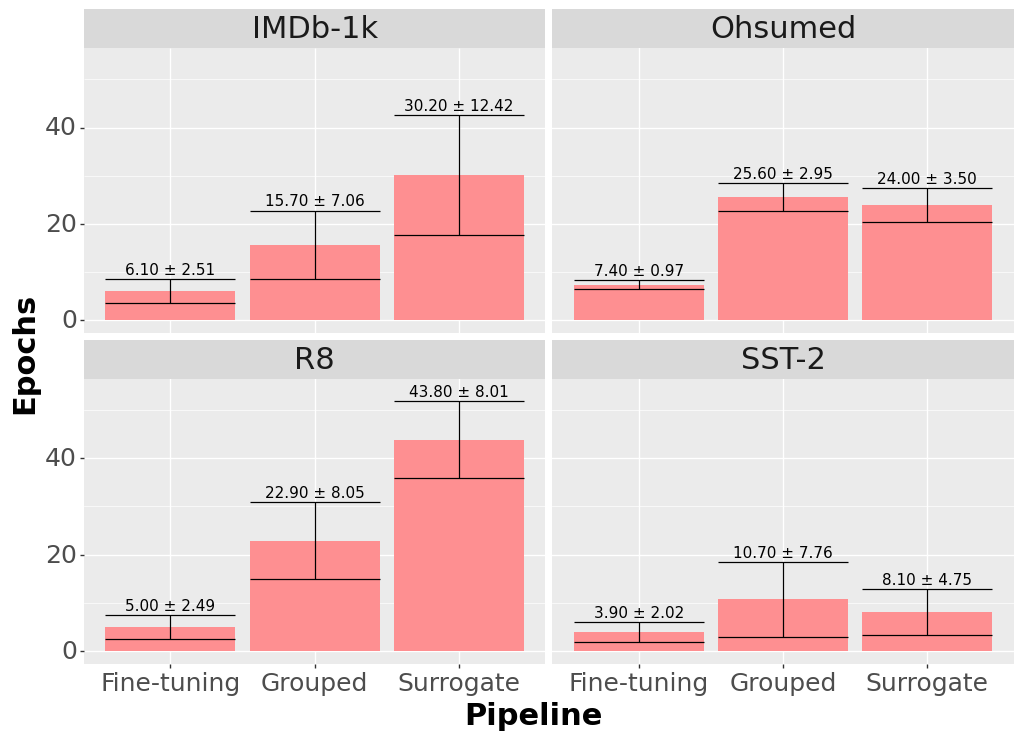

<ggplot: (863043786)>

In [115]:
plot

In [116]:
plot.save(filename = './figures/fine_tuning_vs_method_epoch_count.png', dpi = 300)

/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 12 x 8 in image.
/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ./figures/fine_tuning_vs_method_epoch_count.png


In [36]:
bert_epoch_information_df_count

dataset    gnn       method   llm     aggregation random_state  count
0    IMDb-1k  GATv2      Grouped  BERT  No_Aggregation           37     27
1    IMDb-1k  GATv2      Grouped  BERT  No_Aggregation           38     12
2    IMDb-1k  GATv2      Grouped  BERT  No_Aggregation           39     12
3    IMDb-1k  GATv2      Grouped  BERT  No_Aggregation           40     18
4    IMDb-1k  GATv2      Grouped  BERT  No_Aggregation           41     10
..       ...    ...          ...   ...             ...          ...    ...
115    SST-2    N/A  Fine-tuning  BERT             N/A           42      6
116    SST-2    N/A  Fine-tuning  BERT             N/A           43      4
117    SST-2    N/A  Fine-tuning  BERT             N/A           44      6
118    SST-2    N/A  Fine-tuning  BERT             N/A           45      2
119    SST-2    N/A  Fine-tuning  BERT             N/A           46      6

[120 rows x 7 columns]

In [37]:
bert_total_training_time_information_df_grouped = bert_epoch_information_df.groupby(by = ['dataset', 'gnn', 'method', 'llm', 'aggregation', 'random_state']).sum().reset_index() \
  .groupby(by = ['dataset', 'gnn', 'method', 'llm', 'aggregation']) \
  .agg(average_training_time = ('epoch_runtime', 'mean'), std_training_time = ('epoch_runtime', 'std')).reset_index()
bert_total_training_time_information_df_grouped['label'] = bert_total_training_time_information_df_grouped['average_training_time'].map(lambda x : '{:.2f}'.format(x)) + ' ± ' + bert_total_training_time_information_df_grouped['std_training_time'].map(lambda x : '{:.2f}'.format(x))

In [38]:
bert_total_training_time_information_df_grouped

dataset    gnn       method   llm     aggregation  average_training_time  \
0   IMDb-1k  GATv2      Grouped  BERT  No_Aggregation              96.714061   
1   IMDb-1k  GATv2    Surrogate  BERT  No_Aggregation             174.622368   
2   IMDb-1k    N/A  Fine-tuning  BERT             N/A              79.946533   
3   Ohsumed  GATv2      Grouped  BERT  No_Aggregation             747.494965   
4   Ohsumed  GATv2    Surrogate  BERT  No_Aggregation             281.249779   
5   Ohsumed    N/A  Fine-tuning  BERT             N/A             478.299368   
6        R8  GATv2      Grouped  BERT  No_Aggregation             202.884808   
7        R8  GATv2    Surrogate  BERT  No_Aggregation             305.849297   
8        R8    N/A  Fine-tuning  BERT             N/A             563.691834   
9     SST-2  GATv2      Grouped  BERT  No_Aggregation              42.457124   
10    SST-2  GATv2    Surrogate  BERT  No_Aggregation             109.547032   
11    SST-2    N/A  Fine-tuning  BERT             N/A             671.371750   

    std_training_time            label  
0           42.838795    96.71 ± 42.84  
1           71.649018   174.62 ± 71.65  
2           33.021182    79.95 ± 33.02  
3           85.758462   747.49 ± 85.76  
4           40.825967   281.25 ± 40.83  
5           62.505613   478.30 ± 62.51  
6           71.256734   202.88 ± 71.26  
7           56.135849   305.85 ± 56.14  
8          281.672770  563.69 ± 281.67  
9           30.655153    42.46 ± 30.66  
10          64.138894   109.55 ± 64.14  
11         348.493675  671.37 ± 348.49